# Optimize LendingClub's Profit by Predicting Borrower's Repayment Capability

LendingClub (LC) is one of the biggest P2P Lending platform in America. Since 2007, they’ve been bringing borrowers and investors together, transforming the way people access credit. Over the last 10 years, they've helped millions of people take control of their debt, grow their small businesses, and invest for the future. As a Borrower, you could loan up to \$ 40,000. As an Investor (Lender), you could invest your money at the minimum amount, \$ 25.

Firstly, this dataset is from [Pierian Data](https://github.com/Pierian-Data) which contains loan amount, loan term, interest rate, installment, grade, home ownership, purpose of the loan, loan_status, and many more. Basically, this dataset is available from [their site](https://www.lendingclub.com/info/download-data.action) which anyone can scrape from there.

The standard loan period was 3 years (36 months) up to 5 years (60 months). Investors were able to search and browse the loan listings on LC website then select the loans that they wanted to invest based on the provided information about the borrower's like the amount of loan, loan grade, and loan purpose.

Investors made money from the interest on these loans, but LC made money by charging borrowers an origination fee and investors a service fee. But the truth about P2P lending activity is, investors still have risks. There are many risks but at least only 2 main risks which can't be avoided by investors:
1. Losing money due to bad debts (credit risk).
  > *We've got to the most "commonplace" reason for losing money on some loans: when your borrowers aren't good enough and can't pay all your money back. This is called "credit risk".* -- [4thway.co.uk](https://www.4thway.co.uk/guides/seven-key-peer-peer-lending-risks/)
2. Losses because you can't sell early (liquidity risk).
  > *The ability to sell your loans early - before your borrowers repay them naturally - is not a God-given right. P2P lending returns are stable because most lenders hold onto loans until they're repaid. If lending became like the stock market, where people dip in and out all the time, it would start leading to similarly wild price swings. In lending, that means swings in interest earned or returns made.* -- [4thway.co.uk](https://www.4thway.co.uk/guides/seven-key-peer-peer-lending-risks/)

If investors don't get their return of interest, technically LC can't charge service fee to investors, which means LC do not get money and profit from them.


## Problems
1. What factors that borrowers stop repaying their loan?
2. How to optimize LendingClub's profit since LendingClub made money by charging borrowers and investors a fee? 

## Goals
1. Find out the main factors what make borrowers stop repaying their loan.
2. Make a Machine Learning Model to ensure LendingClub's profit especially from investors.

## Project Limitation
- Focus on loan amount \$ 1000 until \$ 10,000.
- Above \$ 10,000 are considered by Professionals.

# 1) Preparation of Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

!pip install sidetable
import sidetable

In [ ]:
lendclub = pd.read_csv("/content/drive/My Drive/Datasets/lendingclub.csv")
lendclub = lendclub[lendclub['loan_amnt'] < 10001]
lendclub.head()

# GET TO KNOW MORE:
  # verification_status: verification of borrower's source of income
  # dti: monthly debt payment divided by monthly income ratio
  # pub_rec: 
      # Number of derogatory public records; 
      # Public records like judgments, tax liens, or bankruptcies can appear on your credit report as negative items. 
  # revol_bal: 
      # Total credit revolving balance;
      # The portion of a balance that goes unpaid at the end of the billing cycle. This portion is charged interest. 
      # Your credit card balance is an example of a revolving balance.
      # Angka yang menyatakan bahwa sisa billing belum terbayarkan hingga akhir billing cycle. Angka ini akan dikenakan bunga setelah lewat dari billing cycle
  # revol_util:
      # Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
      # Angka yg bisa digunakan oleh borrower untuk kredit.
  # total_acc:
      # The total Number of credit lines currently in the borrower's credit file
      # A credit line is the amount of money that can be charged to a credit card account.
  # initial_list_status:
      # The initial listing status of the loan. Possible values are W, F.
      # A fractional funded P2P loan is defined as multiple investors lending to one borrower to reach the designated loan amount. -pmifunds.com
      # A whole funded loan occurs when one investor funds the whole (100%) amount of the loan.
  # mort_acc:
      # Number of mortgage accounts.
  # pub_rec_bankruptcies
      # Number of public record bankruptcies

loan_amnt  ...                                          address
0     10000.0  ...     0174 Michelle Gateway\nMendozaberg, OK 22690
1      8000.0  ...  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
3      7200.0  ...            823 Reid Ford\nDelacruzside, MA 00813
10    10000.0  ...        40245 Cody Drives\nBartlettfort, NM 00813
12     7500.0  ...   4173 David Extension\nWest Beckyfort, MS 70466

[5 rows x 27 columns]

In [ ]:
print(f"This dataset has {lendclub.shape[1]} columns and {lendclub.shape[0]} rows.")

This dataset has 27 columns and 164337 rows.


In [ ]:
lendclub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164337 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             164337 non-null  float64
 1   term                  164337 non-null  object 
 2   int_rate              164337 non-null  float64
 3   installment           164337 non-null  float64
 4   grade                 164337 non-null  object 
 5   sub_grade             164337 non-null  object 
 6   emp_title             151842 non-null  object 
 7   emp_length            153751 non-null  object 
 8   home_ownership        164337 non-null  object 
 9   annual_inc            164337 non-null  float64
 10  verification_status   164337 non-null  object 
 11  issue_d               164337 non-null  object 
 12  loan_status           164337 non-null  object 
 13  purpose               164337 non-null  object 
 14  title                 163659 non-null  object 
 15  

#2) Explaination of Each Column

In [ ]:
# Data Dictionary provided by LendingClub.com
lendclub_desc = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
lendclub_desc.dropna(axis = 0, inplace = True)
lendclub_desc = lendclub_desc.applymap(lambda x: x.strip())
lendclub_desc.set_index("LoanStatNew", inplace = True)

# dictionary type contains key-value pair about column and its descpription
desc = lendclub_desc['Description'].to_dict()

# in dataset there's 'address', meanwhile in the Data Dictionary there's 'addr_state'. They have a same meaning.
desc['address'] = desc.pop('addr_state')    

In [ ]:
descr_data = []
for name in lendclub.columns:
  descr_data.append(
      [
       name,
       lendclub[name].dtypes,
       lendclub[name].isnull().sum(),
       round(lendclub[name].isnull().sum()/len(lendclub)*100, 2),
       lendclub[name].nunique(),
       lendclub[name].unique(),
       desc[name]
       ]
  )

lendclub_column_desc = pd.DataFrame(descr_data, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])

In [ ]:
lendclub_column_desc
# lendclub_column_desc.style.set_properties(subset=['Description'], **{'width': '300px'})

Column  ...                                        Description
0              loan_amnt  ...  The listed amount of the loan applied for by t...
1                   term  ...  The number of payments on the loan. Values are...
2               int_rate  ...                          Interest Rate on the loan
3            installment  ...  The monthly payment owed by the borrower if th...
4                  grade  ...                             LC assigned loan grade
5              sub_grade  ...                          LC assigned loan subgrade
6              emp_title  ...  The job title supplied by the Borrower when ap...
7             emp_length  ...  Employment length in years. Possible values ar...
8         home_ownership  ...  The home ownership status provided by the borr...
9             annual_inc  ...  The self-reported annual income provided by th...
10   verification_status  ...  Indicates if income was verified by LC, not ve...
11               issue_d  ...                The month which the loan was funded
12           loan_status  ...                         Current status of the loan
13               purpose  ...  A category provided by the borrower for the lo...
14                 title  ...            The loan title provided by the borrower
15                   dti  ...  A ratio calculated using the borrower’s total ...
16      earliest_cr_line  ...  The month the borrower's earliest reported cre...
17              open_acc  ...  The number of open credit lines in the borrowe...
18               pub_rec  ...                Number of derogatory public records
19             revol_bal  ...                     Total credit revolving balance
20            revol_util  ...  Revolving line utilization rate, or the amount...
21             total_acc  ...  The total number of credit lines currently in ...
22   initial_list_status  ...  The initial listing status of the loan. Possib...
23      application_type  ...  Indicates whether the loan is an individual ap...
24              mort_acc  ...                       Number of mortgage accounts.
25  pub_rec_bankruptcies  ...               Number of public record bankruptcies
26               address  ...  The state provided by the borrower in the loan...

[27 rows x 7 columns]

#3) Handling Missing Value
- emp_title
- emp_length
- title
- revol_util
- mort_acc
- pub_rec_bankruptcies

## emp_title


In [ ]:
lendclub['emp_title'].nunique()

# there are 173105 job title in this data

83379

In [ ]:
lendclub['emp_title'].value_counts()

Teacher                        1679
Manager                        1490
Supervisor                      726
Sales                           622
Driver                          593
                               ... 
City of Hopewell Schools          1
Commonwealth Management co.       1
Senior Ticket Agent               1
Afc                               1
HEALTH SERVICES MANAGEMENT        1
Name: emp_title, Length: 83379, dtype: int64

In [ ]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature.
# If we do recategorize or encode this, it'd be so many for ML
# Let's remove that emp_title column.

lendclub.drop('emp_title', axis = 1, inplace = True)
lendclub.head()

loan_amnt  ...                                          address
0     10000.0  ...     0174 Michelle Gateway\nMendozaberg, OK 22690
1      8000.0  ...  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
3      7200.0  ...            823 Reid Ford\nDelacruzside, MA 00813
10    10000.0  ...        40245 Cody Drives\nBartlettfort, NM 00813
12     7500.0  ...   4173 David Extension\nWest Beckyfort, MS 70466

[5 rows x 26 columns]

## emp_length

In [ ]:
lendclub.stb.freq(['emp_length'], cum_cols = False)

# based on the table below, the most frequent employee's length is '10+ years',
# let's impute the missing value with '10+ years'

emp_length  count    percent
0   10+ years  44827  29.155583
1     2 years  16055  10.442209
2    < 1 year  14799   9.625303
3     3 years  14037   9.129697
4      1 year  12030   7.824339
5     5 years  11393   7.410033
6     4 years  10377   6.749224
7     6 years   8732   5.679313
8     7 years   8207   5.337851
9     8 years   7435   4.835741
10    9 years   5859   3.810707

In [ ]:
lendclub['emp_length'].describe()

count        153751
unique           11
top       10+ years
freq          44827
Name: emp_length, dtype: object

In [ ]:
from sklearn.impute import SimpleImputer
imputer_most = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [ ]:
print(f"There are {lendclub['emp_length'].isnull().sum()} null value in 'emp_length' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['emp_length'] = imputer_most.fit_transform(lendclub['emp_length'].values.reshape(-1,1))
print(f"There are {lendclub['emp_length'].isnull().sum()} null value in 'emp_length' column.")

There are 10586 null value in 'emp_length' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'emp_length' column.


## title

In [ ]:
lendclub.stb.freq(['title'], cum_cols = False)

# there's a lot reasons that have same meaning, but python read it's different cause of lower-upper case.
# we could re-categorize it with the correct one,
# before we do that, better to check on 'purpose' column.

title  count    percent
0                           Debt consolidation  53738  32.835347
1                      Credit card refinancing  18998  11.608283
2                                        Other   8302   5.072743
3                             Home improvement   6410   3.916680
4                           Debt Consolidation   3825   2.337177
...                                        ...    ...        ...
26647    to pay of my bill,and one 22apr loand      1   0.000611
26648                           Personal loan       1   0.000611
26649                        HITEK  EQUIPMENT       1   0.000611
26650                     \tdebt_consolidation      1   0.000611
26651                            \tcredit_card      1   0.000611

[26652 rows x 3 columns]

Disclaimer: This dataset was scraped in 2018, but the picture above was captured in 2020. So it may be slightly different with the terms in the options. The picture above is only for illustration.

In [ ]:
lendclub.stb.freq(['purpose'], cum_cols = False)

# 'title' is very similar with purpose.
# 'title' looks like written by user, and identified by the case of character.
# Since that, we gonna drop 'title' and keep the 'purpose'.
# because 'purpose' is the list of category from "What's the money for?" that borrower choose from the beginning,
# besides the "How much do you need?" column.

purpose  count    percent
0   debt_consolidation  85754  52.181797
1          credit_card  32468  19.756963
2                other  14241   8.665730
3     home_improvement  10919   6.644274
4       major_purchase   5447   3.314531
5                  car   3577   2.176625
6              medical   2940   1.789007
7       small_business   2235   1.360010
8               moving   2217   1.349057
9             vacation   2127   1.294292
10             wedding   1159   0.705258
11               house    826   0.502626
12         educational    214   0.130220
13    renewable_energy    213   0.129612

In [ ]:
lendclub.drop('title', axis = 1, inplace = True)
lendclub.head()

loan_amnt  ...                                          address
0     10000.0  ...     0174 Michelle Gateway\nMendozaberg, OK 22690
1      8000.0  ...  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
3      7200.0  ...            823 Reid Ford\nDelacruzside, MA 00813
10    10000.0  ...        40245 Cody Drives\nBartlettfort, NM 00813
12     7500.0  ...   4173 David Extension\nWest Beckyfort, MS 70466

[5 rows x 25 columns]

## revol_util

In [ ]:
lendclub.stb.freq(['revol_util'], cum_cols = False)

revol_util  count   percent
0           0.00   1242  0.756547
1          55.00    313  0.190660
2          47.00    313  0.190660
3          60.00    311  0.189441
4          61.00    310  0.188832
...          ...    ...       ...
1136        0.54      1  0.000609
1137        0.49      1  0.000609
1138        0.16      1  0.000609
1139        0.05      1  0.000609
1140        0.04      1  0.000609

[1141 rows x 3 columns]

In [ ]:
lendclub['revol_util'].describe()

# let's impute the missing value with mean value

count    164167.000000
mean         51.096413
std          25.304787
min           0.000000
25%          31.900000
50%          51.300000
75%          70.800000
max         892.300000
Name: revol_util, dtype: float64

In [ ]:
imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
print(f"There are {lendclub['revol_util'].isnull().sum()} null value in 'revol_util' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['revol_util'] = imputer_mean.fit_transform(lendclub['revol_util'].values.reshape(-1,1))
print(f"There are {lendclub['revol_util'].isnull().sum()} null value in 'revol_util' column.")

There are 170 null value in 'revol_util' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'revol_util' column.


## mort_acc

In [ ]:
lendclub.stb.freq(['mort_acc'], cum_cols = False)

mort_acc  count    percent
0        0.0  70146  48.899268
1        1.0  23556  16.421053
2        2.0  17487  12.190310
3        3.0  12352   8.610666
4        4.0   8437   5.881492
5        5.0   5131   3.576856
6        6.0   3018   2.103869
7        7.0   1636   1.140467
8        8.0    779   0.543046
9        9.0    396   0.276054
10      10.0    211   0.147090
11      11.0    113   0.078773
12      12.0     62   0.043221
13      13.0     39   0.027187
14      14.0     30   0.020913
15      15.0     15   0.010457
16      16.0     11   0.007668
17      24.0      7   0.004880
18      19.0      5   0.003486
19      18.0      5   0.003486
20      17.0      5   0.003486
21      22.0      3   0.002091
22      23.0      2   0.001394
23      31.0      1   0.000697
24      26.0      1   0.000697
25      21.0      1   0.000697
26      20.0      1   0.000697

In [ ]:
lendclub['mort_acc'].describe()

# because 'mort_acc' have an integer value, we will impute missing value with median value: '1'.


count    143450.000000
mean          1.397128
std           1.931071
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          31.000000
Name: mort_acc, dtype: float64

In [ ]:
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [ ]:
print(f"There are {lendclub['mort_acc'].isnull().sum()} null value in 'mort_acc' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['mort_acc'] = imputer_median.fit_transform(lendclub['mort_acc'].values.reshape(-1,1))
print(f"There are {lendclub['mort_acc'].isnull().sum()} null value in 'mort_acc' column.")

There are 20887 null value in 'mort_acc' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'mort_acc' column.


##pub_rec_bankruptcies

In [ ]:
lendclub.stb.freq(['pub_rec_bankruptcies'], cum_cols = False)

pub_rec_bankruptcies   count    percent
0                   0.0  139795  85.247091
1                   1.0   22884  13.954680
2                   2.0    1044   0.636632
3                   3.0     197   0.120131
4                   4.0      43   0.026221
5                   5.0      17   0.010367
6                   6.0       5   0.003049
7                   7.0       2   0.001220
8                   8.0       1   0.000610

In [ ]:
lendclub['pub_rec_bankruptcies'].describe()

# we see that the value either mean, Q1, Q2 (median), or Q3 is '0'. 
# so we impute the missing value with '0'.

count    163988.000000
mean          0.157768
std           0.399758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
print(f"There are {lendclub['pub_rec_bankruptcies'].isnull().sum()} null value in 'pub_rec_bankruptcies' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['pub_rec_bankruptcies'] = imputer_median.fit_transform(lendclub['pub_rec_bankruptcies'].values.reshape(-1,1))
print(f"There are {lendclub['pub_rec_bankruptcies'].isnull().sum()} null value in 'pub_rec_bankruptcies' column.")

There are 349 null value in 'pub_rec_bankruptcies' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'pub_rec_bankruptcies' column.


#4) Feature Extraction

## Datetime Extraction
Remember: both 'earliest_cr_line' and 'issue_d' have month and year only. So it'd be wise if we extract month and year only.

### issue_d

In [ ]:
lendclub['issue_d'] = pd.to_datetime(lendclub['issue_d'])
lendclub.head(2)

loan_amnt  ...                                          address
0    10000.0  ...     0174 Michelle Gateway\nMendozaberg, OK 22690
1     8000.0  ...  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113

[2 rows x 25 columns]

In [ ]:
lendclub['issued_month'] = lendclub['issue_d'].dt.month
lendclub['issued_year'] = lendclub['issue_d'].dt.year
lendclub.head(2)

loan_amnt        term  ...  issued_month  issued_year
0    10000.0   36 months  ...             1         2015
1     8000.0   36 months  ...             1         2015

[2 rows x 27 columns]

### earliest_cr_line

In [ ]:
lendclub['earliest_cr_line'] = pd.to_datetime(lendclub['earliest_cr_line'])
lendclub.head(2)

loan_amnt        term  ...  issued_month  issued_year
0    10000.0   36 months  ...             1         2015
1     8000.0   36 months  ...             1         2015

[2 rows x 27 columns]

In [ ]:
lendclub['EarliestCrLine_month'] = lendclub['earliest_cr_line'].dt.month
lendclub['EarliestCrLine_year'] = lendclub['earliest_cr_line'].dt.year
lendclub.head(2)

loan_amnt        term  ...  EarliestCrLine_month  EarliestCrLine_year
0    10000.0   36 months  ...                     6                 1990
1     8000.0   36 months  ...                     7                 2004

[2 rows x 29 columns]

## Address Extraction

In [ ]:
lendclub['zipcode'] = lendclub['address'].apply(lambda x: x[-5:])
lendclub['state'] = lendclub['address'].apply(lambda x: x[-8:-6])

In [ ]:
lendclub.head()

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
0     10000.0   36 months     11.44  ...                 1990   22690    OK
1      8000.0   36 months     11.99  ...                 2004   05113    SD
3      7200.0   36 months      6.49  ...                 2006   00813    MA
10    10000.0   36 months     13.11  ...                 1990   00813    NM
12     7500.0   36 months      9.17  ...                 1995   70466    MS

[5 rows x 31 columns]

## home_ownership
Replacing NONE, ANY, with OTHER so that we end up with just 4 categories: MORTGAGE, RENT, OWN, OTHER.

In [ ]:
lendclub['home_ownership'].value_counts()

RENT        79591
MORTGAGE    67754
OWN         16921
OTHER          58
NONE           11
ANY             2
Name: home_ownership, dtype: int64

In [ ]:
lendclub['home_ownership'] = lendclub['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [ ]:
lendclub['home_ownership'].value_counts()

RENT        79591
MORTGAGE    67754
OWN         16921
OTHER          71
Name: home_ownership, dtype: int64

#5) Outliers

In [ ]:
lendclub.describe()

loan_amnt       int_rate  ...  EarliestCrLine_month  EarliestCrLine_year
count  164337.000000  164337.000000  ...         164337.000000        164337.000000
mean     6684.021097      12.969316  ...              6.778948          1998.764508
std      2530.383434       3.999213  ...              3.439202             7.215990
min       500.000000       5.320000  ...              1.000000          1950.000000
25%      5000.000000       9.990000  ...              4.000000          1995.000000
50%      7000.000000      12.990000  ...              7.000000          2000.000000
75%      9000.000000      15.610000  ...             10.000000          2004.000000
max     10000.000000      30.990000  ...             12.000000          2013.000000

[8 rows x 16 columns]

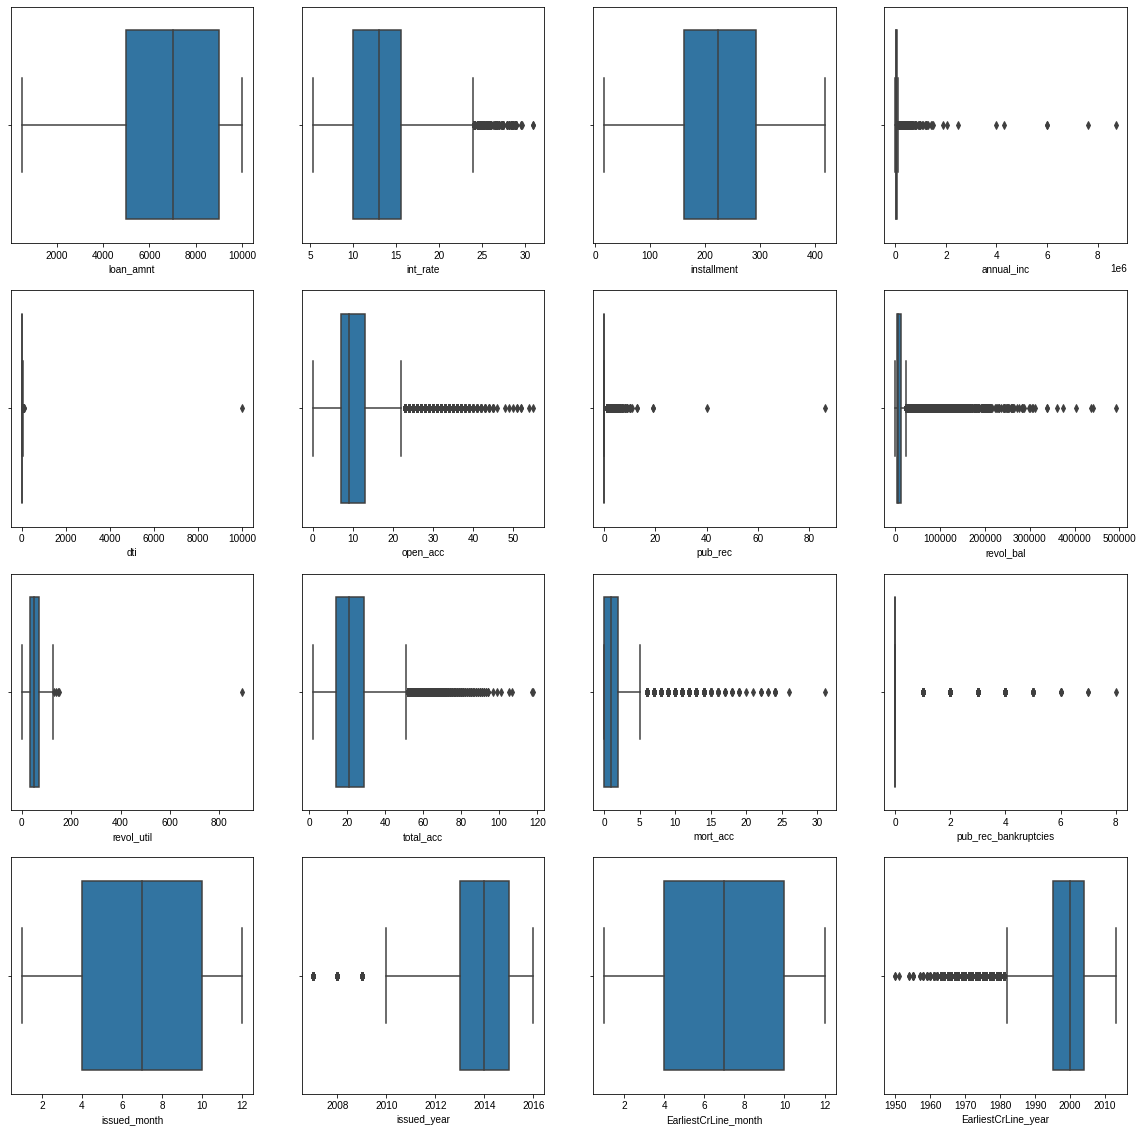

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in lendclub.describe().columns:
  plt.subplot(4,4,n)
  sns.boxplot(lendclub[name])
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

## pub_rec_bankruptcies

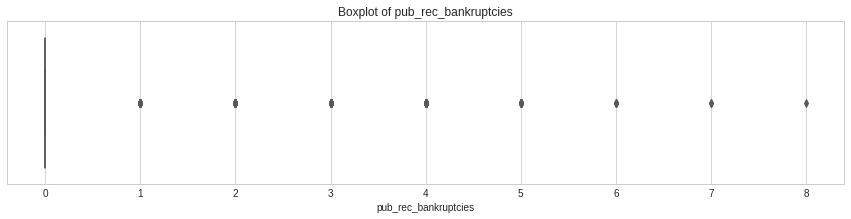

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'pub_rec_bankruptcies', data = lendclub, palette = 'Set2')
plt.title('Boxplot of pub_rec_bankruptcies')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_prb = lendclub.describe()['pub_rec_bankruptcies']['25%']
Q3_prb = lendclub.describe()['pub_rec_bankruptcies']['75%']
IQR_prb = Q3_prb - Q1_prb
UpFence_prb = Q3_prb + (1.5 * IQR_prb)
LoFence_prb = Q1_prb - (1.5 * IQR_prb)

out_prb = (lendclub['pub_rec_bankruptcies'] < LoFence_prb) | (lendclub['pub_rec_bankruptcies'] > UpFence_prb)
lendclub[out_prb].sort_values(by = 'pub_rec_bankruptcies')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
10        10000.0   36 months     13.11  ...                 1990   00813    NM
258408     9600.0   36 months     11.55  ...                 1994   29597    MS
258399     7000.0   36 months     13.35  ...                 1977   00813    UT
258363     7300.0   36 months     16.99  ...                 1995   70466    WV
258361     3100.0   36 months      8.90  ...                 1964   48052    AE
...           ...         ...       ...  ...                  ...     ...   ...
84232      8875.0   36 months     21.00  ...                 2001   70466    DE
55891      8825.0   36 months     12.69  ...                 1981   70466    NH
72502      4450.0   36 months     18.49  ...                 1998   22690    AL
370743     9075.0   36 months     19.99  ...                 2002   48052    MA
373971     6500.0   36 months     24.08  ...                 1997   05113    MS

[24193 rows x 31 columns]

In [ ]:
print(f"Outliers of 'pub_rec_bankruptcies' column is above {UpFence_prb} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_prb].sort_values(by = 'pub_rec_bankruptcies'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_prb]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'pub_rec_bankruptcies' column is above 0.0 .
Total data which counted as an outliers is 24193 of 164337 rows.
It's 14.72% from the entire rows.


## mort_acc

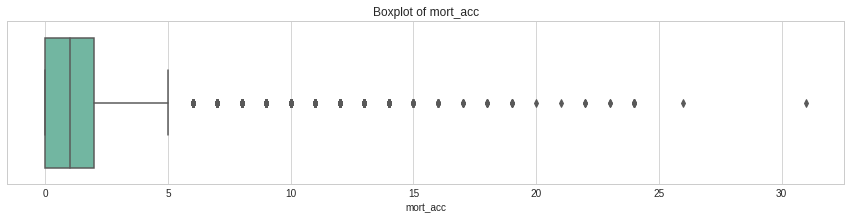

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'mort_acc', data = lendclub, palette = 'Set2')
plt.title('Boxplot of mort_acc')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ma = lendclub.describe()['mort_acc']['25%']
Q3_ma = lendclub.describe()['mort_acc']['75%']
IQR_ma = Q3_ma - Q1_ma
UpFence_ma = Q3_ma + (1.5 * IQR_ma)
LoFence_ma = Q1_ma - (1.5 * IQR_ma)

out_ma = (lendclub['mort_acc'] < LoFence_ma) | (lendclub['mort_acc'] > UpFence_ma)
lendclub[out_ma].sort_values(by = 'mort_acc')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
21         7350.0   36 months     13.11  ...                 1999   05113    SD
217201    10000.0   60 months     14.64  ...                 2001   30723    PA
217472    10000.0   36 months      7.62  ...                 2000   70466    NJ
217716     6000.0   36 months     11.67  ...                 1961   70466    DE
217967     5000.0   36 months      9.17  ...                 1990   48052    MT
...           ...         ...       ...  ...                  ...     ...   ...
88824      9600.0   36 months     13.67  ...                 2001   00813    MA
341054     1500.0   36 months     11.14  ...                 1984   05113    IN
253202     8000.0   36 months     11.99  ...                 1980   30723    NE
210407     8500.0   36 months      7.39  ...                 2002   22690    NJ
132453    10000.0   36 months      7.90  ...                 2001   48052    MA

[6341 rows x 31 columns]

In [ ]:
print(f"Outliers of 'mort_acc' column is above {UpFence_ma} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_ma].sort_values(by = 'mort_acc'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_ma]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'mort_acc' column is above 5.0 .
Total data which counted as an outliers is 6341 of 164337 rows.
It's 3.86% from the entire rows.


## total_acc

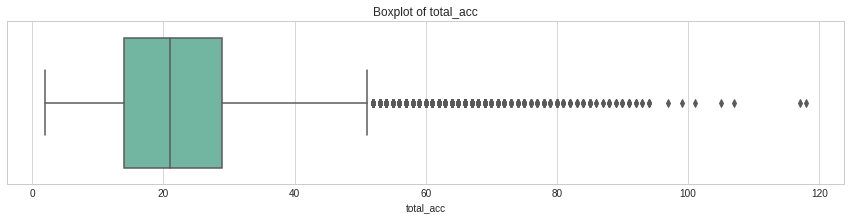

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'total_acc', data = lendclub, palette = 'Set2')
plt.title('Boxplot of total_acc')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ta = lendclub.describe()['total_acc']['25%']
Q3_ta = lendclub.describe()['total_acc']['75%']
IQR_ta = Q3_ta - Q1_ta
UpFence_ta = Q3_ta + (1.5 * IQR_ta)
LoFence_ta = Q1_ta - (1.5 * IQR_ta)

out_ta = (lendclub['total_acc'] < LoFence_ta) | (lendclub['total_acc'] > UpFence_ta)
lendclub[out_ta].sort_values(by = 'total_acc')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
113806     8000.0   36 months     12.49  ...                 1982   70466    ID
300353    10000.0   36 months     17.57  ...                 1991   22690    WV
300396     5000.0   36 months     19.52  ...                 2004   05113    DC
37931      8000.0   36 months      7.89  ...                 1992   00813    IL
85209     10000.0   36 months     13.98  ...                 1984   48052    GA
...           ...         ...       ...  ...                  ...     ...   ...
394185     2000.0   36 months     12.29  ...                 1989   70466    WI
140335     8000.0   36 months     10.99  ...                 1993   70466    AE
250210     1000.0   36 months      5.32  ...                 1995   00813    NV
154720     9600.0   36 months     20.99  ...                 2004   00813    WV
116541     5000.0   36 months     13.98  ...                 1998   05113    ND

[3577 rows x 31 columns]

In [ ]:
print(f"Outliers of 'total_acc' column is above {UpFence_ta} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_ta].sort_values(by = 'total_acc'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_ta]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'total_acc' column is above 51.5 .
Total data which counted as an outliers is 3577 of 164337 rows.
It's 2.18% from the entire rows.


## revol_util

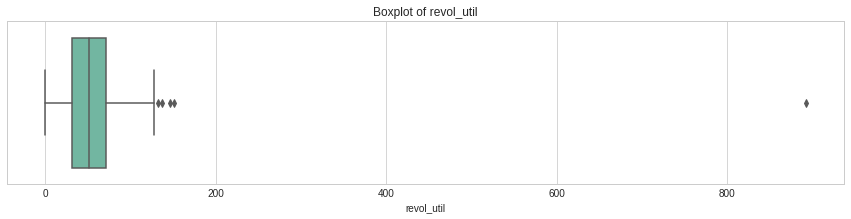

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'revol_util', data = lendclub, palette = 'Set2')
plt.title('Boxplot of revol_util')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ru = lendclub.describe()['revol_util']['25%']
Q3_ru = lendclub.describe()['revol_util']['75%']
IQR_ru = Q3_ru - Q1_ru
UpFence_ru = Q3_ru + (1.5 * IQR_ru)
LoFence_ru = Q1_ru - (1.5 * IQR_ru)

out_ru = (lendclub['revol_util'] < LoFence_ru) | (lendclub['revol_util'] > UpFence_ru)
lendclub[out_ru].sort_values(by = 'revol_util')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
211426     9175.0   36 months     17.57  ...                 2007   22690    SC
108246    10000.0   36 months     17.27  ...                 2005   22690    ID
312268     8000.0   36 months     11.99  ...                 2000   22690    MD
65687     10000.0   36 months     14.16  ...                 1997   70466    WI
137211     3500.0   36 months     12.49  ...                 1998   00813    TN

[5 rows x 31 columns]

In [ ]:
print(f"Outliers of 'revol_util' column is above {UpFence_ru} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_ru].sort_values(by = 'revol_util'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_ru]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'revol_util' column is above 129.14999999999998 .
Total data which counted as an outliers is 5 of 164337 rows.
It's 0.00% from the entire rows.


## revol_bal

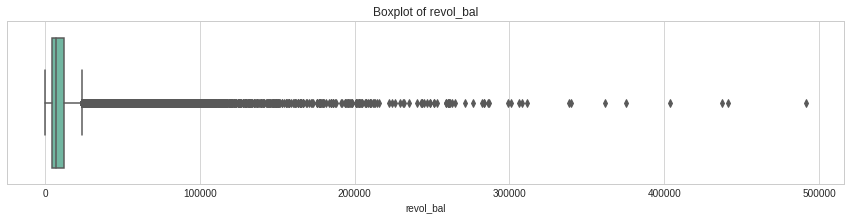

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'revol_bal', data = lendclub, palette = 'Set2')
plt.title('Boxplot of revol_bal')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_rb = lendclub.describe()['revol_bal']['25%']
Q3_rb = lendclub.describe()['revol_bal']['75%']
IQR_rb = Q3_rb - Q1_rb
UpFence_rb = Q3_rb + (1.5 * IQR_rb)
LoFence_rb = Q1_rb - (1.5 * IQR_rb)

out_rb = (lendclub['revol_bal'] < LoFence_rb) | (lendclub['revol_bal'] > UpFence_rb)
lendclub[out_rb].sort_values(by = 'revol_bal')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
372119     6000.0   36 months     13.99  ...                 2001   00813    IA
121447    10000.0   36 months     13.68  ...                 1996   70466    AP
314500     9500.0   36 months      6.62  ...                 1994   00813    DC
316232     6825.0   36 months     10.99  ...                 1983   29597    AA
185850    10000.0   36 months      5.32  ...                 1999   48052    MI
...           ...         ...       ...  ...                  ...     ...   ...
332817    10000.0   36 months      8.39  ...                 1993   30723    AR
199292    10000.0   36 months      6.49  ...                 1988   05113    NE
169084    10000.0   36 months     13.18  ...                 1987   22690    MA
294220    10000.0   36 months      6.24  ...                 1985   05113    IL
279120     6000.0   36 months     11.55  ...                 1986   22690    MO

[12408 rows x 31 columns]

In [ ]:
print(f"Outliers of 'revol_bal' column is above {UpFence_rb} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_rb].sort_values(by = 'revol_bal'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_rb]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'revol_bal' column is above 23987.0 .
Total data which counted as an outliers is 12408 of 164337 rows.
It's 7.55% from the entire rows.


## pub_rec

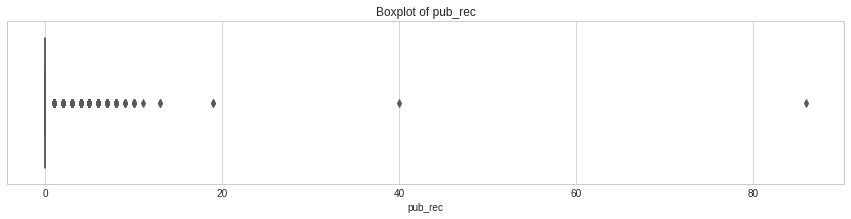

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'pub_rec', data = lendclub, palette = 'Set2')
plt.title('Boxplot of pub_rec')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_pr = lendclub.describe()['pub_rec']['25%']
Q3_pr = lendclub.describe()['pub_rec']['75%']
IQR_pr = Q3_pr - Q1_pr
UpFence_pr = Q3_pr + (1.5 * IQR_pr)
LoFence_pr = Q1_pr - (1.5 * IQR_pr)

out_pr = (lendclub['pub_rec'] < LoFence_pr) | (lendclub['pub_rec'] > UpFence_pr)
lendclub[out_pr].sort_values(by = 'pub_rec')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
10        10000.0   36 months     13.11  ...                 1990   00813    NM
251528     7800.0   36 months     14.98  ...                 1995   22690    AE
251511     1200.0   36 months     10.99  ...                 1986   00813    TN
251509     8000.0   36 months     12.69  ...                 1998   30723    SC
251502     7750.0   36 months     13.11  ...                 1996   48052    MT
...           ...         ...       ...  ...                  ...     ...   ...
90433      5000.0   36 months     18.92  ...                 1997   30723    FL
112187     5000.0   36 months     12.39  ...                 1998   86630    MS
58202      2000.0   36 months     16.99  ...                 1998   48052    MO
127417     5950.0   36 months     23.43  ...                 1987   22690    FL
218818     6400.0   36 months     13.18  ...                 1987   30723    RI

[29721 rows x 31 columns]

In [ ]:
print(f"Outliers of 'pub_rec' column is above {UpFence_pr} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_pr].sort_values(by = 'pub_rec'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_pr]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'pub_rec' column is above 0.0 .
Total data which counted as an outliers is 29721 of 164337 rows.
It's 18.09% from the entire rows.


## open_acc

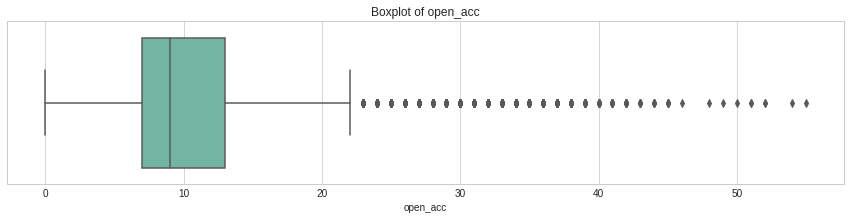

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'open_acc', data = lendclub, palette = 'Set2')
plt.title('Boxplot of open_acc')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_oa = lendclub.describe()['open_acc']['25%']
Q3_oa = lendclub.describe()['open_acc']['75%']
IQR_oa = Q3_oa - Q1_oa
UpFence_oa = Q3_oa + (1.5 * IQR_oa)
LoFence_oa = Q1_oa - (1.5 * IQR_oa)

out_oa = (lendclub['open_acc'] < LoFence_oa) | (lendclub['open_acc'] > UpFence_oa)
lendclub[out_oa].sort_values(by = 'open_acc')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
109        6600.0   36 months     19.53  ...                 2001   30723    NY
240510     2500.0   36 months     12.29  ...                 1996   30723    AR
84446      2875.0   60 months     19.72  ...                 2000   22690    NM
239883    10000.0   36 months     13.11  ...                 1990   22690    DE
239780    10000.0   36 months      6.62  ...                 1978   29597    AR
...           ...         ...       ...  ...                  ...     ...   ...
194489     7200.0   36 months     11.49  ...                 2002   22690    NM
221957     6000.0   36 months     10.15  ...                 1997   30723    SD
293733     5950.0   36 months     15.99  ...                 2007   86630    DE
250210     1000.0   36 months      5.32  ...                 1995   00813    NV
187623     2200.0   36 months      9.17  ...                 1980   70466    OR

[3689 rows x 31 columns]

In [ ]:
print(f"Outliers of 'open_acc' column is above {UpFence_oa} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_oa].sort_values(by = 'open_acc'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_oa]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'open_acc' column is above 22.0 .
Total data which counted as an outliers is 3689 of 164337 rows.
It's 2.24% from the entire rows.


## dti


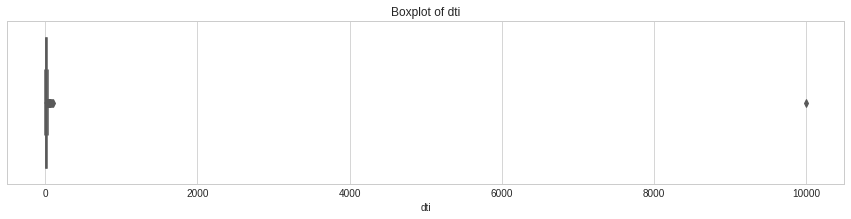

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'dti', data = lendclub, palette = 'Set2')
plt.title('Boxplot of dti')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_dt = lendclub.describe()['dti']['25%']
Q3_dt = lendclub.describe()['dti']['75%']
IQR_dt = Q3_dt - Q1_dt
UpFence_dt = Q3_dt + (1.5 * IQR_dt)
LoFence_dt = Q1_dt - (1.5 * IQR_dt)

out_dt = (lendclub['dti'] < LoFence_dt) | (lendclub['dti'] > UpFence_dt)
lendclub[out_dt].sort_values(by = 'dti')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
392332     5000.0   36 months     16.29  ...                 1991   30723    AP
85562     10000.0   36 months     19.53  ...                 2000   11650    VT
1291      10000.0   36 months     11.47  ...                 2002   48052    AP
340327     3050.0   36 months     19.53  ...                 2005   29597    AA
284944     7450.0   36 months     20.75  ...                 1996   48052    DE
...           ...         ...       ...  ...                  ...     ...   ...
314513     5000.0   36 months      7.39  ...                 2007   29597    NM
108842    10000.0   36 months     10.75  ...                 2003   29597    WV
280972     2000.0   36 months      9.75  ...                 1995   22690    TN
264045     3200.0   36 months     28.99  ...                 2005   48052    OR
285674     3700.0   36 months     12.59  ...                 1978   30723    MA

[119 rows x 31 columns]

In [ ]:
print(f"Outliers of 'dti' column is above {UpFence_dt} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_dt].sort_values(by = 'dti'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_dt]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'dti' column is above 40.655 .
Total data which counted as an outliers is 119 of 164337 rows.
It's 0.07% from the entire rows.


## annual_inc

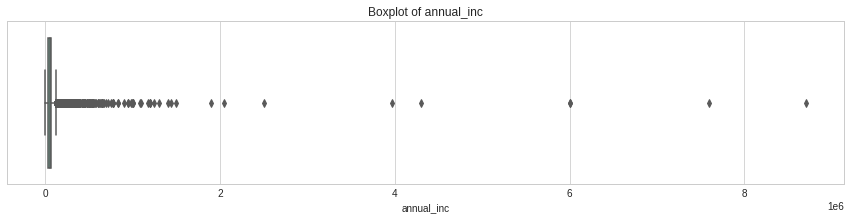

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'annual_inc', data = lendclub, palette = 'Set2')
plt.title('Boxplot of annual_inc')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ai = lendclub.describe()['annual_inc']['25%']
Q3_ai = lendclub.describe()['annual_inc']['75%']
IQR_ai = Q3_ai - Q1_ai
UpFence_ai = Q3_ai + (1.5 * IQR_ai)
LoFence_ai = Q1_ai - (1.5 * IQR_ai)

out_ai = (lendclub['annual_inc'] < LoFence_ai) | (lendclub['annual_inc'] > UpFence_ai)
lendclub[out_ai].sort_values(by = 'annual_inc')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
201562     5400.0   36 months      5.99  ...                 1999   00813    AZ
65542      2650.0   36 months      8.90  ...                 2000   30723    KS
64005      4800.0   36 months     18.75  ...                 2003   93700    GA
369734    10000.0   36 months      6.03  ...                 1999   70466    NE
196922     7750.0   36 months     12.53  ...                 1992   30723    MN
...           ...         ...       ...  ...                  ...     ...   ...
292364     8000.0   36 months      9.17  ...                 2001   05113    IL
391587     4475.0   36 months      7.89  ...                 2001   30723    MO
165401     5000.0   36 months     12.73  ...                 2001   30723    ME
318255    10000.0   36 months      6.89  ...                 1989   00813    AA
308700     8000.0   36 months     13.66  ...                 2000   93700    HI

[6467 rows x 31 columns]

In [ ]:
print(f"Outliers of 'annual_inc' column is above {UpFence_ai} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_ai].sort_values(by = 'annual_inc'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_ai]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'annual_inc' column is above 121000.0 .
Total data which counted as an outliers is 6467 of 164337 rows.
It's 3.94% from the entire rows.


## installment

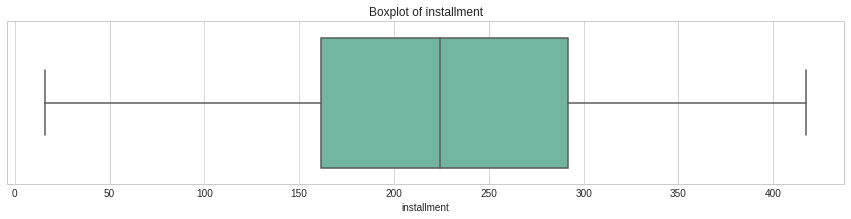

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'installment', data = lendclub, palette = 'Set2')
plt.title('Boxplot of installment')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_in = lendclub.describe()['installment']['25%']
Q3_in = lendclub.describe()['installment']['75%']
IQR_in = Q3_in - Q1_in
UpFence_in = Q3_in + (1.5 * IQR_in)
LoFence_in = Q1_in - (1.5 * IQR_in)

out_in = (lendclub['installment'] < LoFence_in) | (lendclub['installment'] > UpFence_in)
lendclub[out_in].sort_values(by = 'installment')

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address, issued_month, issued_year, EarliestCrLine_month, EarliestCrLine_year, zipcode, state]
Index: []

In [ ]:
print(f"Outliers of 'installment' column is above {UpFence_in} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_in].sort_values(by = 'installment'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_in]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'installment' column is above 487.69500000000005 .
Total data which counted as an outliers is 0 of 164337 rows.
It's 0.00% from the entire rows.


## int_rate

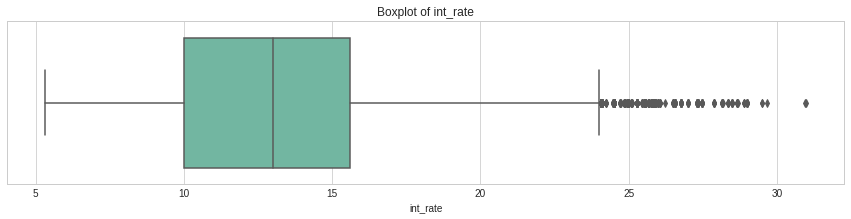

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'int_rate', data = lendclub, palette = 'Set2')
plt.title('Boxplot of int_rate')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_ir = lendclub.describe()['int_rate']['25%']
Q3_ir = lendclub.describe()['int_rate']['75%']
IQR_ir = Q3_ir - Q1_ir
UpFence_ir = Q3_ir + (1.5 * IQR_ir)
LoFence_ir = Q1_ir - (1.5 * IQR_ir)

out_ir = (lendclub['int_rate'] < LoFence_ir) | (lendclub['int_rate'] > UpFence_ir)
lendclub[out_ir].sort_values(by = 'int_rate')

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
309028     5000.0   60 months     24.08  ...                 1997   05113    CT
150198    10000.0   60 months     24.08  ...                 1995   00813    MA
296532     6300.0   36 months     24.08  ...                 1998   29597    NJ
147089     6000.0   36 months     24.08  ...                 1973   48052    VT
298672     6500.0   60 months     24.08  ...                 2005   22690    AP
...           ...         ...       ...  ...                  ...     ...   ...
64709      8000.0   36 months     29.49  ...                 1989   30723    AP
382542     5350.0   36 months     29.49  ...                 2002   00813    AE
327611     6850.0   36 months     29.67  ...                 2010   48052    DC
221921     3300.0   36 months     30.94  ...                 2000   30723    MN
264785     6025.0   36 months     30.99  ...                 2002   05113    ME

[1222 rows x 31 columns]

In [ ]:
print(f"Outliers of 'int_rate' column is above {UpFence_ir} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_ir].sort_values(by = 'int_rate'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_ir]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'int_rate' column is above 24.04 .
Total data which counted as an outliers is 1222 of 164337 rows.
It's 0.74% from the entire rows.


## loan_amnt

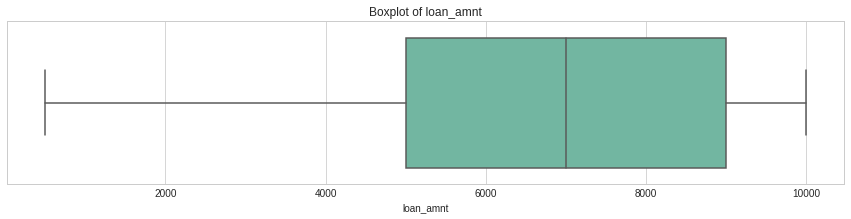

In [ ]:
plt.figure(figsize = (15,3))
sns.boxplot(x = 'loan_amnt', data = lendclub, palette = 'Set2')
plt.title('Boxplot of loan_amnt')

plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
Q1_la = lendclub.describe()['loan_amnt']['25%']
Q3_la = lendclub.describe()['loan_amnt']['75%']
IQR_la = Q3_la - Q1_la
UpFence_la = Q3_la + (1.5 * IQR_la)
LoFence_la = Q1_la - (1.5 * IQR_la)

out_la = (lendclub['loan_amnt'] < LoFence_la) | (lendclub['loan_amnt'] > UpFence_la)
lendclub[out_la].sort_values(by = 'loan_amnt')

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address, issued_month, issued_year, EarliestCrLine_month, EarliestCrLine_year, zipcode, state]
Index: []

In [ ]:
print(f"Outliers of 'loan_amnt' column is above {UpFence_la} .")
print(f"Total data which counted as an outliers is {len(lendclub[out_la].sort_values(by = 'loan_amnt'))} of {len(lendclub)} rows.")
print(f"It's{(len(lendclub[out_la]) ) / len(lendclub) * 100 : .2f}% from the entire rows.")

Outliers of 'loan_amnt' column is above 15000.0 .
Total data which counted as an outliers is 0 of 164337 rows.
It's 0.00% from the entire rows.


# 6) Exploratory Data Analysis

In [ ]:
lendclub.head()
# total of 31 columns

loan_amnt        term  int_rate  ...  EarliestCrLine_year zipcode state
0     10000.0   36 months     11.44  ...                 1990   22690    OK
1      8000.0   36 months     11.99  ...                 2004   05113    SD
3      7200.0   36 months      6.49  ...                 2006   00813    MA
10    10000.0   36 months     13.11  ...                 1990   00813    NM
12     7500.0   36 months      9.17  ...                 1995   70466    MS

[5 rows x 31 columns]

## Univariate

In [ ]:
lendclub.describe().T

# The average value of each column is:
    # Loan Amount: $6,684
    # Interest Rate: 12.9%
    # Installment: $221
    # Annual Income: $58,056 *
    # Debt-to-Income Ratio: 16.8 *
    # Number of Open Credit Lines Acccount: 10 accounts
    # Number of derogatory public records: 0
    # Total Credit Revolving Balance: $10,300 *
    # Revolving Line Utilization Rate: $51 *
    # Total Credit Lines Account currently: 22 accounts *
    # Number of Mortgage Account: 1 account *
    # Number of public record bankruptcies: 0 *
    # Month of Loan was Issued: month 6 - June
    # Year of Loan was issued: 2013
    # Month the borrower's earliest reported credit line was opened: Month 6 - June
    # Year the borrower's earliest reported credit line was opened: 1998

count          mean  ...       75%         max
loan_amnt             164337.0   6684.021097  ...   9000.00    10000.00
int_rate              164337.0     12.969316  ...     15.61       30.99
installment           164337.0    221.028361  ...    291.87      417.38
annual_inc            164337.0  58056.242575  ...  70000.00  8706582.00
dti                   164337.0     16.833960  ...     22.55     9999.00
open_acc              164337.0     10.296829  ...     13.00       55.00
pub_rec               164337.0      0.219707  ...      0.00       86.00
revol_bal             164337.0  10300.114460  ...  12110.00   491712.00
revol_util            164337.0     51.096413  ...     70.80      892.30
total_acc             164337.0     22.866756  ...     29.00      118.00
mort_acc              164337.0      1.346654  ...      2.00       31.00
pub_rec_bankruptcies  164337.0      0.157433  ...      0.00        8.00
issued_month          164337.0      6.624461  ...     10.00       12.00
issued_year           164337.0   2013.465610  ...   2015.00     2016.00
EarliestCrLine_month  164337.0      6.778948  ...     10.00       12.00
EarliestCrLine_year   164337.0   1998.764508  ...   2004.00     2013.00

[16 rows x 8 columns]

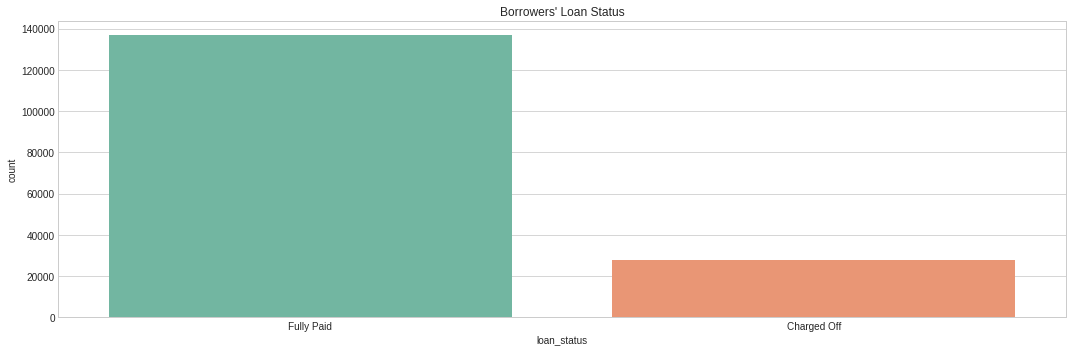

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['loan_status'], palette = 'Set2')
plt.title("Borrowers' Loan Status")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 83.18 % borrowers are likely to complete their loan amount rather than 16.82 % borrowers who has been valued as charged-off.

In [ ]:
lendclub.stb.freq(['loan_status'], cum_cols = False)

loan_status   count    percent
0   Fully Paid  136690  83.176643
1  Charged Off   27647  16.823357

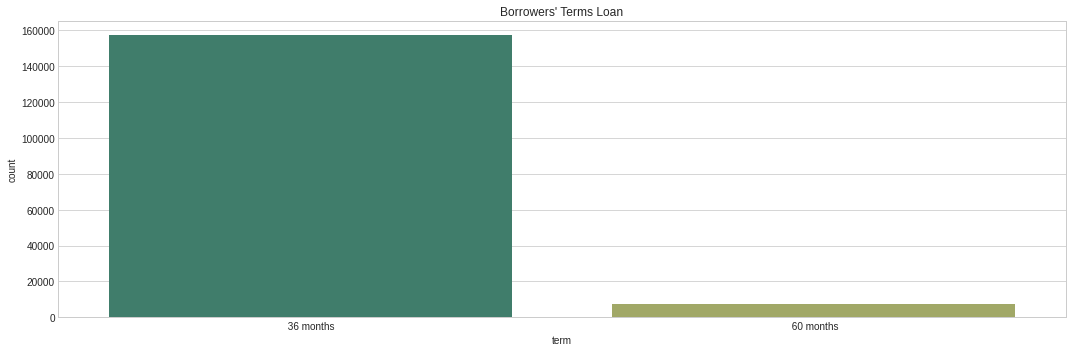

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['term'], palette = 'gist_earth')
plt.title("Borrowers' Terms Loan")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 95.7 % borrowers have loan term 36 months.

In [ ]:
lendclub.stb.freq(['term'], cum_cols = False)

term   count    percent
0   36 months  157195  95.654052
1   60 months    7142   4.345948

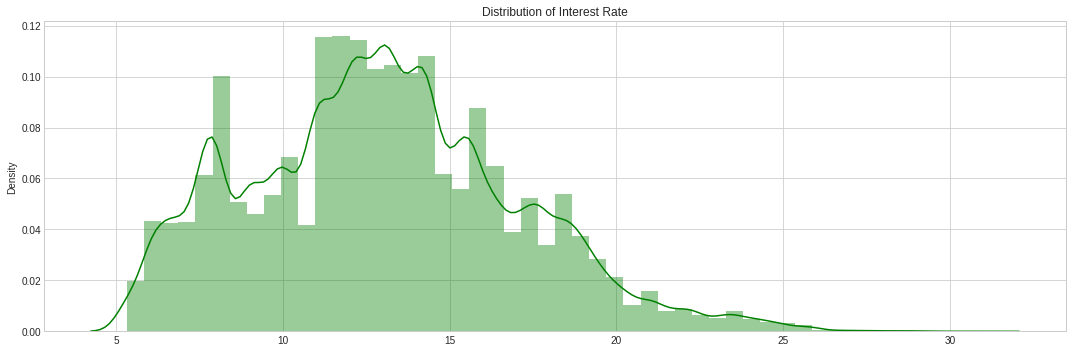

In [ ]:
plt.figure(figsize = (15,5))

sns.distplot(x = lendclub['int_rate'], 
              color = 'Green')
             
plt.title("Distribution of Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# the most interest rate is about 10-12.5%

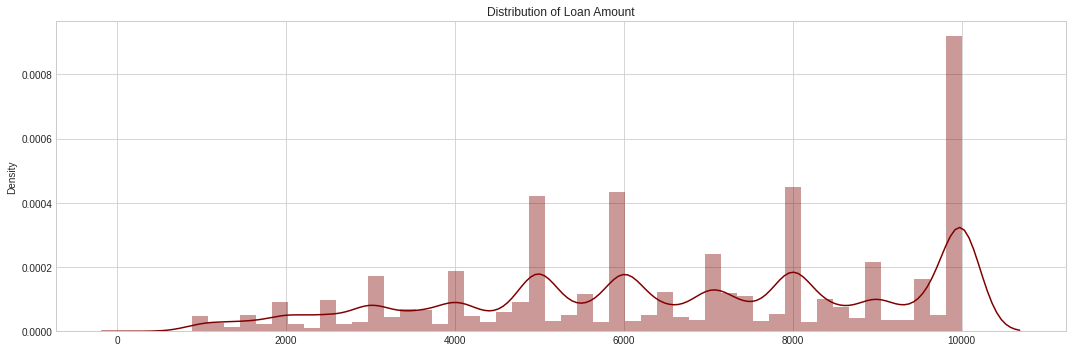

In [ ]:
plt.figure(figsize = (15,5))

sns.distplot(x = lendclub['loan_amnt'], 
             color = 'Maroon')
             
plt.title("Distribution of Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The most amount loan is around $10,000

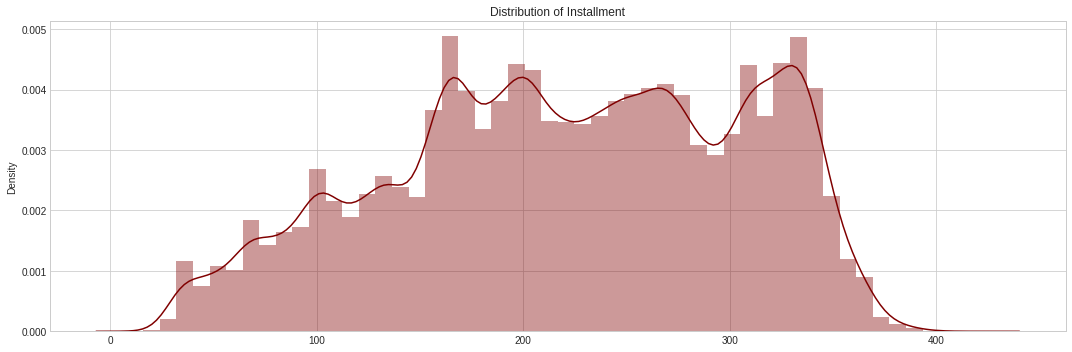

In [ ]:
plt.figure(figsize = (15,5))

sns.distplot(x = lendclub['installment'], 
             color = 'Maroon')
             
plt.title("Distribution of Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The most installment is about $150-$200

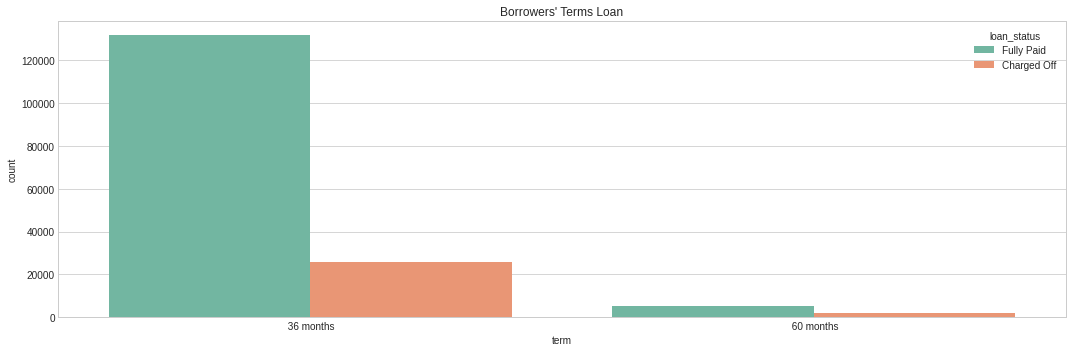

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['term'], hue = lendclub['loan_status'], palette = 'Set2')
plt.title("Borrowers' Terms Loan")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# borrowers who loan along 36 months (3 years) tend to pay in full (83.7%) rather than being charged-off (16.3%)
# borrowers who loan along 60 months (5 years) tend to pay in full (71.7%) rather than being charged-off (28.4%)
# LendingClub could convinces investors whether invest their money to 3 or 5 years borrowers
    # because they have a higher percentage chance to complete their loan than being charged-off.

In [ ]:
# percentage only

(pd.crosstab(lendclub['loan_status'], lendclub['term'], normalize = 'columns')*100).round(3)

term          36 months   60 months
loan_status                        
Charged Off        16.3      28.353
Fully Paid         83.7      71.647

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['term'])

term          36 months   60 months
loan_status                        
Charged Off       25622        2025
Fully Paid       131573        5117

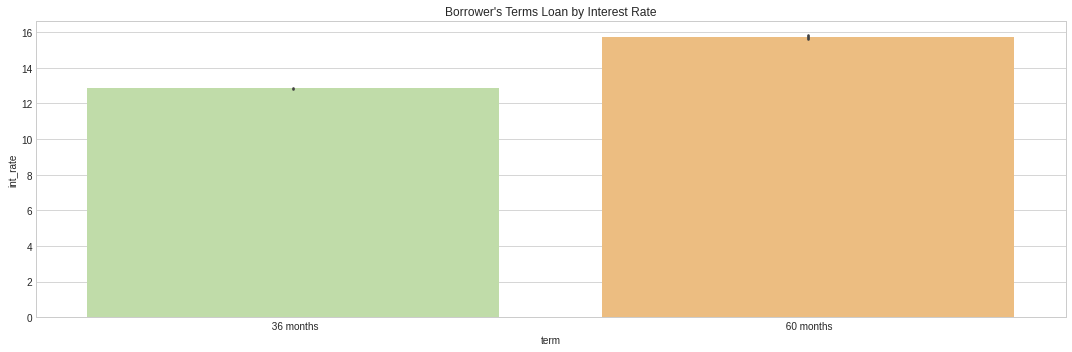

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['int_rate'],
             palette = 'Spectral_r')
plt.title("Borrower's Terms Loan by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Notice that borrowers who loan 60 months has higher interest rate (15.7%) rather than 36 months (12.8%).

In [ ]:
pd.crosstab(index = "Average of Interest Rate", 
            columns = lendclub['term'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

term                       36 months   60 months
row_0                                           
Average of Interest Rate   12.844366   15.719462

In [ ]:
order_grade = sorted(lendclub['grade'].unique())

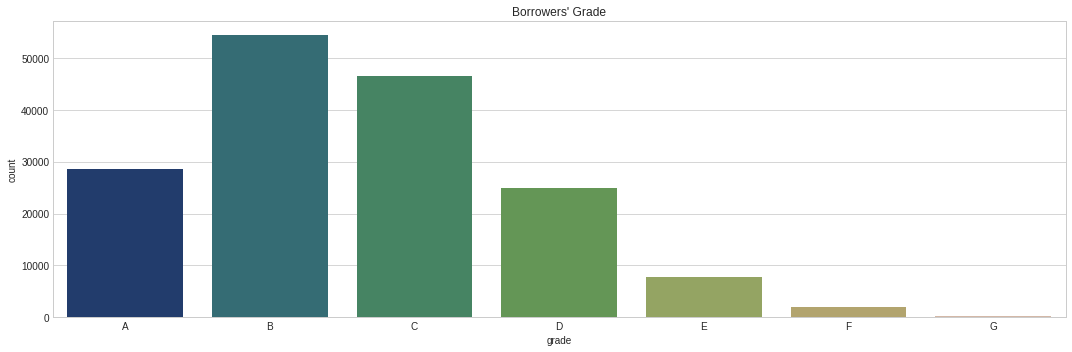

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['grade'], palette = 'gist_earth', order = order_grade)
plt.title("Borrowers' Grade")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 33.04% borrowers are grade 'B', and 28.3% borrowers are grade 'C'.
# Both grade 'B' and 'C' combined into 61.34% alone.
# The least percentage of borrowers is grade 'G'.

# This tells us that LendingClub is the healthy platform for investors.

In [ ]:
lendclub.stb.freq(['grade'], cum_cols = False)

grade  count    percent
0     B  54299  33.041251
1     C  46445  28.262047
2     A  28521  17.355191
3     D  24941  15.176740
4     E   7782   4.735391
5     F   2076   1.263258
6     G    273   0.166122

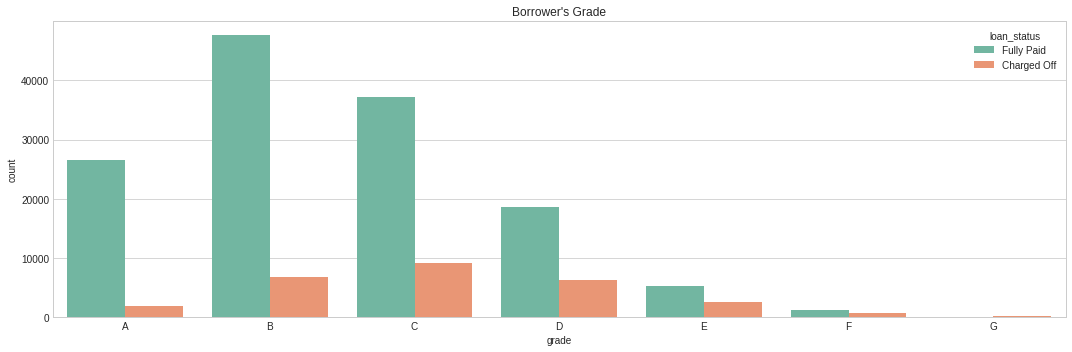

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['grade'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2',
             order = order_grade )
plt.title("Borrower's Grade")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# We see that most of the grades are fully paid.
# The highest percentage of borrowers who pay in full their loan is grade A with 93.3%.
# and the most challenging grade for investors is 'grade G' with 49.5% chance that borrowers would complete their loan.

# So, LendingClub is the safest investment p2p because the worst grade is still has 49.5% probability to complete the loan with the highest interest rate

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['grade'], normalize = 'columns')*100).round(3)

grade             A       B       C      D       E       F       G
loan_status                                                       
Charged Off   6.732  12.398  19.858  25.38  32.524  37.235  50.549
Fully Paid   93.268  87.602  80.142  74.62  67.476  62.765  49.451

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['grade'])

grade            A      B      C      D     E     F    G
loan_status                                             
Charged Off   1920   6732   9223   6330  2531   773  138
Fully Paid   26601  47567  37222  18611  5251  1303  135

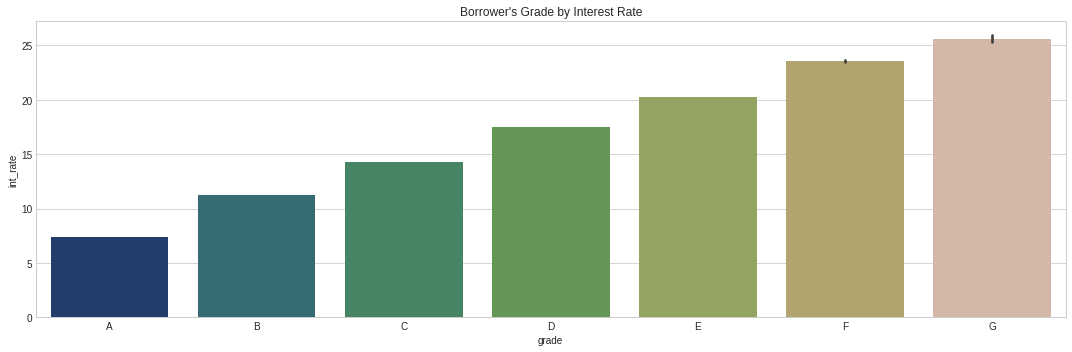

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['int_rate'],
             palette = 'gist_earth',
             order = sorted(lendclub['grade'].unique()) )
plt.title("Borrower's Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Each grade has the average interest rate:
    # A	7.362835  %
    # B	11.230545 %
    # C	14.250424 %
    # D	17.488502 %
    # E	20.252314 %
    # F	23.554118 %
    # G	25.612088 %

# Basically, if investors want to get high return, just put it their money in to the lowest grade with 25.6% interest rate
# but in here, we know is too risky.
# Then we want to convince investors to offer our LendingClub subscription service to predict the final loan status of borrowers
# without being dizzy to think about risks.

In [ ]:
lendclub.groupby('grade').mean()['int_rate'].to_frame()

int_rate
grade           
A       7.362835
B      11.230545
C      14.250424
D      17.488502
E      20.252314
F      23.554118
G      25.612088

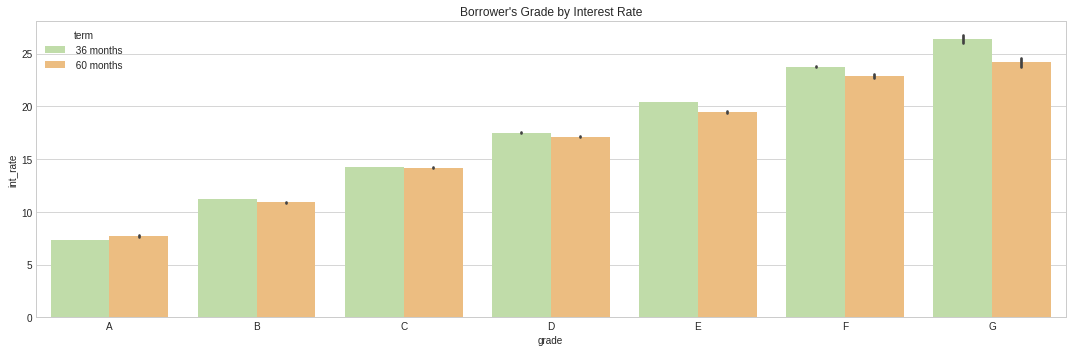

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['int_rate'],
            hue = lendclub['term'],
            palette = 'Spectral_r',
            order = order_grade)
plt.title("Borrower's Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# by the grade, the interest rate still go up when the grade is closing to 'G'.
# but we see grade 'A' tends to has higher interest rate from borrowers who loan 60 months than 36 months.
# LendingClub could recommends investor confidently if the borrowers' grade is 'A' and the term loan is 60 months.

In [ ]:
(pd.crosstab(index = lendclub['term'], 
             columns = lendclub['grade'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean',
             normalize = 'columns')*100).round(3)

grade           A       B       C      D       E       F      G
term                                                           
 36 months  48.79  50.732  50.099  50.57  51.201  50.958  52.18
 60 months  51.21  49.268  49.901  49.43  48.799  49.042  47.82

In [ ]:
pd.crosstab(index = lendclub['term'], 
             columns = lendclub['grade'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean')

grade              A          B          C  ...          E          F          G
term                                        ...                                 
 36 months  7.359343  11.238184  14.252905  ...  20.407641  23.769721  26.379270
 60 months  7.724249  10.913901  14.196745  ...  19.450594  22.876327  24.174632

[2 rows x 7 columns]

In [ ]:
order_subgrade = sorted(lendclub['sub_grade'].unique())

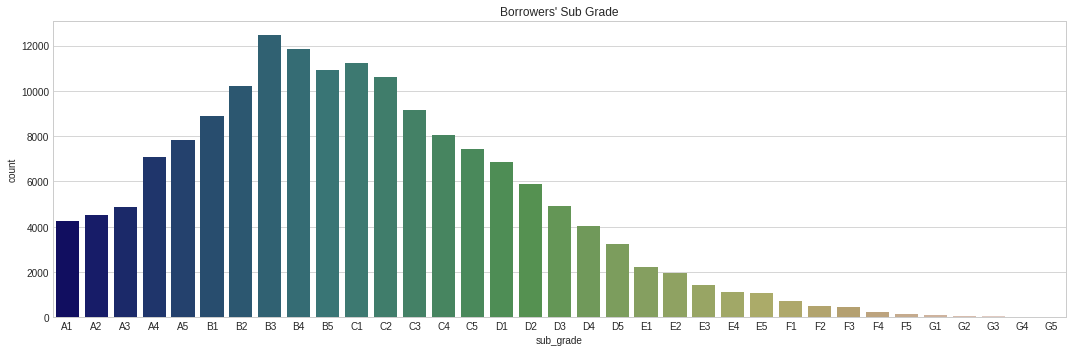

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['sub_grade'], palette = 'gist_earth', order = order_subgrade)
plt.title("Borrowers' Sub Grade")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The most borowers is grade 'B3' with 12443 borrowers
# The least borrowers is grade 'G5' with 20 borrowers
# This tells us that LendingClub is the healthy platform for investors.

In [ ]:
lendclub.stb.freq(['sub_grade'], cum_cols = False)

sub_grade  count   percent
0         B3  12443  7.571636
1         B4  11826  7.196188
2         C1  11221  6.828042
3         B5  10931  6.651576
4         C2  10594  6.446509
5         B2  10207  6.211018
6         C3   9152  5.569044
7         B1   8892  5.410833
8         C4   8046  4.896037
9         A5   7811  4.753038
10        C5   7432  4.522414
11        A4   7062  4.297267
12        D1   6855  4.171307
13        D2   5899  3.589575
14        D3   4925  2.996891
15        A3   4865  2.960380
16        A2   4512  2.745578
17        A1   4271  2.598928
18        D4   4044  2.460797
19        D5   3218  1.958171
20        E1   2201  1.339321
21        E2   1971  1.199365
22        E3   1413  0.859819
23        E4   1135  0.690654
24        E5   1062  0.646233
25        F1    731  0.444818
26        F2    495  0.301210
27        F3    456  0.277479
28        F4    256  0.155777
29        F5    138  0.083974
30        G1    112  0.068153
31        G2     76  0.046246
32        G3     38  0.023123
33        G4     27  0.016430
34        G5     20  0.012170

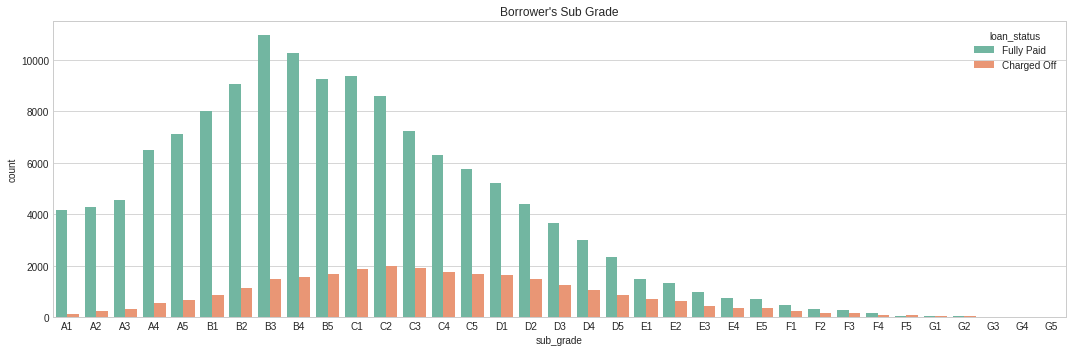

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['sub_grade'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2',
             order = sorted(lendclub['sub_grade'].unique()) )
plt.title("Borrower's Sub Grade")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Don't get amazed early, by the number of borrowers, 'B3' is the highest borrowers who complete their loan with 10,941 borrowers,
# but when it comes to proportion, the highest percentage of borrowers who complete their loan
# is 'A1' with 97.21%, meanwhile the 'B3' has 87.93% only.

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['sub_grade'])

sub_grade      A1    A2    A3    A4    A5    B1  ...  F5  G1  G2  G3  G4  G5
loan_status                                      ...                        
Charged Off   119   236   324   553   688   865  ...  76  53  42  18  14  11
Fully Paid   4152  4276  4541  6509  7123  8027  ...  62  59  34  20  13   9

[2 rows x 35 columns]

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['sub_grade'], normalize = 'columns')*100).round(3)

sub_grade        A1     A2     A3      A4  ...      G2      G3      G4    G5
loan_status                                ...                              
Charged Off   2.786   5.23   6.66   7.831  ...  55.263  47.368  51.852  55.0
Fully Paid   97.214  94.77  93.34  92.169  ...  44.737  52.632  48.148  45.0

[2 rows x 35 columns]

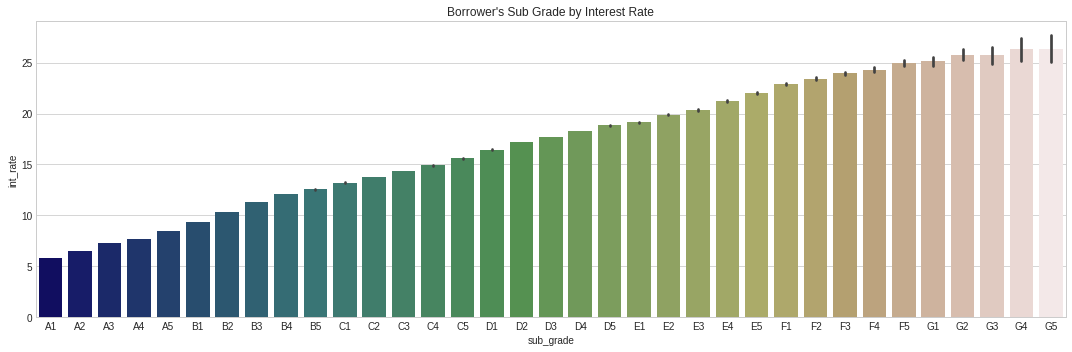

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['int_rate'],
             palette = 'gist_earth',
             order = sorted(lendclub['sub_grade'].unique()) )
plt.title("Borrower's Sub Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Technically, Sub Grade is the same with Grade. It just more detail in here.
# Each sub grade has the average interest rate:
    # A1	5.819092
    # A2	6.507715
    # A3	7.285667
    # A4	7.686930
    # A5	8.455948
    # B1	9.377942
    # B2	10.339716
    # B3	11.306661
    # B4	12.082757
    # B5	12.560770
    # C1	13.216536
    # C2	13.797327
    # C3	14.362676
    # C4	14.912800
    # C5	15.601954
    # D1	16.456071
    # D2	17.208927
    # D3	17.713094
    # D4	18.287008
    # D5	18.853092
    # E1	19.140886
    # E2	19.895180
    # E3	20.359038
    # E4	21.219198
    # E5	22.043230
    # F1	22.869193
    # F2	23.392020
    # F3	23.976162
    # F4	24.317422
    # F5	24.953116
    # G1	25.132768
    # G2	25.793684
    # G3	25.747632
    # G4	26.341481
    # G5	26.364000

# Either Grade or Sub Grade affects interest rate.

In [ ]:
lendclub.groupby('sub_grade').mean()['int_rate'].to_frame()

int_rate
sub_grade           
A1          5.819092
A2          6.507715
A3          7.285667
A4          7.686930
A5          8.455948
B1          9.377942
B2         10.339716
B3         11.306661
B4         12.082757
B5         12.560770
C1         13.216536
C2         13.797327
C3         14.362676
C4         14.912800
C5         15.601954
D1         16.456071
D2         17.208927
D3         17.713094
D4         18.287008
D5         18.853092
E1         19.140886
E2         19.895180
E3         20.359038
E4         21.219198
E5         22.043230
F1         22.869193
F2         23.392020
F3         23.976162
F4         24.317422
F5         24.953116
G1         25.132768
G2         25.793684
G3         25.747632
G4         26.341481
G5         26.364000

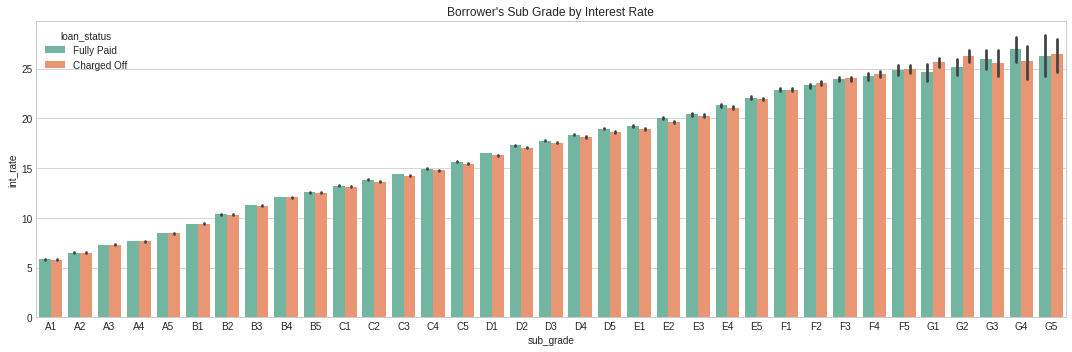

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['int_rate'],
             hue = lendclub['loan_status'], 
             palette = 'Set2',
             order = sorted(lendclub['sub_grade'].unique()) )
plt.title("Borrower's Sub Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# same, whatever the sub grade, the interest rate will has no significantly differences.

In [ ]:
(pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['sub_grade'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean',
             normalize = 'columns')*100).round(3)

sub_grade        A1     A2      A3     A4  ...      G2      G3      G4      G5
loan_status                                ...                                
Charged Off  49.897  49.92  50.038  49.89  ...  51.031  49.619  48.839  50.143
Fully Paid   50.103  50.08  49.962  50.11  ...  48.969  50.381  51.161  49.857

[2 rows x 35 columns]

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

sub_grade          A1        A2        A3  ...         G3         G4         G5
loan_status                                ...                                 
Charged Off  5.795798  6.488093  7.295926  ...  25.541111  25.752143  26.431818
Fully Paid   5.819759  6.508798  7.284935  ...  25.933500  26.976154  26.281111

[2 rows x 35 columns]

In [ ]:
order_emplength = [
                   '< 1 year',
                   '1 year',
                   '2 years',
                   '3 years',
                   '4 years',
                   '5 years',
                   '6 years',
                   '7 years',
                   '8 years',
                   '9 years',
                   '10+ years']

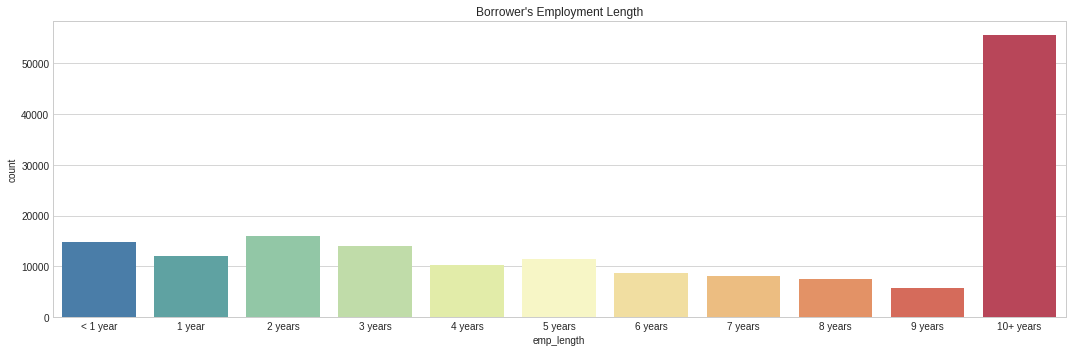

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['emp_length'], 
             palette = 'Spectral_r',
             order = order_emplength )
plt.title("Borrower's Employment Length")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The most borrowers come from 10+ years experiences background
# 55,413 borrowers have been working with 10+ years experiences.
# But, the other most frequent is come from below 3 years experiences.
# There are:
    # 2 years : 16,055 borrowers
    # < 1 year : 14,799 borrowers
    # 3 years : 14,037 borrowers
    # 1 year : 12,030 borrowers

# There are some entry level experiences who already apply the loan. 
# But for what? And How much?

In [ ]:
lendclub.stb.freq(['emp_length'], cum_cols = False)

emp_length  count    percent
0   10+ years  55413  33.719126
1     2 years  16055   9.769559
2    < 1 year  14799   9.005276
3     3 years  14037   8.541594
4      1 year  12030   7.320323
5     5 years  11393   6.932705
6     4 years  10377   6.314464
7     6 years   8732   5.313472
8     7 years   8207   4.994006
9     8 years   7435   4.524240
10    9 years   5859   3.565235

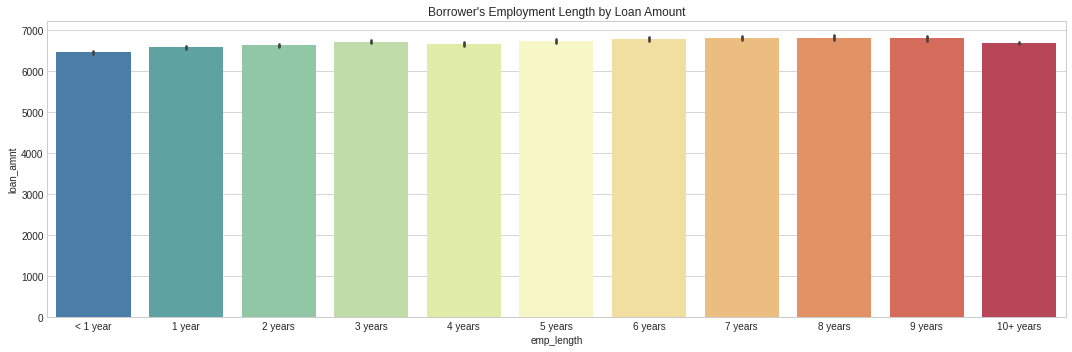

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['loan_amnt'],
             palette = 'Spectral_r',
             order = order_emplength )
plt.title("Borrower's Employment Length by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# We see that the average of loan amount each duration of employment length has a small differences
    # 10 years : $ 6695.97
    # 2 years : $ 6631.89
    # < 1 year : $ 6464.21
    # 3 years : $ 6718.21
    # 1 year : $ 6584.78

In [ ]:
pd.crosstab(index = "Average of Loan Amount", 
            columns = lendclub['emp_length'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

emp_length                   1 year    10+ years  ...      9 years     < 1 year
row_0                                             ...                          
Average of Loan Amount  6584.781796  6695.972515  ...  6806.532685  6464.212109

[1 rows x 11 columns]

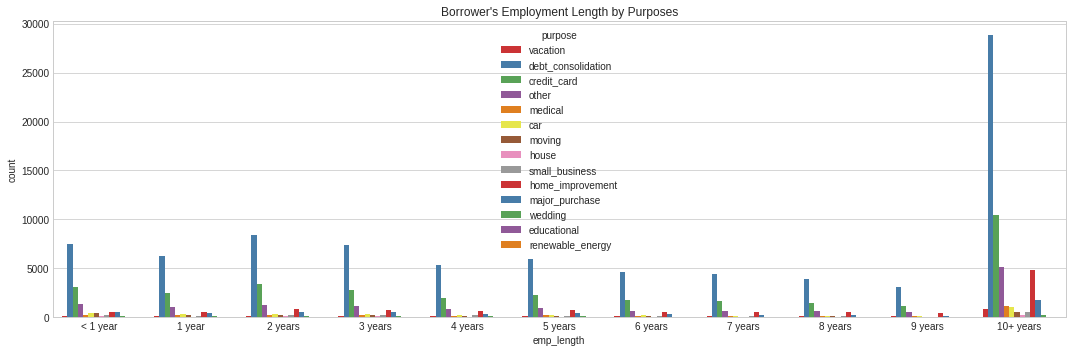

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['emp_length'], 
            hue = lendclub['purpose'],
             palette = 'Set1',
             order = order_emplength )
plt.title("Borrower's Employment Length by Purposes")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# We see that each duration of employment length has vary purposes, but
# dominated by Debt Consolidation and Refinance Credit Card. 
# The other most purposes are home improvement, major purchase, medical, car, vacation, and other.

In [ ]:
# percentage only
(pd.crosstab(index = lendclub['purpose'], 
            columns = lendclub['emp_length'],
            normalize = 'columns')*100).round(2)

emp_length          1 year  10+ years  2 years  ...  8 years  9 years  < 1 year
purpose                                         ...                            
car                   2.55       1.85     2.17  ...     2.07     1.91      2.70
credit_card          21.05      18.77    20.89  ...    19.33    19.10     20.80
debt_consolidation   51.88      51.96    52.23  ...    53.23    53.66     50.59
educational           0.23       0.06     0.18  ...     0.09     0.07      0.34
home_improvement      4.32       8.66     5.22  ...     7.21     7.24      3.99
house                 0.61       0.40     0.65  ...     0.50     0.32      0.59
major_purchase        3.34       3.13     3.66  ...     2.84     2.68      3.64
medical               1.86       2.01     1.71  ...     1.91     1.69      1.57
moving                1.93       0.91     1.50  ...     1.13     1.14      2.90
other                 8.63       9.25     8.10  ...     8.66     8.76      9.39
renewable_energy      0.09       0.12     0.10  ...     0.13     0.24      0.13
small_business        1.44       1.04     1.61  ...     1.10     0.96      1.65
vacation              1.08       1.50     1.11  ...     1.26     1.71      0.69
wedding               0.99       0.34     0.85  ...     0.52     0.53      1.01

[14 rows x 11 columns]

In [ ]:
pd.crosstab(index = lendclub['purpose'], 
            columns = lendclub['emp_length'])

emp_length          1 year  10+ years  2 years  ...  8 years  9 years  < 1 year
purpose                                         ...                            
car                    307       1027      349  ...      154      112       400
credit_card           2532      10403     3354  ...     1437     1119      3078
debt_consolidation    6241      28790     8386  ...     3958     3144      7487
educational             28         34       29  ...        7        4        51
home_improvement       520       4799      838  ...      536      424       590
house                   73        223      105  ...       37       19        87
major_purchase         402       1733      588  ...      211      157       539
medical                224       1112      275  ...      142       99       233
moving                 232        502      241  ...       84       67       429
other                 1038       5125     1301  ...      644      513      1390
renewable_energy        11         69       16  ...       10       14        19
small_business         173        575      258  ...       82       56       244
vacation               130        832      178  ...       94      100       102
wedding                119        189      137  ...       39       31       150

[14 rows x 11 columns]

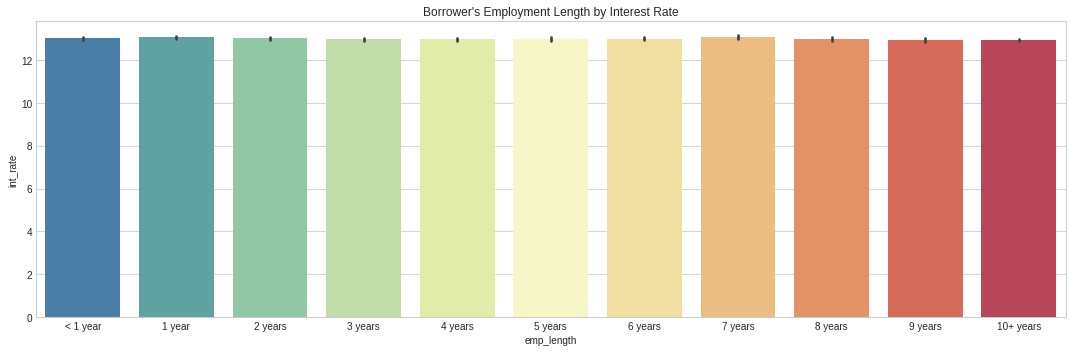

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['int_rate'],
             palette = 'Spectral_r',
             order = order_emplength )
plt.title("Borrower's Employment Length by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# interest rate by borrowers' employment length show no difference
# the average of interest rate looks same around 12%.
# But when speaking of the highest interest rate is from borrower with 1 year experience: 13.05%

# Anyway, borrowers' employment length do not affect interest rate.

In [ ]:
pd.crosstab(index = "Average of Interest Rate", 
            columns = lendclub['emp_length'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

emp_length                   1 year  10+ years  ...    9 years   < 1 year
row_0                                           ...                      
Average of Interest Rate  13.055817   12.91934  ...  12.913197  13.016647

[1 rows x 11 columns]

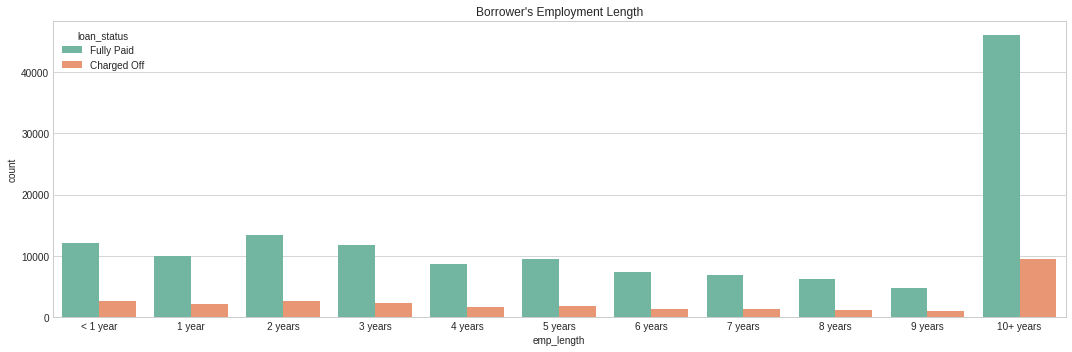

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['emp_length'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2',
             order = order_emplength )
plt.title("Borrower's Employment Length")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# most borrowers come from 10+ years experiences background, 
# but the proportion of loan status is the same for every employment length.

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['emp_length'], normalize = 'columns')*100).round(3)

emp_length   1 year  10+ years  2 years  ...  8 years  9 years  < 1 year
loan_status                              ...                            
Charged Off  17.382     17.151   16.699  ...   16.382   17.221    17.771
Fully Paid   82.618     82.849   83.301  ...   83.618   82.779    82.229

[2 rows x 11 columns]

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['emp_length'])

emp_length   1 year  10+ years  2 years  ...  8 years  9 years  < 1 year
loan_status                              ...                            
Charged Off    2091       9504     2681  ...     1218     1009      2630
Fully Paid     9939      45909    13374  ...     6217     4850     12169

[2 rows x 11 columns]

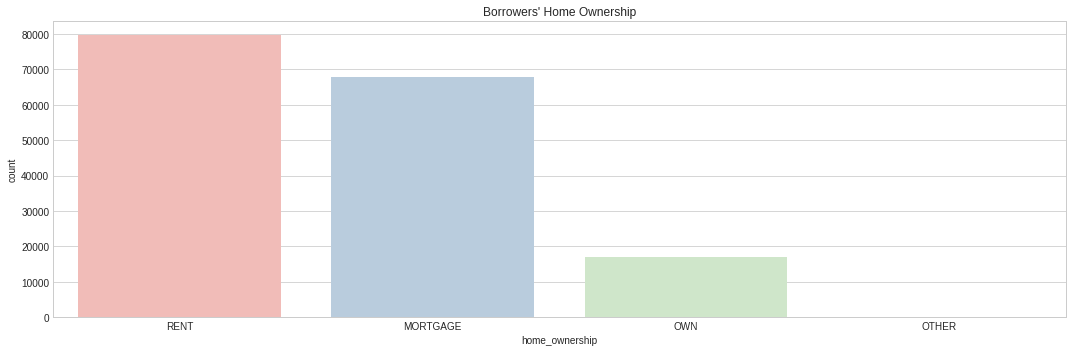

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['home_ownership'], palette = 'Pastel1')
plt.title("Borrowers' Home Ownership")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 48% borrowers' home are rent.
# 41% borrowers' home are mortgage.
# Only 10.3% borrowers are owning home.

In [ ]:
lendclub.stb.freq(['home_ownership'], cum_cols = False)

home_ownership  count    percent
0           RENT  79591  48.431577
1       MORTGAGE  67754  41.228695
2            OWN  16921  10.296525
3          OTHER     71   0.043204

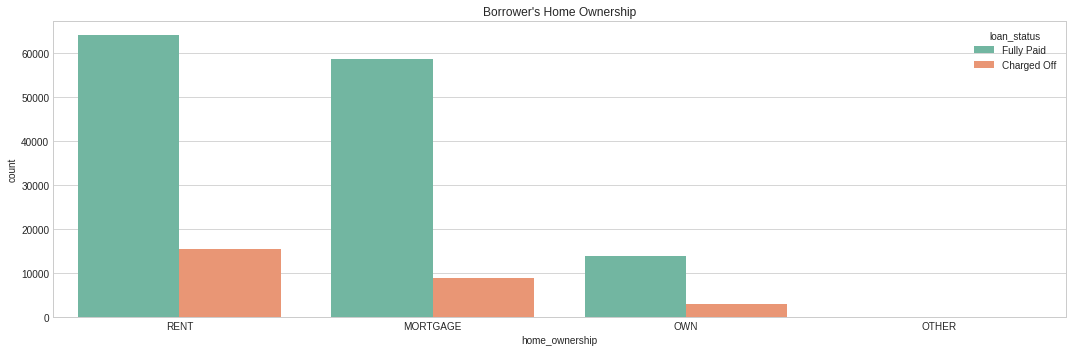

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['home_ownership'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Borrower's Home Ownership")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['home_ownership'])

home_ownership  MORTGAGE  OTHER    OWN   RENT
loan_status                                  
Charged Off         9045     10   3089  15503
Fully Paid         58709     61  13832  64088

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['home_ownership'], normalize = 'columns')*100).round(3)

home_ownership  MORTGAGE   OTHER     OWN    RENT
loan_status                                     
Charged Off        13.35  14.085  18.255  19.478
Fully Paid         86.65  85.915  81.745  80.522

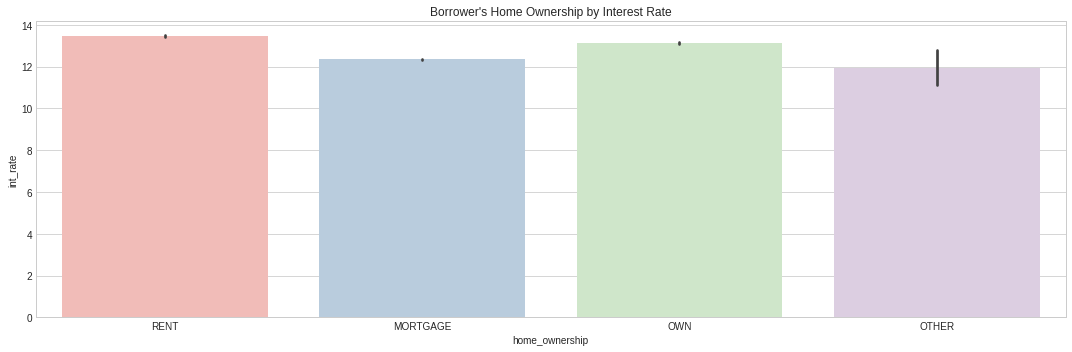

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['int_rate'],
             palette = 'Pastel1')
plt.title("Borrower's Home Ownership by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The Highest interest rate came from borrowers who own the house (13.1%) and rent the house (13.5%).

In [ ]:
lendclub.groupby('home_ownership').mean()['int_rate'].to_frame()

int_rate
home_ownership           
MORTGAGE        12.347339
OTHER           11.919155
OWN             13.139803
RENT            13.463482

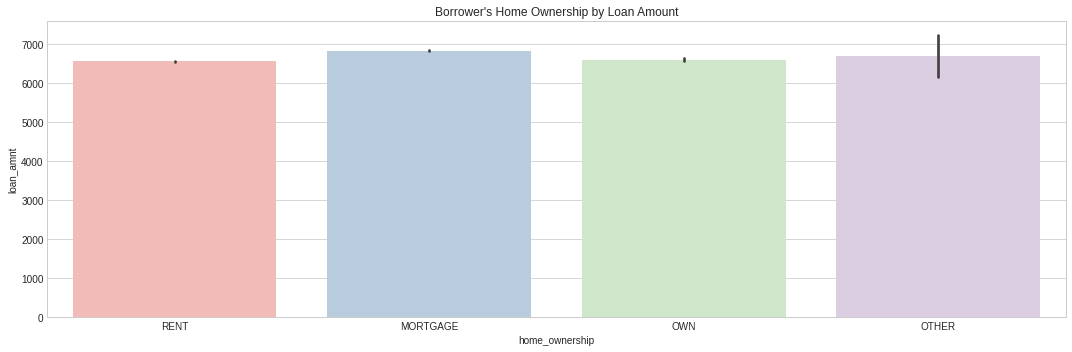

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['loan_amnt'],
             palette = 'Pastel1')
plt.title("Borrower's Home Ownership by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The highest average loan amount came from borrowers who mortgage the house, $6842.7 .

In [ ]:
lendclub.groupby('home_ownership').mean()['loan_amnt'].to_frame()

loan_amnt
home_ownership             
MORTGAGE        6842.686041
OTHER           6702.816901
OWN             6604.033450
RENT            6565.941815

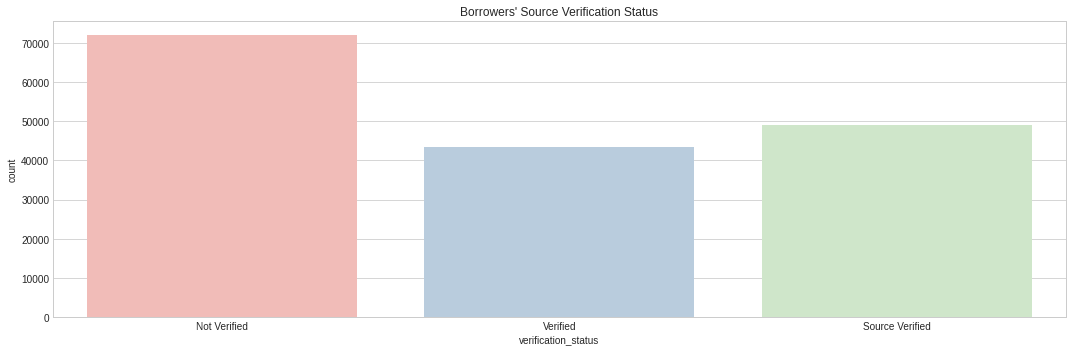

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['verification_status'], palette = 'Pastel1')
plt.title("Borrowers' Source Verification Status")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 43.7% borrowers' income verification status are not verified yet.
# 29.9% borrowers' income source was verified.
# 26.4% borrowers' income verification status are verified by LendingClub

In [ ]:
lendclub.stb.freq(['verification_status'], cum_cols = False)

verification_status  count    percent
0        Not Verified  71885  43.742432
1     Source Verified  49076  29.863025
2            Verified  43376  26.394543

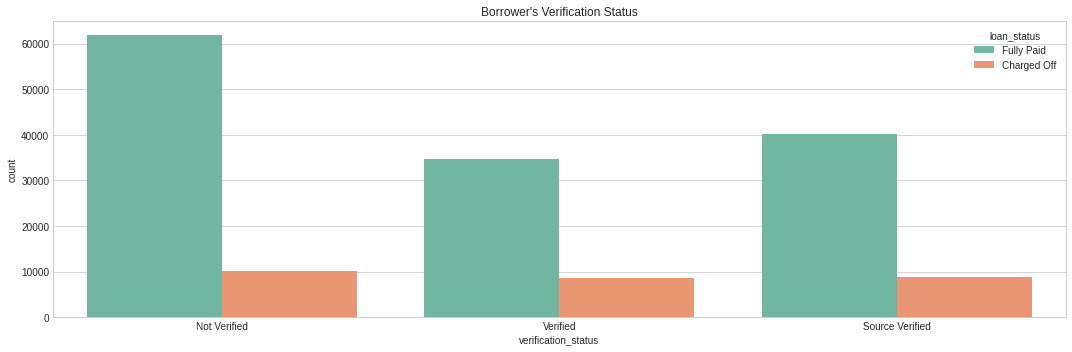

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['verification_status'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Borrower's Verification Status")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['verification_status'])

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                 10118             8907      8622
Fully Paid                  61767            40169     34754

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['verification_status'], normalize = 'columns')*100).round(3)

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                14.075           18.149    19.877
Fully Paid                 85.925           81.851    80.123

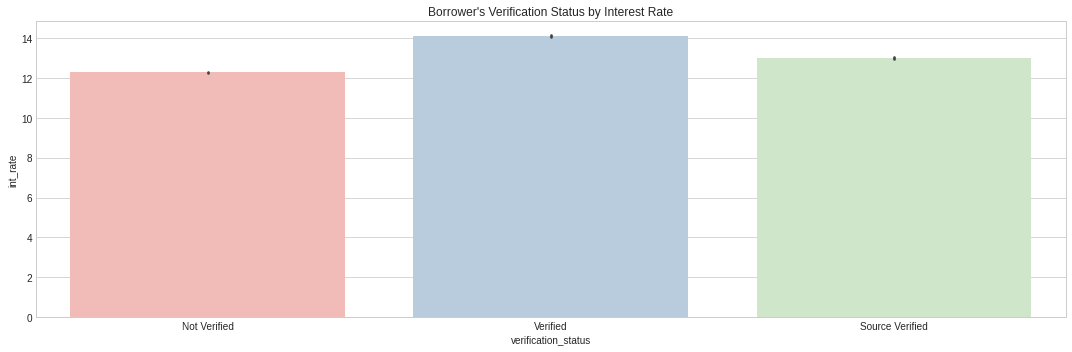

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['int_rate'],
             palette = 'Pastel1')
plt.title("Borrower's Verification Status by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The Highest interest rate came from borrowers which their income was verified by LendingClub (14.1%).

In [ ]:
lendclub.groupby('verification_status').mean()['int_rate'].to_frame()

int_rate
verification_status           
Not Verified         12.281888
Source Verified      12.994803
Verified             14.079720

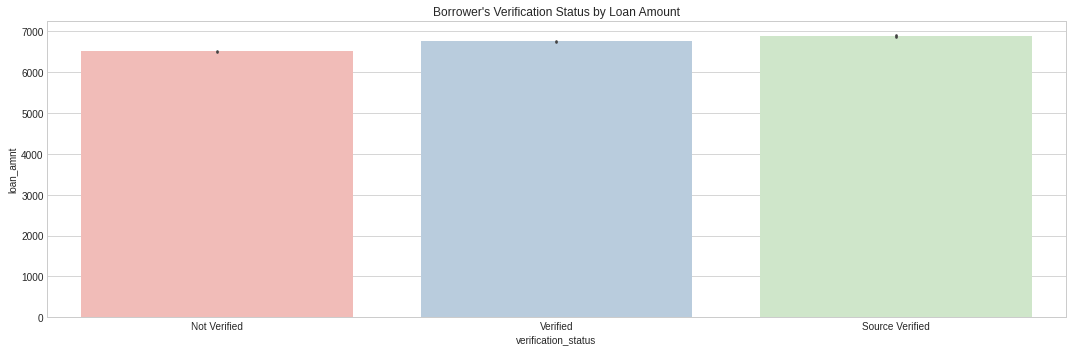

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['loan_amnt'],
             palette = 'Pastel1')
plt.title("Borrower's Verification Status by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The highest average loan amount came from borrowers' income has verified source, $6878.5 .

In [ ]:
lendclub.groupby('verification_status').mean()['loan_amnt'].to_frame()

loan_amnt
verification_status             
Not Verified         6508.953189
Source Verified      6878.510372
Verified             6754.105957

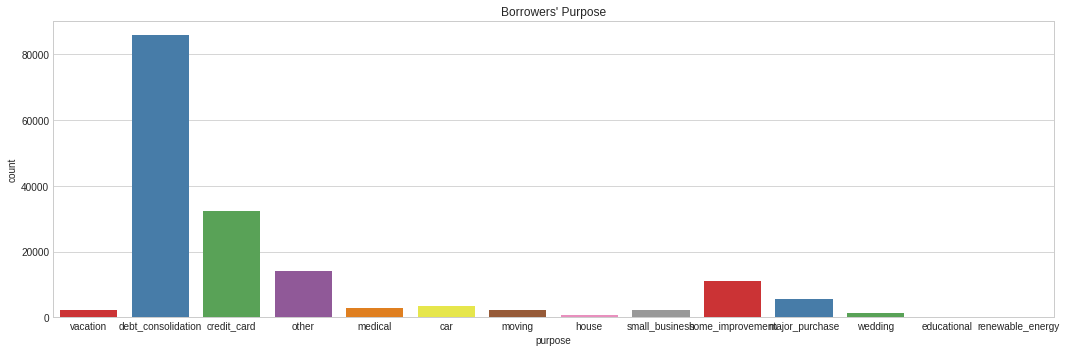

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['purpose'], palette = 'Set1')
plt.title("Borrowers' Purpose")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Top 5 Borrowers by Purposes:
    # Debt consolidation 52.2%
    # Refinance credit card 19.8%
    # other 8.7%
    # Home Improvement 6.6%
    # Major Purchase 3.3%

In [ ]:
lendclub.stb.freq(['purpose'], cum_cols = False)

purpose  count    percent
0   debt_consolidation  85754  52.181797
1          credit_card  32468  19.756963
2                other  14241   8.665730
3     home_improvement  10919   6.644274
4       major_purchase   5447   3.314531
5                  car   3577   2.176625
6              medical   2940   1.789007
7       small_business   2235   1.360010
8               moving   2217   1.349057
9             vacation   2127   1.294292
10             wedding   1159   0.705258
11               house    826   0.502626
12         educational    214   0.130220
13    renewable_energy    213   0.129612

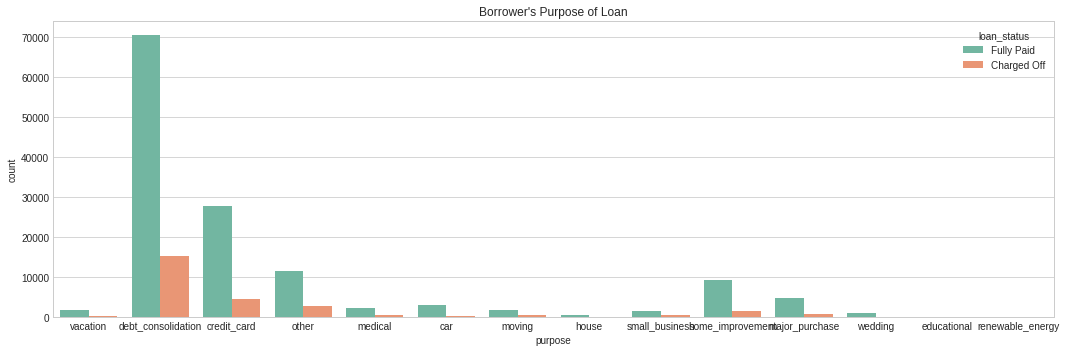

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['purpose'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Borrower's Purpose of Loan")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['purpose'])

purpose       car  credit_card  ...  vacation  wedding
loan_status                     ...                   
Charged Off   413         4662  ...       363      122
Fully Paid   3164        27806  ...      1764     1037

[2 rows x 14 columns]

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['purpose'], normalize = 'columns')*100).round(3)

purpose         car  credit_card  ...  vacation  wedding
loan_status                       ...                   
Charged Off  11.546       14.359  ...    17.066   10.526
Fully Paid   88.454       85.641  ...    82.934   89.474

[2 rows x 14 columns]

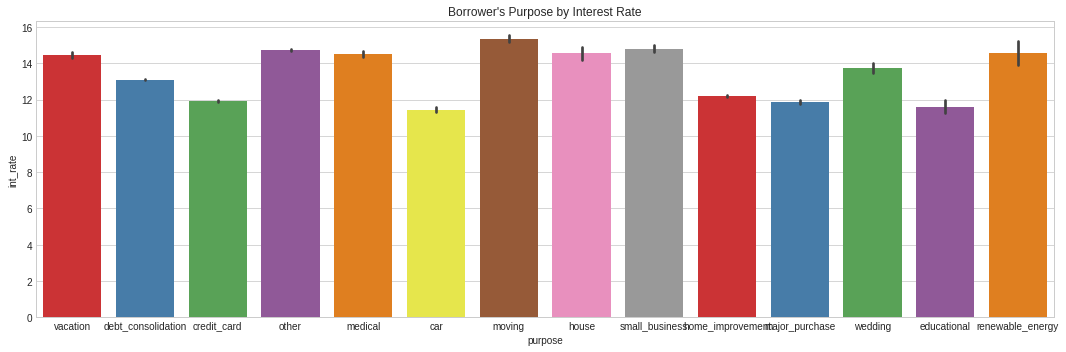

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['int_rate'],
             palette = 'Set1')
plt.title("Borrower's Purpose by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The Highest interest rate came from borrowers who have purpose to move/relocate with 15.339%.
# It's unique since borrowers with purpose to move/relocate only 1.34% of all borrowers but has the highest interest rate.

In [ ]:
lendclub.groupby('purpose').mean()['int_rate'].to_frame()

int_rate
purpose                      
car                 11.433978
credit_card         11.910924
debt_consolidation  13.085519
educational         11.594860
home_improvement    12.198302
house               14.547760
major_purchase      11.860051
medical             14.511031
moving              15.339120
other               14.730475
renewable_energy    14.575446
small_business      14.791781
vacation            14.464043
wedding             13.728835

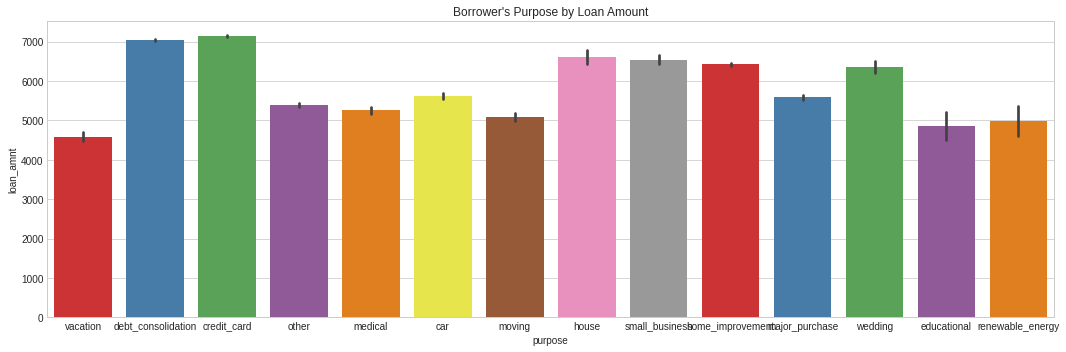

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['loan_amnt'],
             palette = 'Set1')
plt.title("Borrower's Purpose by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# The highest average loan amount came from borrowers' income has verified source, $6878.5 .

In [ ]:
lendclub.groupby('purpose').mean()['loan_amnt'].to_frame()

loan_amnt
purpose                        
car                 5614.048085
credit_card         7128.501140
debt_consolidation  7040.484117
educational         4859.579439
home_improvement    6419.704185
house               6615.163438
major_purchase      5582.091059
medical             5252.848639
moving              5080.175913
other               5381.828874
renewable_energy    4985.915493
small_business      6541.062640
vacation            4585.789845
wedding             6352.200173

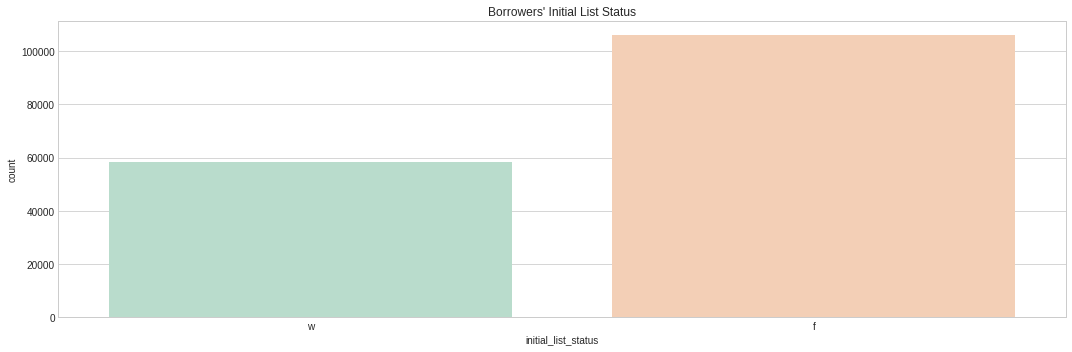

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['initial_list_status'], palette = 'Pastel2')
plt.title("Borrowers' Initial List Status")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 64% loan are fractional funded.
# 36% loan are whole funded by single lender.

In [ ]:
lendclub.stb.freq(['initial_list_status'], cum_cols = False)

initial_list_status   count   percent
0                   f  105855  64.41337
1                   w   58482  35.58663

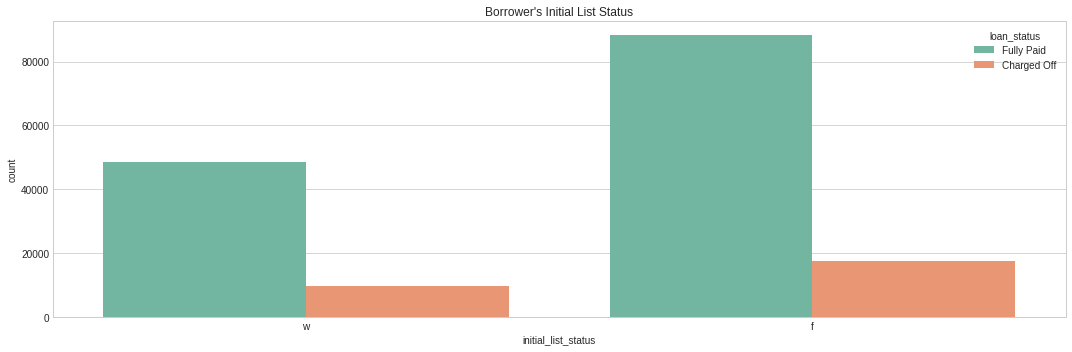

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['initial_list_status'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Borrower's Initial List Status")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['initial_list_status'])

initial_list_status      f      w
loan_status                      
Charged Off          17707   9940
Fully Paid           88148  48542

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['initial_list_status'], normalize = 'columns')*100).round(3)

initial_list_status       f       w
loan_status                        
Charged Off          16.728  16.997
Fully Paid           83.272  83.003

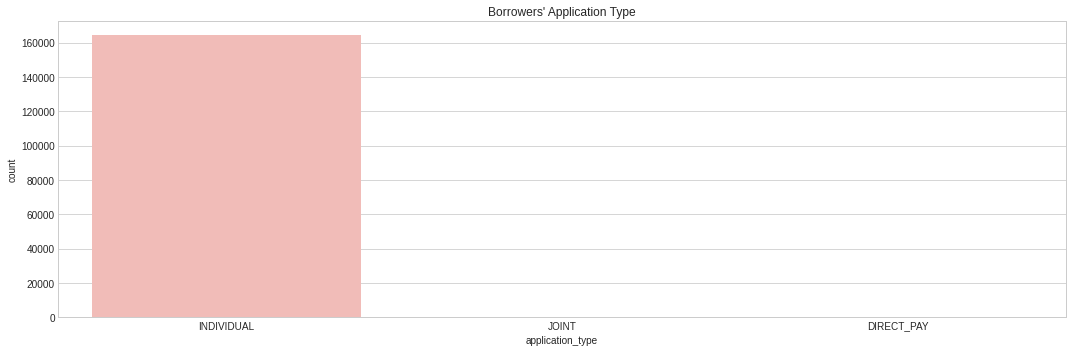

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['application_type'], palette = 'Pastel1')
plt.title("Borrowers' Application Type")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# 99.9% borrowers apply the loan individually
# only 0.08 % borrowers are apply the loan by joint with another person
# and 0.05% borrowers are apply the loan by direct pay

In [ ]:
lendclub.stb.freq(['application_type'], cum_cols = False)

application_type   count    percent
0       INDIVIDUAL  164110  99.861869
1       DIRECT_PAY     138   0.083974
2            JOINT      89   0.054157

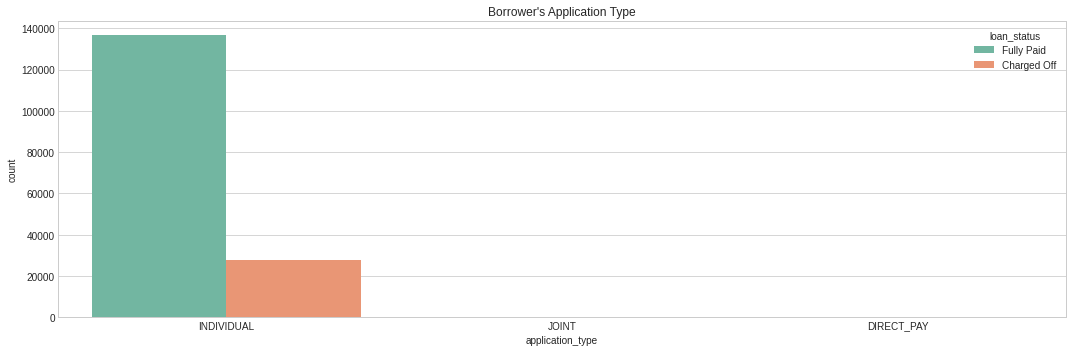

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['application_type'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Borrower's Application Type")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['application_type'])

application_type  DIRECT_PAY  INDIVIDUAL  JOINT
loan_status                                    
Charged Off               42       27589     16
Fully Paid                96      136521     73

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['application_type'], normalize = 'columns')*100).round(3)

application_type  DIRECT_PAY  INDIVIDUAL   JOINT
loan_status                                     
Charged Off           30.435      16.811  17.978
Fully Paid            69.565      83.189  82.022

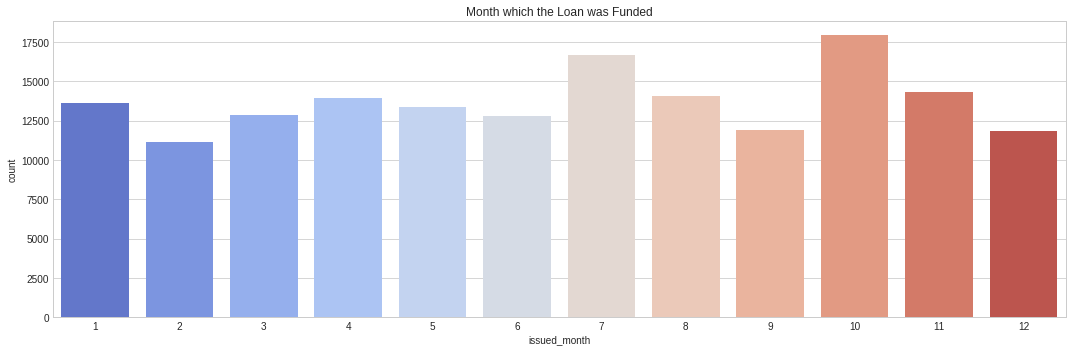

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['issued_month'], palette = 'coolwarm')
plt.title("Month which the Loan was Funded")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Along the years,
# The most loans was funded on October, 10.9%.
# The least loans was funded on February, 6.7%

In [ ]:
lendclub.stb.freq(['issued_month'], cum_cols = False)

issued_month  count    percent
0             10  17907  10.896511
1              7  16642  10.126752
2             11  14317   8.711976
3              8  14069   8.561067
4              4  13908   8.463097
5              1  13586   8.267158
6              5  13353   8.125377
7              3  12882   7.838770
8              6  12789   7.782179
9              9  11930   7.259473
10            12  11840   7.204707
11             2  11114   6.762932

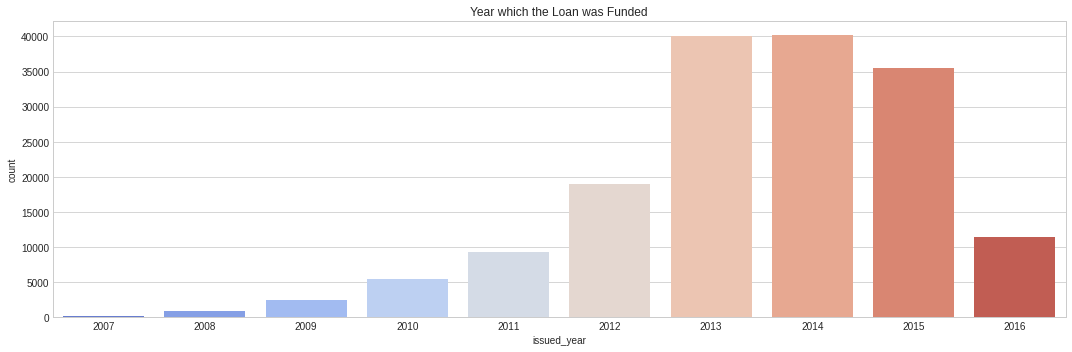

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['issued_year'], palette = 'coolwarm')
plt.title("Year which the Loan was Funded")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Along the years,
# The most loans was funded on 2014, 24.42%.
# The least loans was funded on 2007, 0.09%.

# This all make sense since 2007 is the year when LendingClub was founded.
# It takes 6-7 years for LendingClub to make it the most loans from they begin the P2P Lending.

In [ ]:
lendclub.stb.freq(['issued_year'], cum_cols = False)

issued_year  count    percent
0         2014  40128  24.418116
1         2013  40073  24.384649
2         2015  35529  21.619599
3         2012  19010  11.567693
4         2016  11419   6.948527
5         2011   9232   5.617725
6         2010   5503   3.348607
7         2009   2414   1.468933
8         2008    887   0.539745
9         2007    142   0.086408

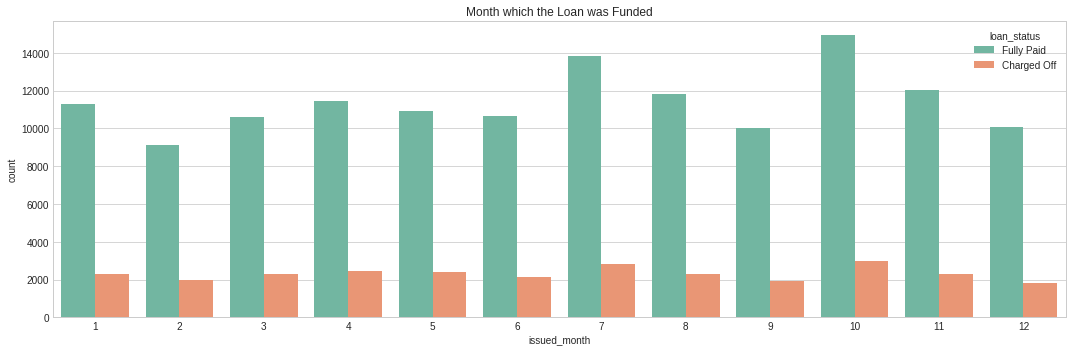

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['issued_month'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Month which the Loan was Funded")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# the majority of fully paid and charged off still the same, around 83%:17%

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['issued_month'])

issued_month     1     2      3      4   ...     9      10     11     12
loan_status                              ...                            
Charged Off    2303  1978   2283   2464  ...   1909   2995   2273   1791
Fully Paid    11283  9136  10599  11444  ...  10021  14912  12044  10049

[2 rows x 12 columns]

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['issued_month'], normalize = 'columns')*100).round(3)

issued_month      1       2       3       4   ...      9       10      11      12
loan_status                                   ...                                
Charged Off   16.951  17.797  17.722  17.716  ...  16.002  16.725  15.876  15.127
Fully Paid    83.049  82.203  82.278  82.284  ...  83.998  83.275  84.124  84.873

[2 rows x 12 columns]

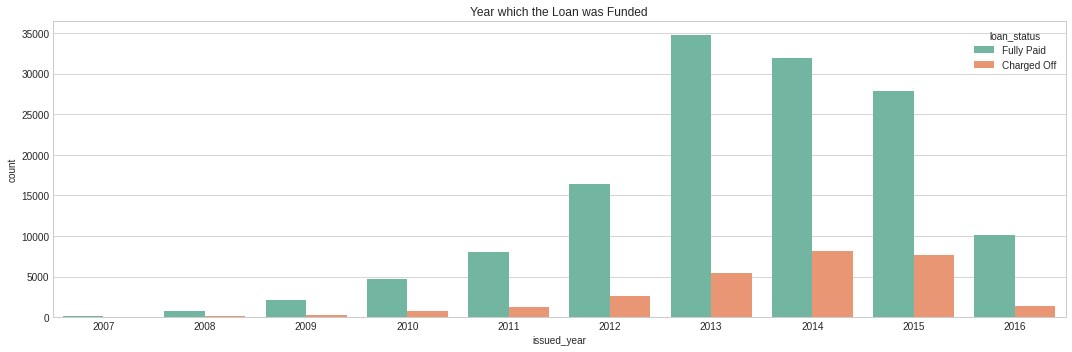

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['issued_year'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Year which the Loan was Funded")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# the majority of fully paid and charged off still the same, around 83%:17%

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['issued_year'])

issued_year  2007  2008  2009  2010  2011   2012   2013   2014   2015   2016
loan_status                                                                 
Charged Off    19   120   285   734  1242   2650   5391   8190   7673   1343
Fully Paid    123   767  2129  4769  7990  16360  34682  31938  27856  10076

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['issued_year'], normalize = 'columns')*100).round(3)

issued_year   2007    2008    2009    2010  ...    2013   2014    2015    2016
loan_status                                 ...                               
Charged Off  13.38  13.529  11.806  13.338  ...  13.453  20.41  21.596  11.761
Fully Paid   86.62  86.471  88.194  86.662  ...  86.547  79.59  78.404  88.239

[2 rows x 10 columns]

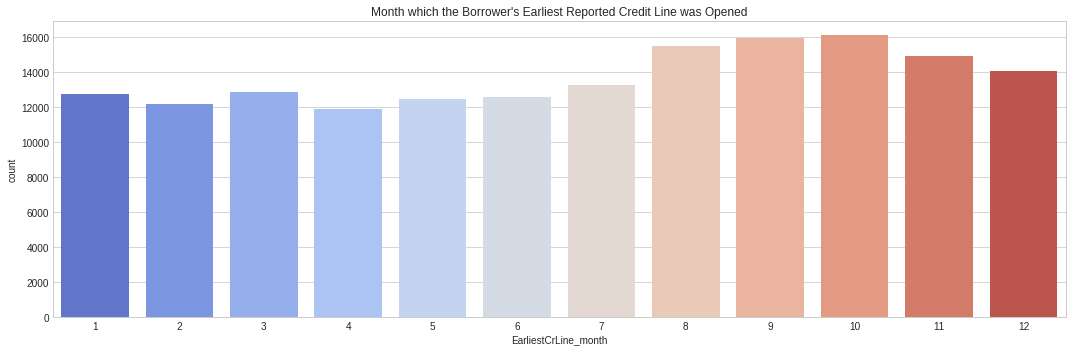

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['EarliestCrLine_month'], palette = 'coolwarm')
plt.title("Month which the Borrower's Earliest Reported Credit Line was Opened")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# For the record, most borrowers' earliest reported credit line was opened on October, 9.7%

In [ ]:
lendclub.stb.freq(['EarliestCrLine_month'], cum_cols = False)

EarliestCrLine_month  count   percent
0                     10  16073  9.780512
1                      9  15947  9.703840
2                      8  15471  9.414192
3                     11  14883  9.056390
4                     12  14076  8.565326
5                      7  13229  8.049922
6                      3  12839  7.812605
7                      1  12750  7.758448
8                      6  12542  7.631878
9                      5  12470  7.588066
10                     2  12157  7.397604
11                     4  11900  7.241218

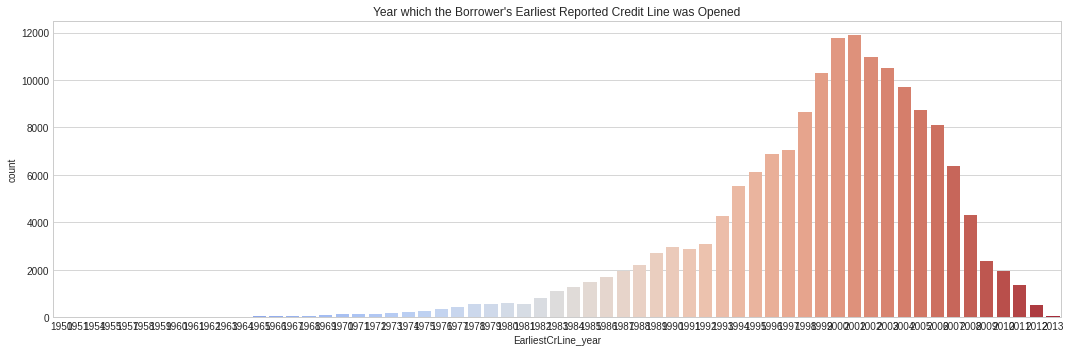

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(lendclub['EarliestCrLine_year'], palette = 'coolwarm')
plt.title("Year which the Borrower's Earliest Reported Credit Line was Opened")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# For the record, most borrowers' earliest reported credit line was opened on 2001, 7.22%

In [ ]:
lendclub.stb.freq(['EarliestCrLine_year'], cum_cols = False)

EarliestCrLine_year  count   percent
0                  2001  11876  7.226614
1                  2000  11776  7.165763
2                  2002  10974  6.677741
3                  2003  10508  6.394178
4                  1999  10310  6.273694
..                  ...    ...       ...
56                 1955      5  0.003043
57                 1957      2  0.001217
58                 1954      2  0.001217
59                 1950      2  0.001217
60                 1951      1  0.000609

[61 rows x 3 columns]

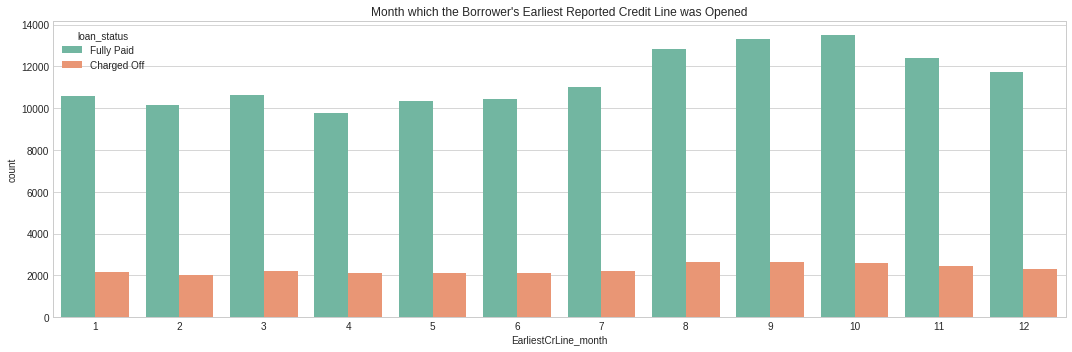

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['EarliestCrLine_month'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Month which the Borrower's Earliest Reported Credit Line was Opened")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['EarliestCrLine_month'])

EarliestCrLine_month     1      2      3     4   ...     9      10     11     12
loan_status                                      ...                            
Charged Off            2180   2017   2201  2135  ...   2656   2597   2464   2326
Fully Paid            10570  10140  10638  9765  ...  13291  13476  12419  11750

[2 rows x 12 columns]

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['EarliestCrLine_month'], normalize = 'columns')*100).round(3)

EarliestCrLine_month      1       2       3   ...      10      11      12
loan_status                                   ...                        
Charged Off           17.098  16.591  17.143  ...  16.158  16.556  16.525
Fully Paid            82.902  83.409  82.857  ...  83.842  83.444  83.475

[2 rows x 12 columns]

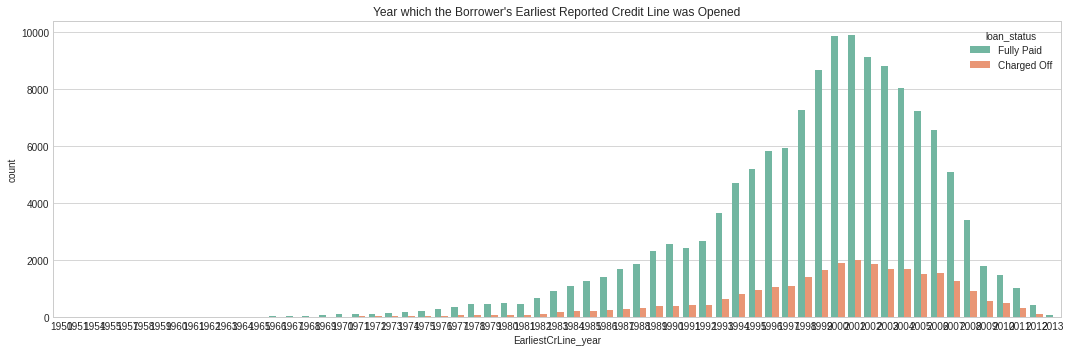

In [ ]:
plt.figure(figsize = (15,5))

sns.countplot(x = lendclub['EarliestCrLine_year'], 
             hue = lendclub['loan_status'], 
             palette = 'Set2')
plt.title("Year which the Borrower's Earliest Reported Credit Line was Opened")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Around 1999-2003 Borrower's Earliest Reported Credit Line was Opened

In [ ]:
pd.crosstab(lendclub['loan_status'], lendclub['EarliestCrLine_year'])

EarliestCrLine_year  1950  1951  1954  1955  1957  ...  2009  2010  2011  2012  2013
loan_status                                        ...                              
Charged Off             0     1     0     2     1  ...   570   486   334   117     4
Fully Paid              2     0     2     3     1  ...  1814  1477  1012   416    67

[2 rows x 61 columns]

In [ ]:
(pd.crosstab(lendclub['loan_status'], lendclub['EarliestCrLine_year'], normalize = 'columns')*100).round(3)

EarliestCrLine_year   1950   1951   1954  1955  ...    2010    2011    2012    2013
loan_status                                     ...                                
Charged Off            0.0  100.0    0.0  40.0  ...  24.758  24.814  21.951   5.634
Fully Paid           100.0    0.0  100.0  60.0  ...  75.242  75.186  78.049  94.366

[2 rows x 61 columns]

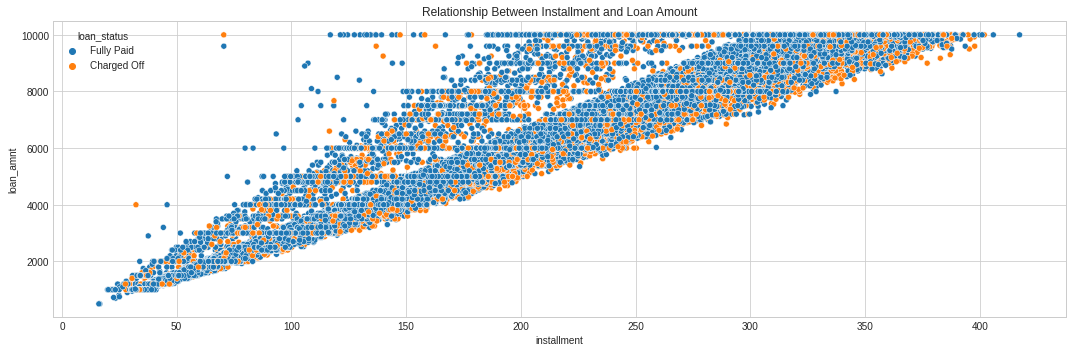

In [ ]:
plt.figure(figsize = (15,5))

sns.scatterplot(y = lendclub['loan_amnt'], 
                x = lendclub['installment'],
                hue = lendclub['loan_status'])
             
plt.title("Relationship Between Installment and Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# higher the installment, higher the loan amount

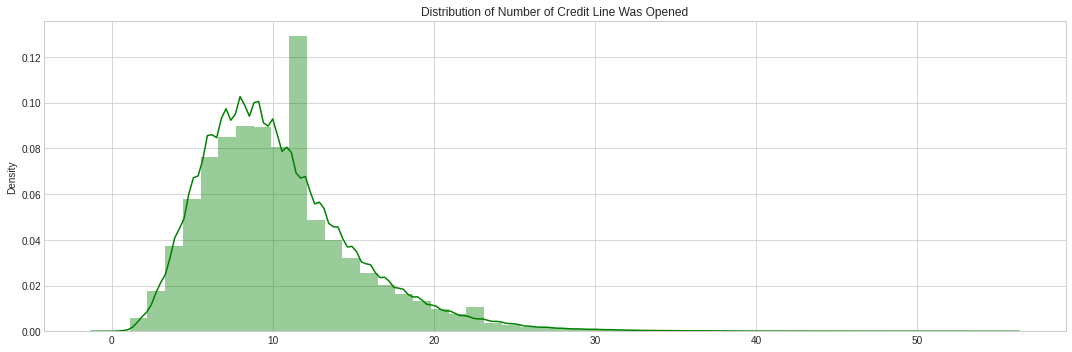

In [ ]:
plt.figure(figsize = (15,5))

sns.distplot(x = lendclub['open_acc'], 
              color = 'Green')
             
plt.title("Distribution of Number of Credit Line Was Opened")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


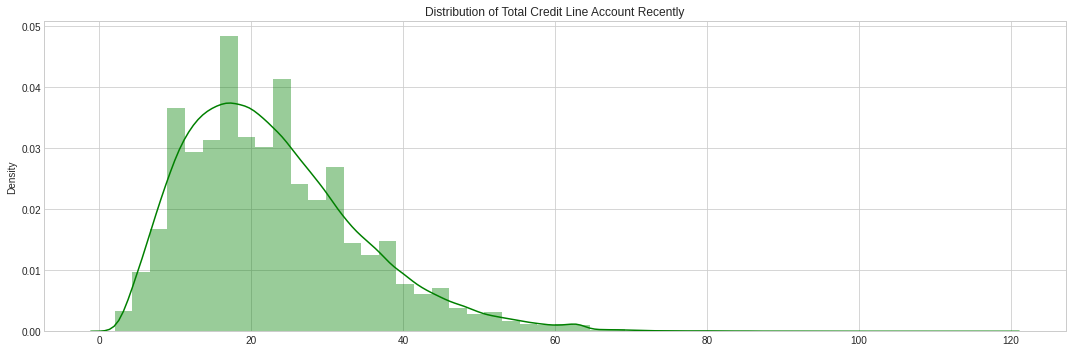

In [ ]:
plt.figure(figsize = (15,5))

sns.distplot(x = lendclub['total_acc'], 
              color = 'Green')
             
plt.title("Distribution of Total Credit Line Account Recently")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


## Loan Status

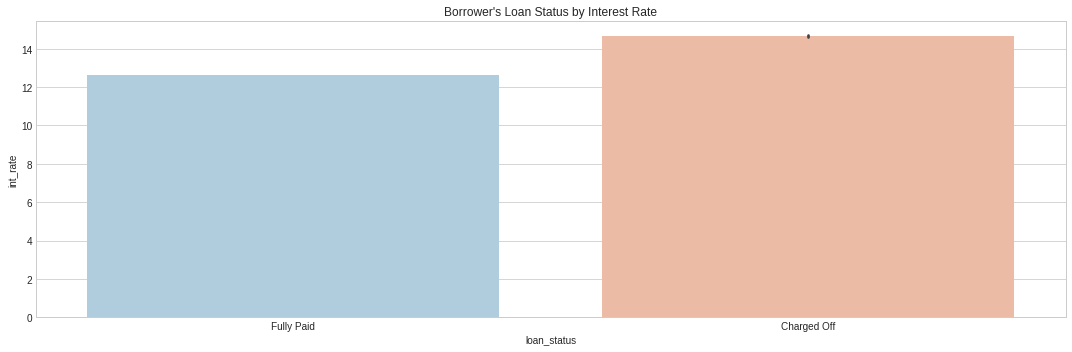

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['int_rate'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Loan Status by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has interest rate 14.6%
# while in fully paid borrowers is 12.6%
# Interest Rate in charged off borrowers is higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Interest Rate',
            columns = lendclub['loan_status'],
            values = lendclub['int_rate'],
            aggfunc = 'mean')

loan_status               Charged Off  Fully Paid
row_0                                            
Average of Interest Rate    14.640732   12.631254

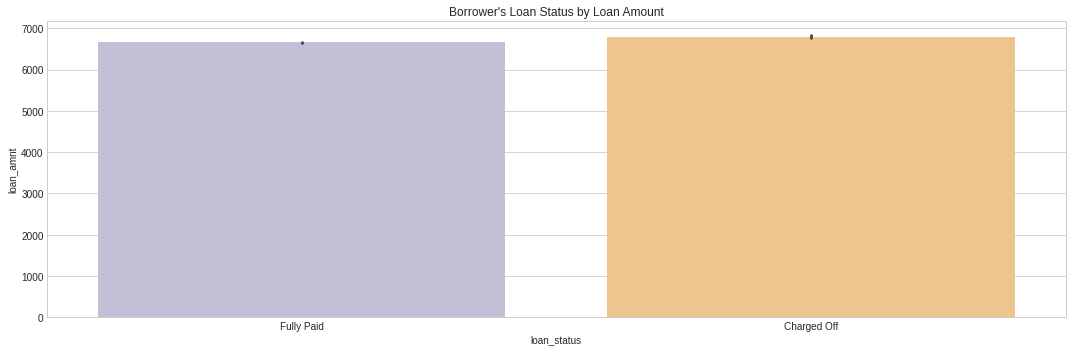

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['loan_amnt'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Loan Status by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average loan amount $6795
# while in fully paid borrowers is $6661
# Loan Amount in charged off borrowers is slightly higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Loan Amount',
            columns = lendclub['loan_status'],
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

loan_status             Charged Off   Fully Paid
row_0                                           
Average of Loan Amount  6795.169458  6661.540164

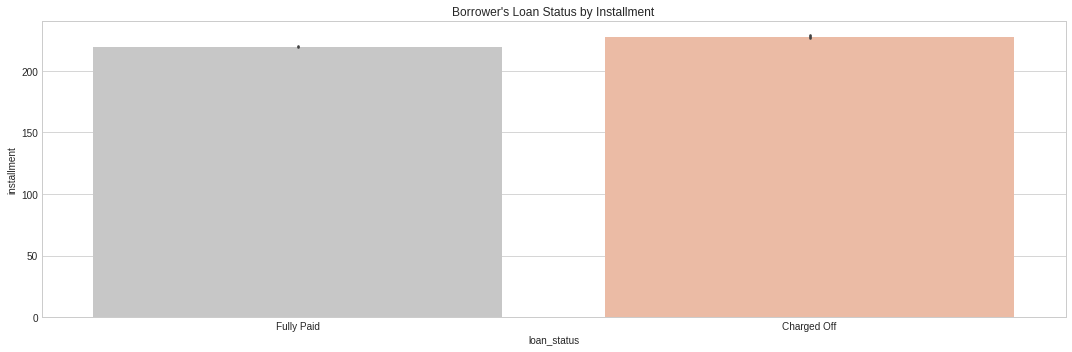

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['installment'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Loan Status by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average installment $227
# while in fully paid borrowers is $219
# Installment in charged off borrowers is slightly higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Installment',
            columns = lendclub['loan_status'],
            values = lendclub['installment'],
            aggfunc = 'mean')

loan_status             Charged Off  Fully Paid
row_0                                          
Average of Installment   227.680107  219.682975

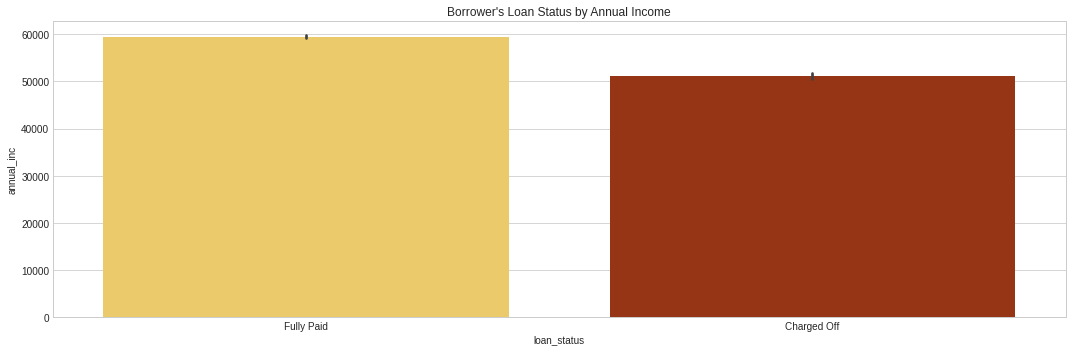

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['annual_inc'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Loan Status by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see that borrowers who complete their loan have average of annual income $59,473,
# while the borrowers who being charged off have average of annual income $51,051.

In [ ]:
pd.crosstab(index = "Average of Annual Income", 
             columns = lendclub['loan_status'], 
             values = lendclub['annual_inc'],
             aggfunc = 'mean')

loan_status                Charged Off    Fully Paid
row_0                                               
Average of Annual Income  51051.064027  59473.114119

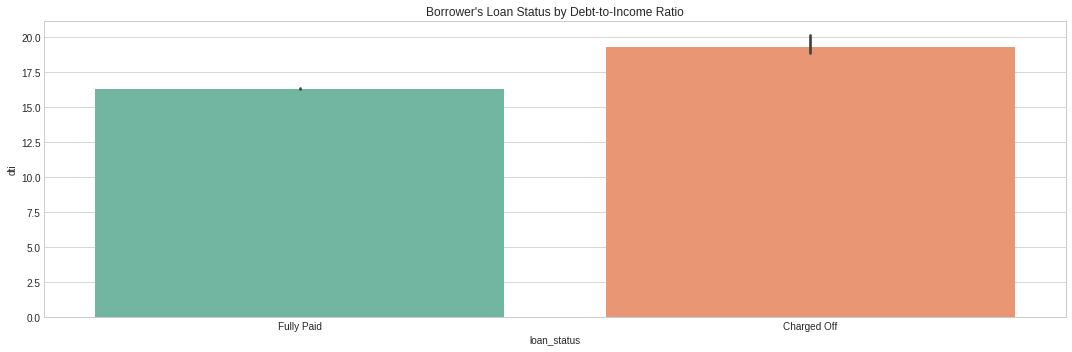

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['dti'],
            palette = 'Set2')
             
plt.title("Borrower's Loan Status by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average debt-to-income ratio 19.3
# while in fully paid borrowers is 16.3
# Debt-to-income ratio in charged off borrowers is higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Debt-to-Income Ratio',
            columns = lendclub['loan_status'],
            values = lendclub['dti'],
            aggfunc = 'mean')

loan_status                      Charged Off  Fully Paid
row_0                                                   
Average of Debt-to-Income Ratio    19.305847   16.333995

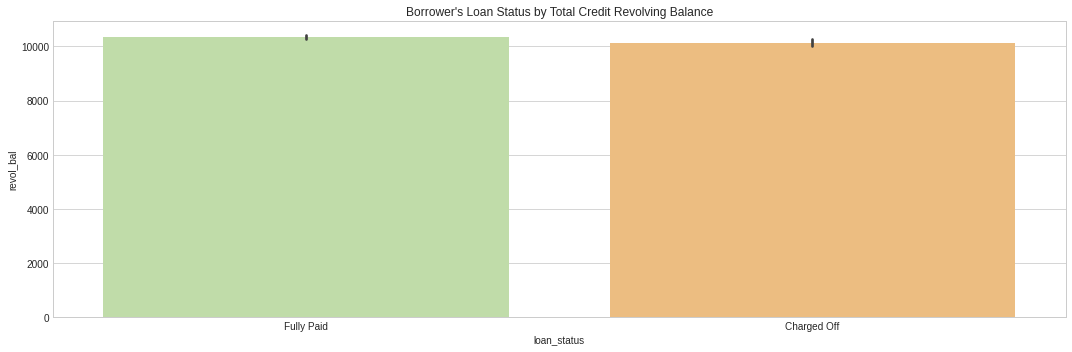

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['revol_bal'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Loan Status by Total Credit Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average revolving balance 10,333
# while in fully paid borrowers is 10,136
# Revolving Balance in fully paid borrowers is higher than charged off borrowers.

In [ ]:
pd.crosstab(index = 'Average of Total Credit Revolving Balance',
            columns = lendclub['loan_status'],
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

loan_status                                 Charged Off    Fully Paid
row_0                                                                
Average of Total Credit Revolving Balance  10136.890693  10333.128195

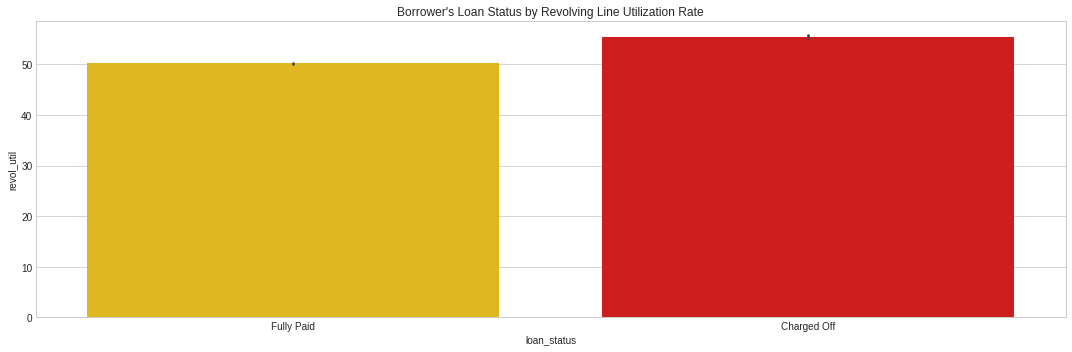

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['revol_util'],
            palette = 'hot_r')
             
plt.title("Borrower's Loan Status by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average revolving utilization rate 55.4
# while in fully paid borrowers is 50.2
# Revolving utilization rate in charged-off borrowers is higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Revolving Utilization',
            columns = lendclub['loan_status'],
            values = lendclub['revol_util'],
            aggfunc = 'mean')

loan_status                       Charged Off  Fully Paid
row_0                                                    
Average of Revolving Utilization     55.44766   50.216327

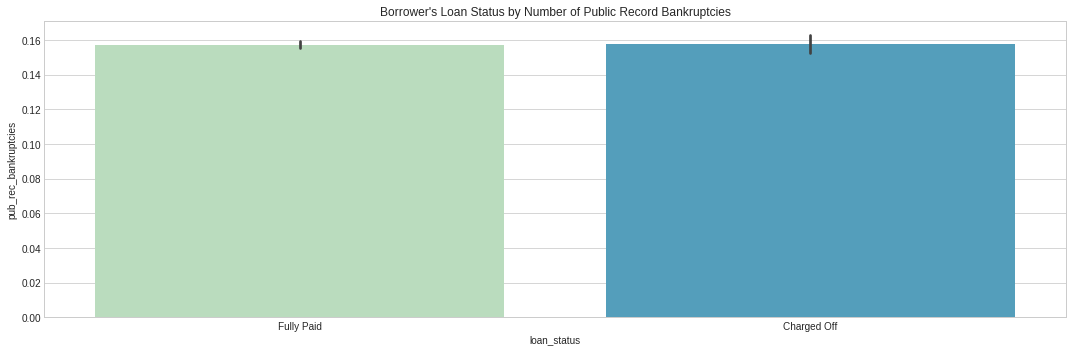

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['pub_rec_bankruptcies'],
            palette = 'GnBu')
             
plt.title("Borrower's Loan Status by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average number of public record bankruptcies 0.157
# while in fully paid borrowers is 0.157
# Number of public record bankruptcies in charged-off borrowers is slightly higher than fully paid borrowers.

In [ ]:
pd.crosstab(index = 'Average of Public Record of Bankruptcies',
            columns = lendclub['loan_status'],
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

loan_status                               Charged Off  Fully Paid
row_0                                                            
Average of Public Record of Bankruptcies     0.157666    0.157385

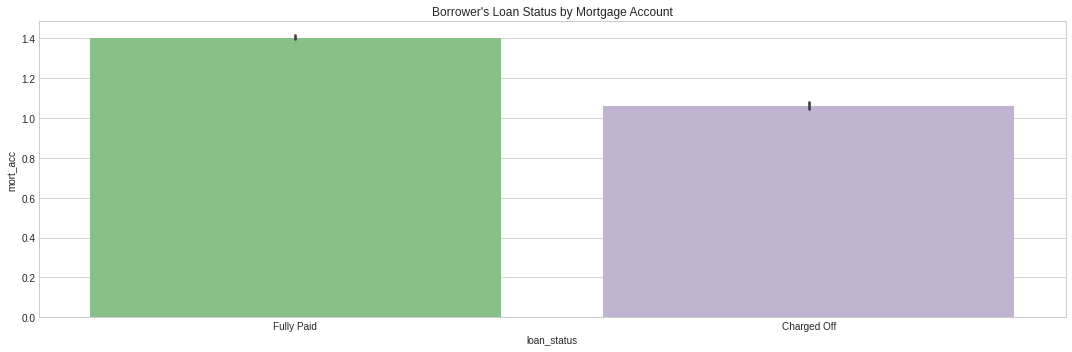

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['loan_status'], 
            y = lendclub['mort_acc'],
            palette = 'Accent')
             
plt.title("Borrower's Loan Status by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# charged off borrowers has average number of mortgage account 1.06
# while in fully paid borrowers is 1.40
# Number of mortgage account in fully paid borrowers is higher than charged-off borrowers.

In [ ]:
pd.crosstab(index = 'Average of Mortgage Accounts',
            columns = lendclub['loan_status'],
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

loan_status                   Charged Off  Fully Paid
row_0                                                
Average of Mortgage Accounts     1.062502    1.404126

## Term

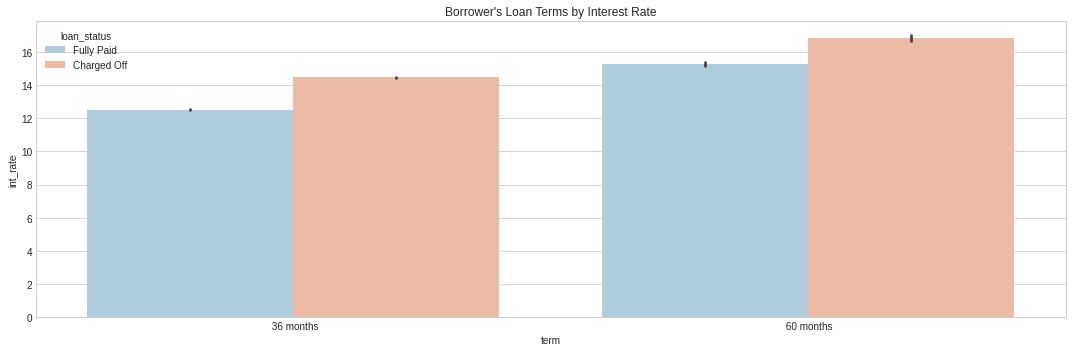

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Loan Terms by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see both terms dominated by charged off borrowers

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off   14.468227   16.823422
Fully Paid    12.528141   15.282582

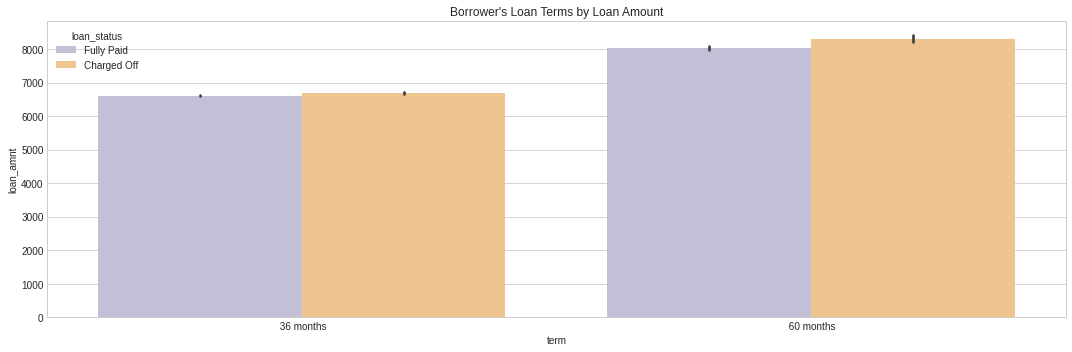

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Loan Terms by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see both terms is slightly dominated by charged off borrowers

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

term           36 months    60 months
loan_status                          
Charged Off  6675.683983  8307.000000
Fully Paid   6608.201721  8033.027164

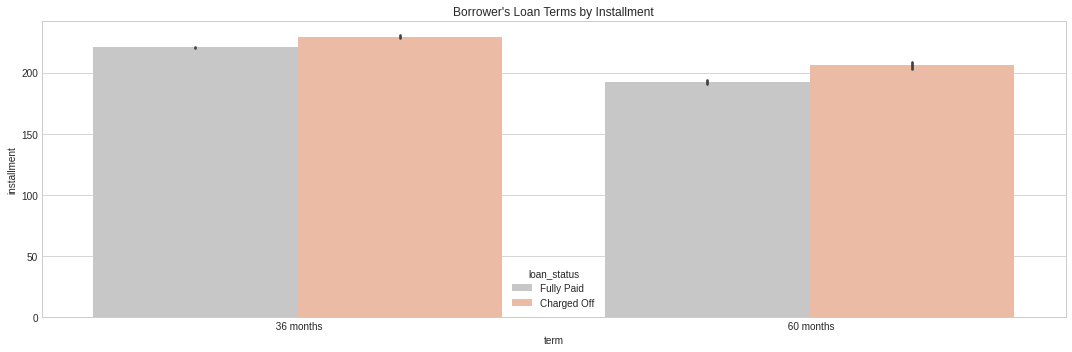

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Loan Terms by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see both terms dominated by charged off borrowers

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off  229.377524  206.202963
Fully Paid   220.737013  192.580577

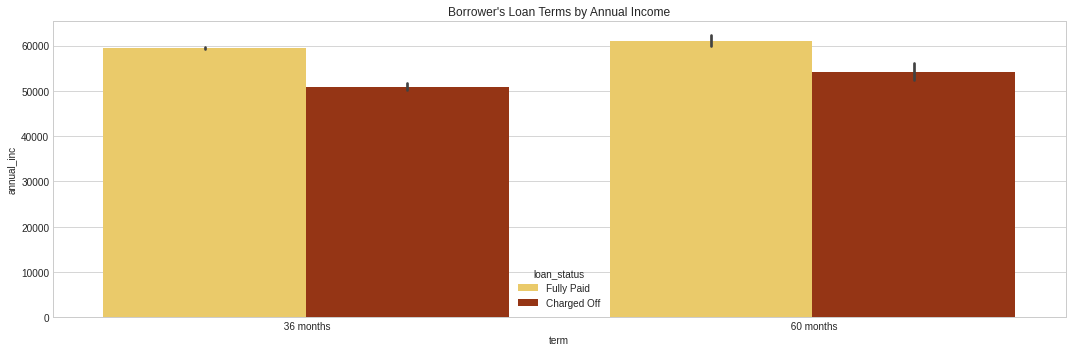

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Loan Terms by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see both terms dominated by fully paid borrowers

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

term            36 months     60 months
loan_status                            
Charged Off  50807.598872  54131.589556
Fully Paid   59411.215073  61064.719193

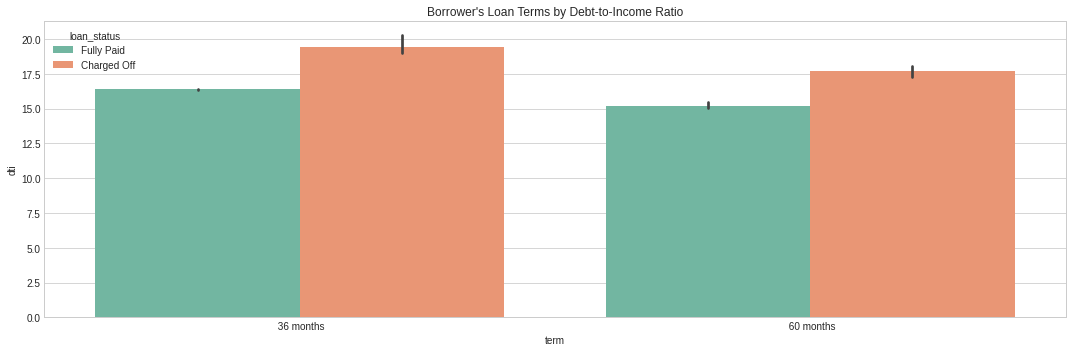

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Loan Terms by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see both terms dominated by charged off borrowers

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off   19.435645   17.663536
Fully Paid    16.377648   15.211542

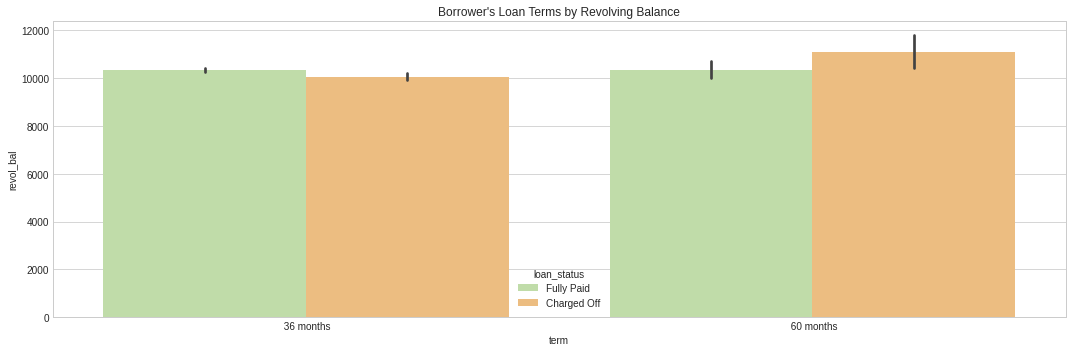

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Loan Terms by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# we see borrowers who borrow with 60 months of term loan has higher rate of being charged off

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

term            36 months     60 months
loan_status                            
Charged Off  10060.236711  11106.781235
Fully Paid   10332.694884  10344.269885

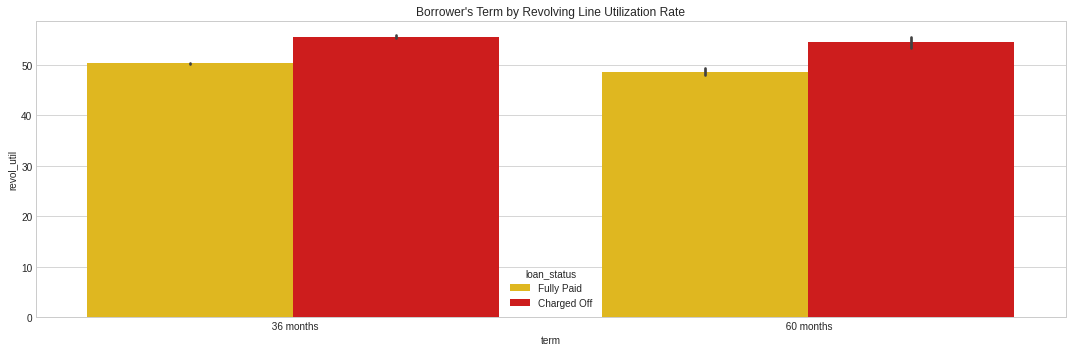

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Term by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off   55.523225   54.491552
Fully Paid    50.276262   48.675215

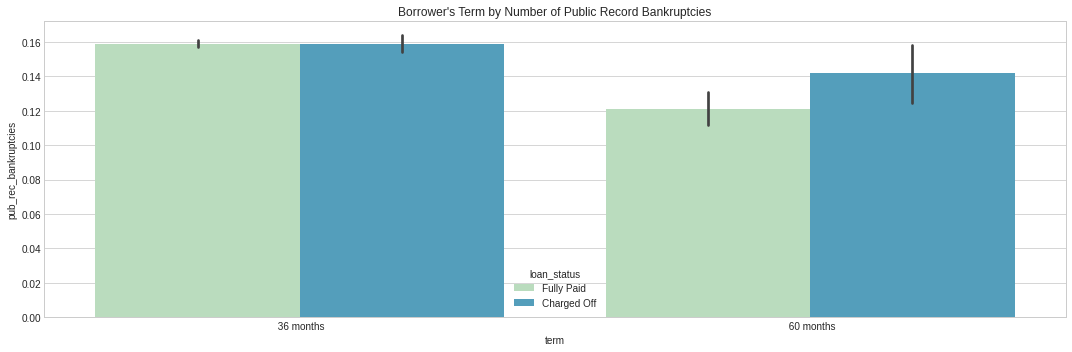

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Term by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off    0.158926    0.141728
Fully Paid     0.158794    0.121165

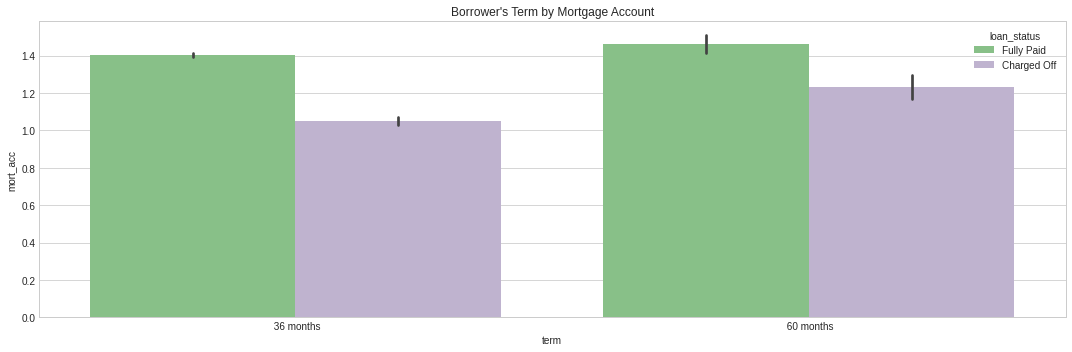

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['term'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Term by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['term'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

term          36 months   60 months
loan_status                        
Charged Off    1.049098    1.232099
Fully Paid     1.401914    1.461012

## Initial List Status

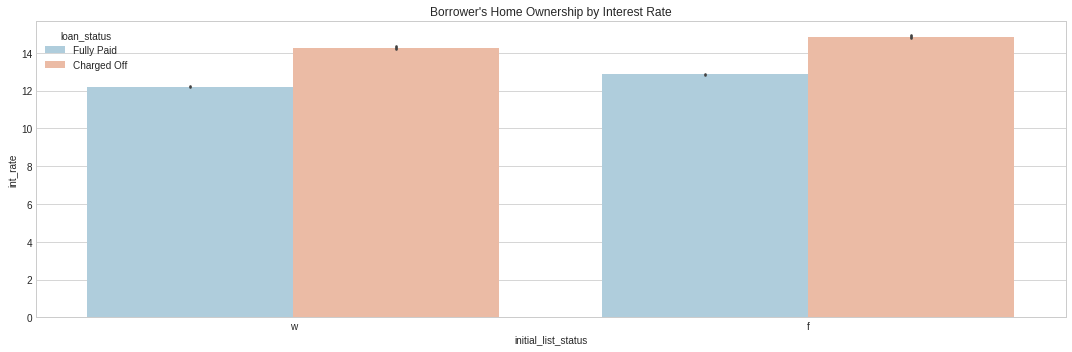

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Home Ownership by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

initial_list_status          f          w
loan_status                              
Charged Off          14.857829  14.254000
Fully Paid           12.869317  12.198953

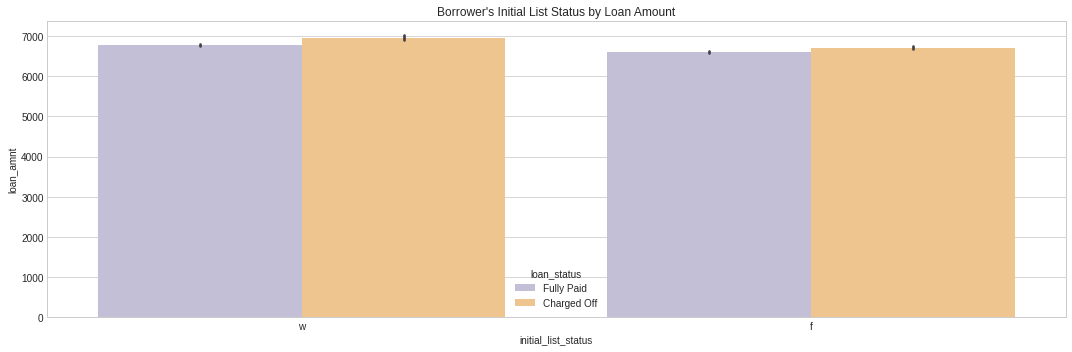

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Initial List Status by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

initial_list_status            f            w
loan_status                                  
Charged Off          6702.496188  6960.256539
Fully Paid           6601.107512  6771.280541

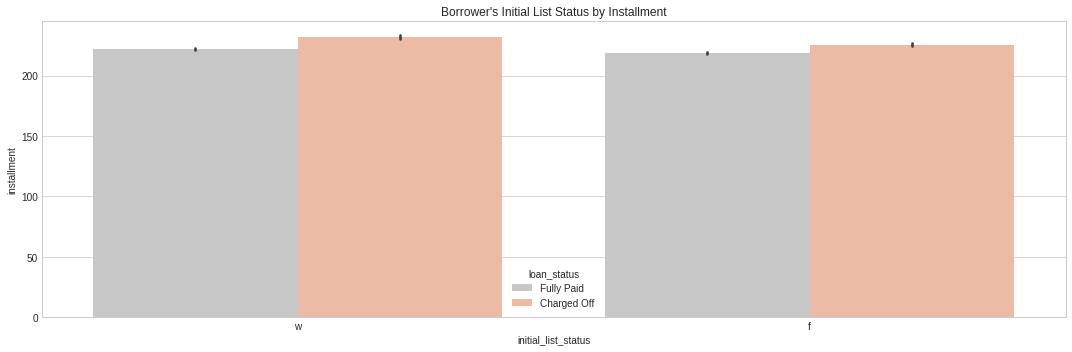

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Initial List Status by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

initial_list_status           f           w
loan_status                                
Charged Off          225.541298  231.490156
Fully Paid           218.468045  221.889182

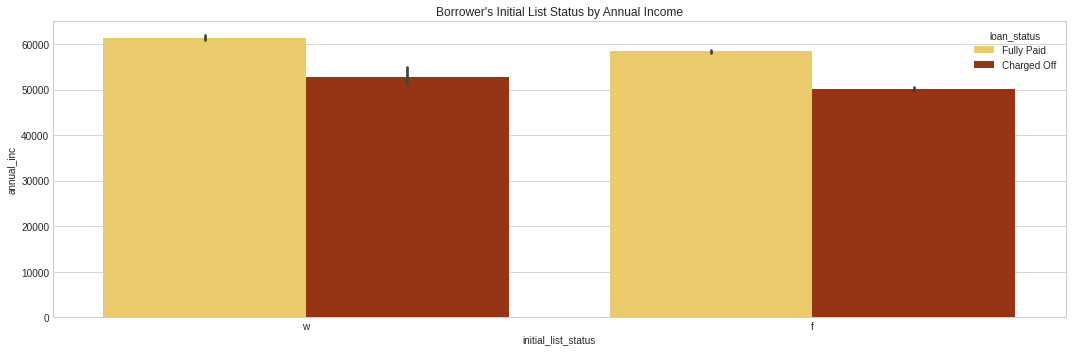

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Initial List Status by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

initial_list_status             f             w
loan_status                                    
Charged Off          50131.182714  52689.729863
Fully Paid           58401.197238  61419.620839

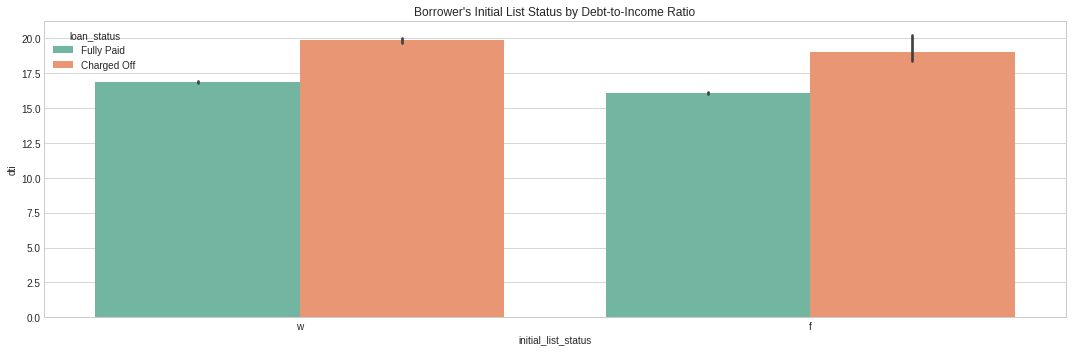

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Initial List Status by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

initial_list_status          f          w
loan_status                              
Charged Off          19.004596  19.842492
Fully Paid           16.058929  16.833490

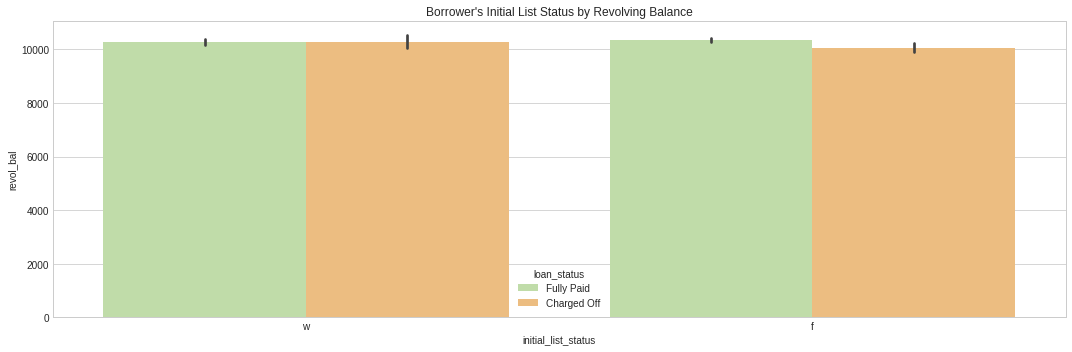

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Initial List Status by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

initial_list_status             f             w
loan_status                                    
Charged Off          10061.598182  10271.015895
Fully Paid           10357.279121  10289.272238

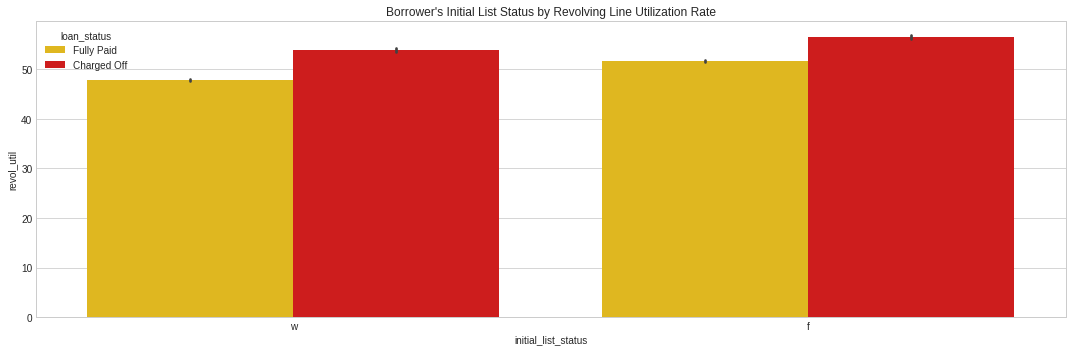

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Initial List Status by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

initial_list_status          f          w
loan_status                              
Charged Off          56.374100  53.797311
Fully Paid           51.575539  47.748118

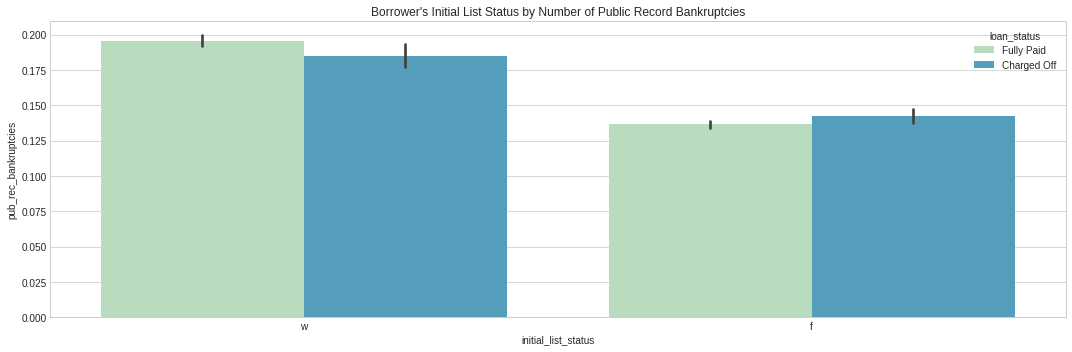

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Initial List Status by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

initial_list_status         f         w
loan_status                            
Charged Off          0.142317  0.185010
Fully Paid           0.136384  0.195521

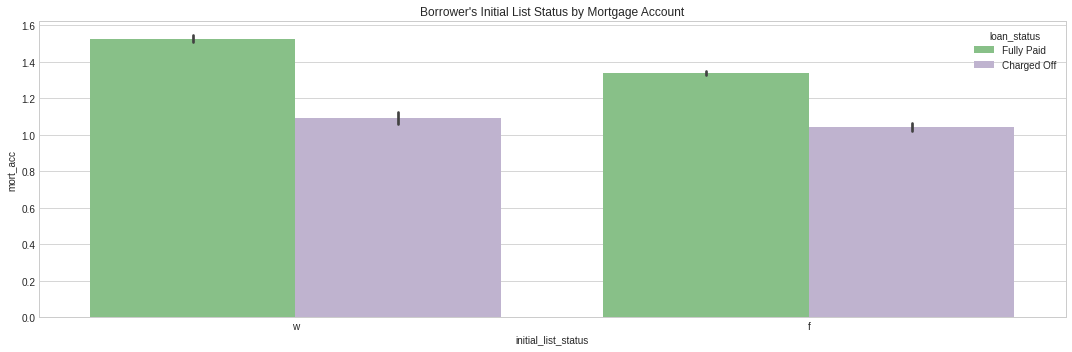

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['initial_list_status'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Initial List Status by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['initial_list_status'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

initial_list_status         f        w
loan_status                           
Charged Off          1.045236  1.09326
Fully Paid           1.336230  1.52742

## Application Type

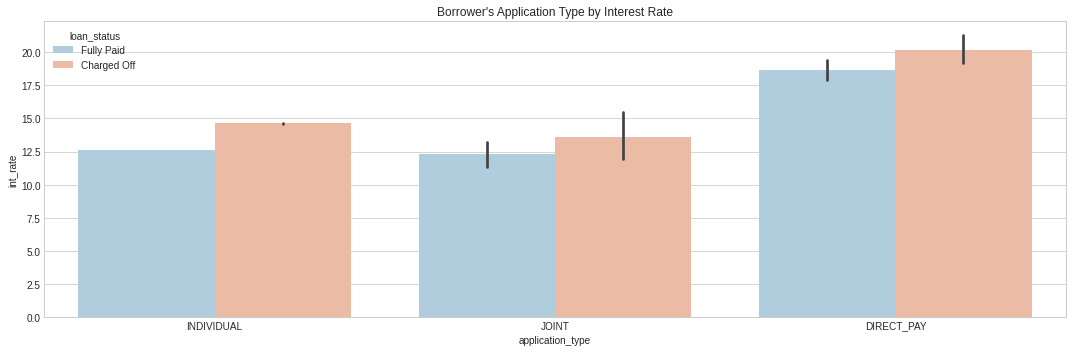

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Application Type by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL     JOINT
loan_status                                       
Charged Off        20.165476   14.632928  13.59500
Fully Paid         18.642500   12.627193  12.32137

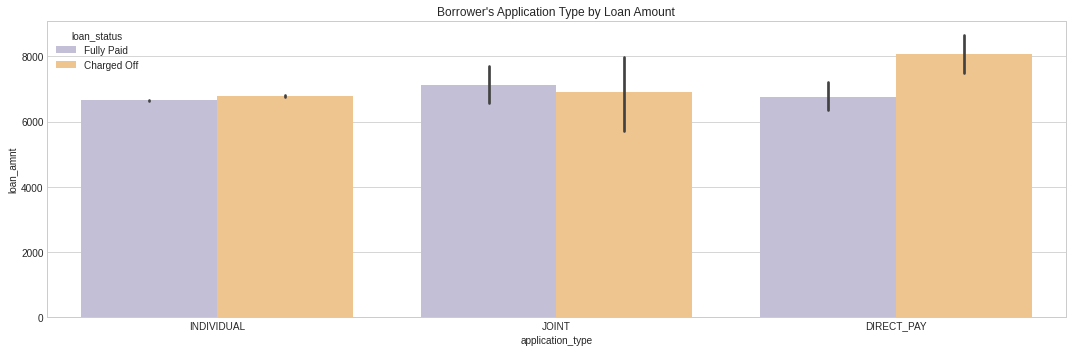

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Application Type by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

application_type   DIRECT_PAY   INDIVIDUAL        JOINT
loan_status                                            
Charged Off       8086.309524  6793.144913  6896.875000
Fully Paid        6764.322917  6661.212561  7139.041096

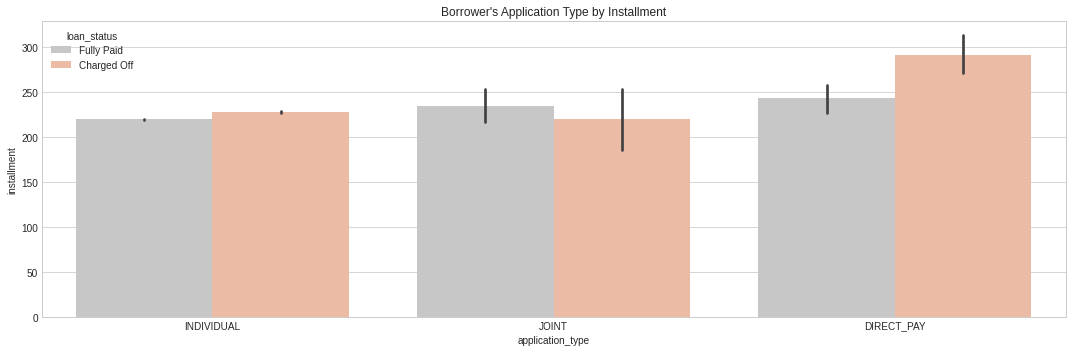

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Application Type by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL       JOINT
loan_status                                         
Charged Off       291.009048  227.588234  219.858750
Fully Paid        243.262187  219.658306  234.809863

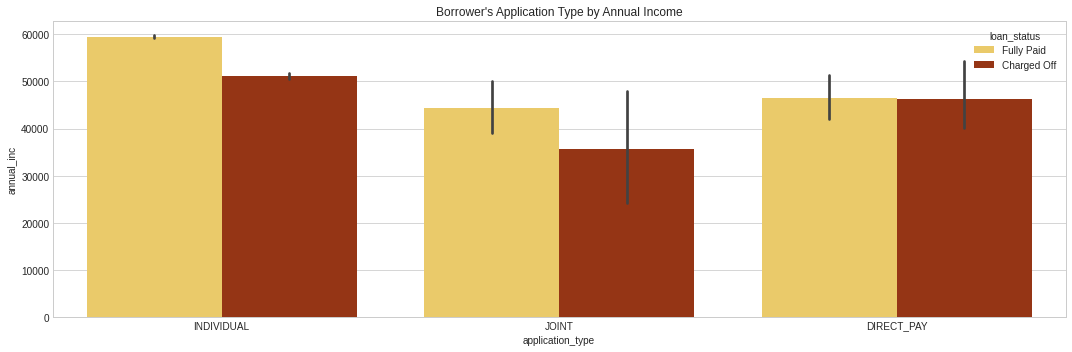

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Application Type by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

application_type    DIRECT_PAY    INDIVIDUAL      JOINT
loan_status                                            
Charged Off       46337.142857  51067.098749  35776.235
Fully Paid        46585.910417  59490.287361  44304.120

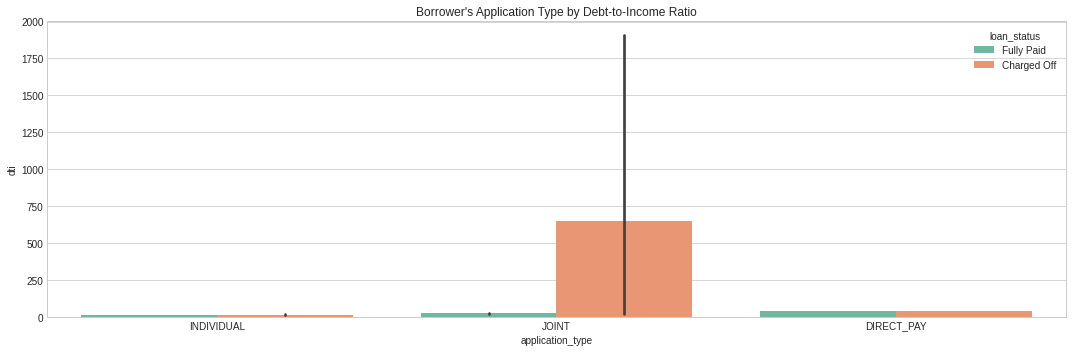

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Application Type by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL       JOINT
loan_status                                         
Charged Off        43.281905   18.900964  654.513750
Fully Paid         42.765104   16.309216   27.915205

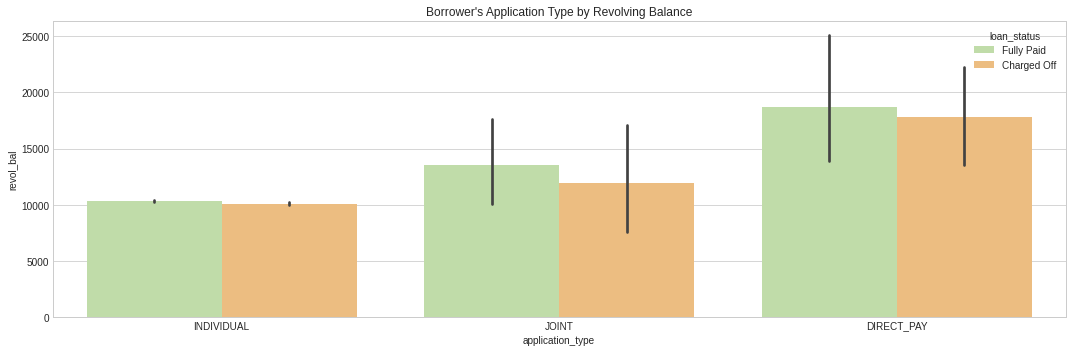

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Application Type by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

application_type    DIRECT_PAY    INDIVIDUAL         JOINT
loan_status                                               
Charged Off       17853.095238  10124.116532  11908.500000
Fully Paid        18678.552083  10325.536240  13556.424658

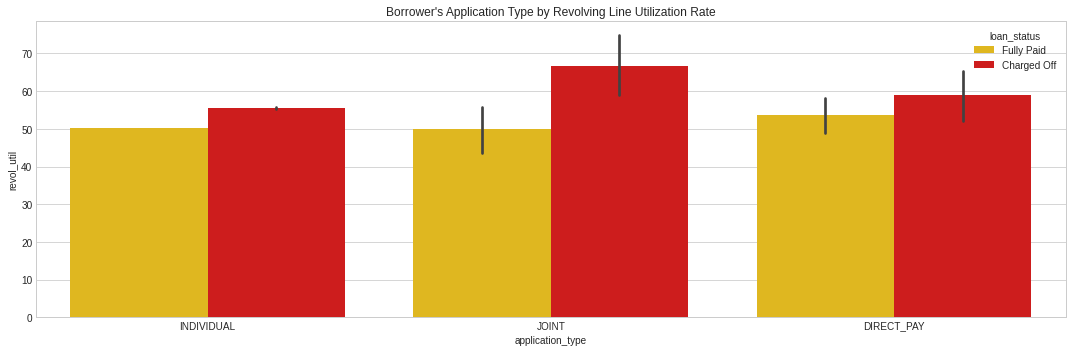

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Application Type by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL      JOINT
loan_status                                        
Charged Off        59.019048   55.435734  66.637500
Fully Paid         53.738542   50.214059  49.826027

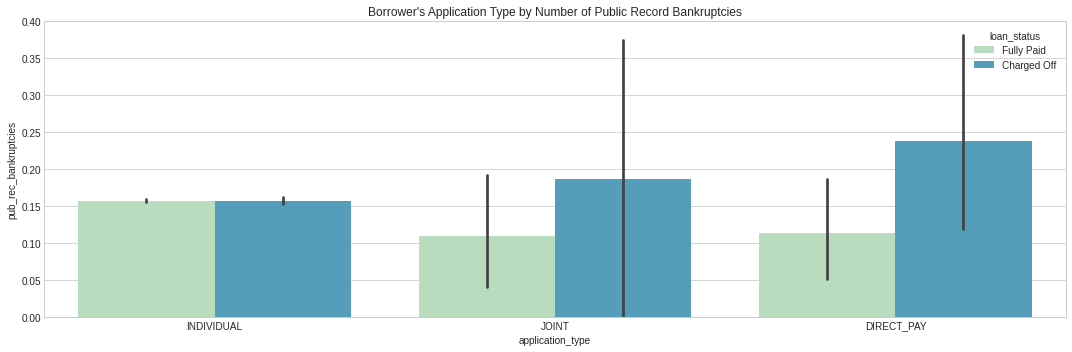

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Application Type by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL     JOINT
loan_status                                       
Charged Off         0.238095    0.157527  0.187500
Fully Paid          0.114583    0.157441  0.109589

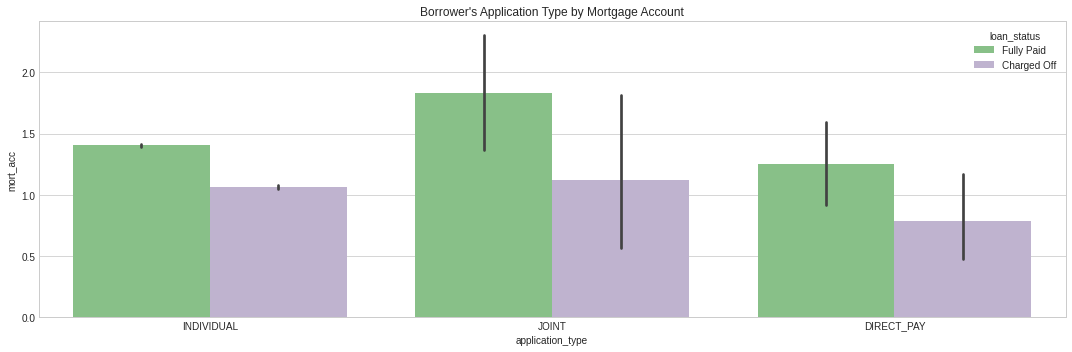

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['application_type'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Application Type by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['application_type'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

application_type  DIRECT_PAY  INDIVIDUAL     JOINT
loan_status                                       
Charged Off         0.785714    1.062887  1.125000
Fully Paid          1.250000    1.404004  1.835616

## Purpose

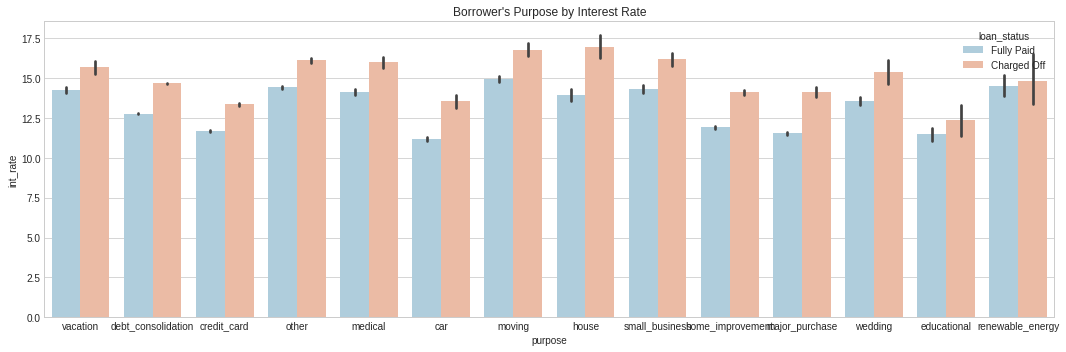

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Purpose by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# But we have to notice that most purposes are dominated by charged of borrowers eventhough it has higher interest rate
# than the borrowers who complete their loan. The risk is here.

# notice that every charged off borrower has the higher interest rate comparing to the borrower who pay in full

In [ ]:
(pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean',
             normalize = 'columns')*100).round(3)

purpose         car  credit_card  ...  vacation  wedding
loan_status                       ...                   
Charged Off  54.845       53.358  ...    52.405   53.191
Fully Paid   45.155       46.642  ...    47.595   46.809

[2 rows x 14 columns]

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean')             

purpose            car  credit_card  ...  vacation    wedding
loan_status                          ...                     
Charged Off  13.551671    13.349846  ...  15.65595  15.379836
Fully Paid   11.157554    11.669672  ...  14.21877  13.534600

[2 rows x 14 columns]

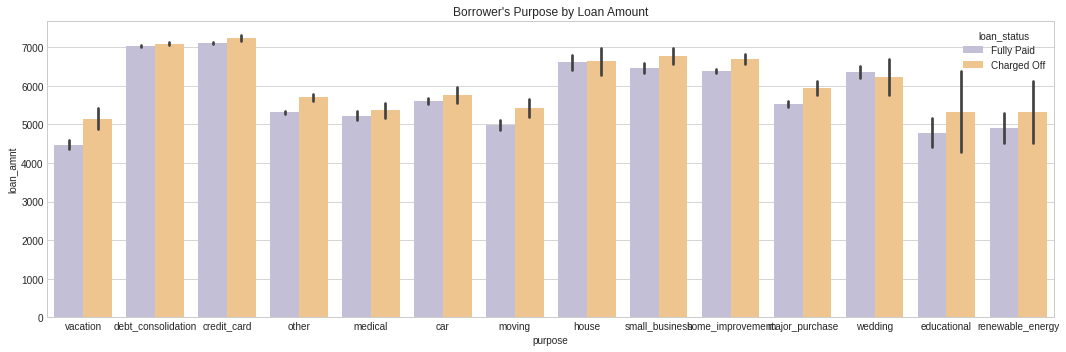

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Purpose by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()



In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['loan_amnt'],
             aggfunc = 'mean')             

purpose              car  credit_card  ...     vacation      wedding
loan_status                            ...                          
Charged Off  5753.510896  7244.830545  ...  5147.038567  6233.196721
Fully Paid   5595.843869  7108.997159  ...  4470.294785  6366.200579

[2 rows x 14 columns]

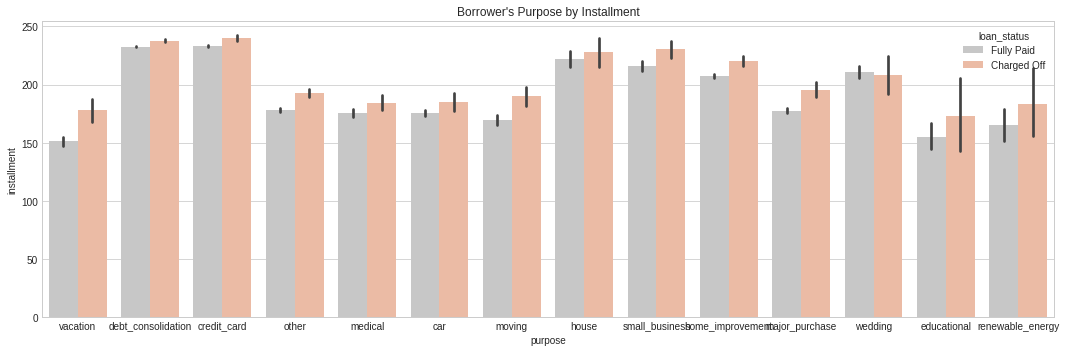

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Purpose by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['installment'],
             aggfunc = 'mean')             

purpose             car  credit_card  ...    vacation     wedding
loan_status                           ...                        
Charged Off  184.882857   240.043812  ...  177.732534  207.866066
Fully Paid   175.142882   232.843983  ...  151.444507  211.052768

[2 rows x 14 columns]

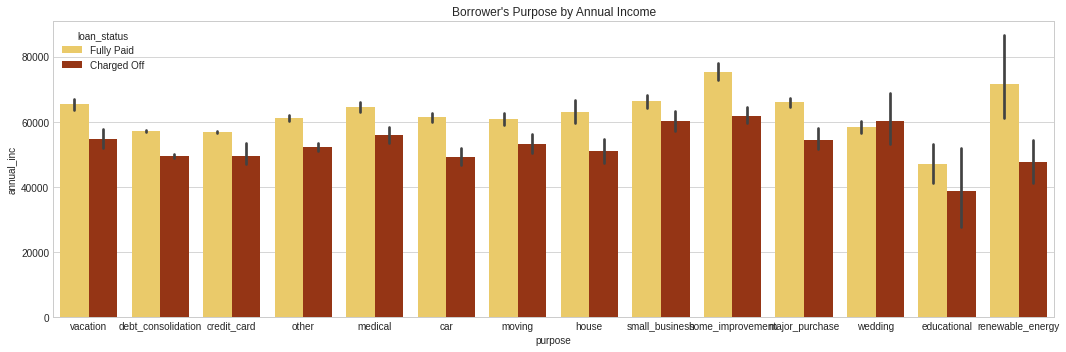

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Purpose by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['annual_inc'],
             aggfunc = 'mean')             

purpose               car   credit_card  ...      vacation       wedding
loan_status                              ...                            
Charged Off  49254.586731  49409.199751  ...  54815.874601  60241.254098
Fully Paid   61301.658951  56861.560697  ...  65289.757319  58418.520231

[2 rows x 14 columns]

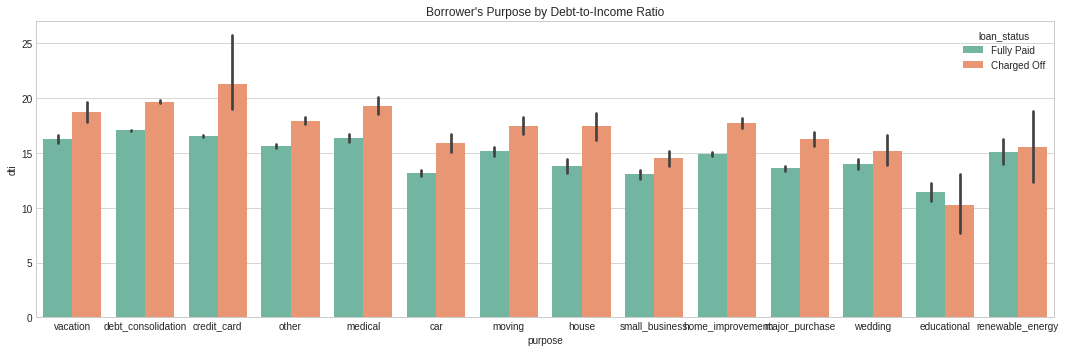

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Purpose by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['dti'],
             aggfunc = 'mean')             

purpose            car  credit_card  ...   vacation    wedding
loan_status                          ...                      
Charged Off  15.877772    21.286551  ...  18.698127  15.197869
Fully Paid   13.192718    16.524693  ...  16.277727  14.021109

[2 rows x 14 columns]

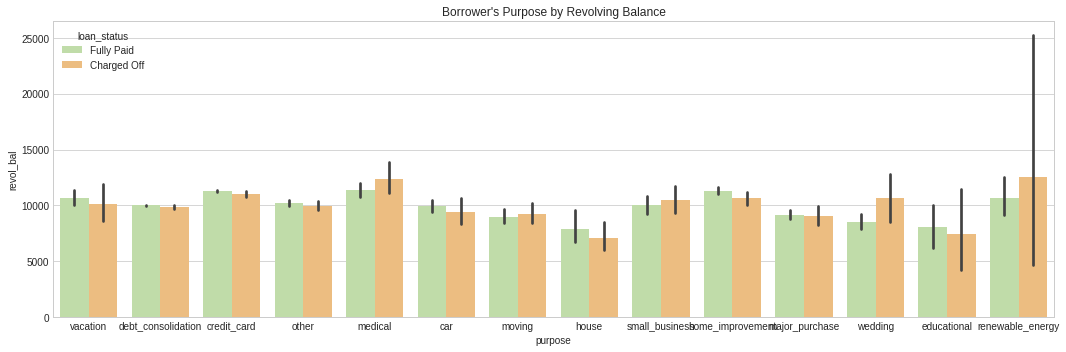

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Purpose by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['revol_bal'],
             aggfunc = 'mean')             

purpose              car   credit_card  ...      vacation       wedding
loan_status                             ...                            
Charged Off  9394.043584  11033.012870  ...  10118.487603  10639.713115
Fully Paid   9951.086599  11279.558189  ...  10675.174036   8533.484089

[2 rows x 14 columns]

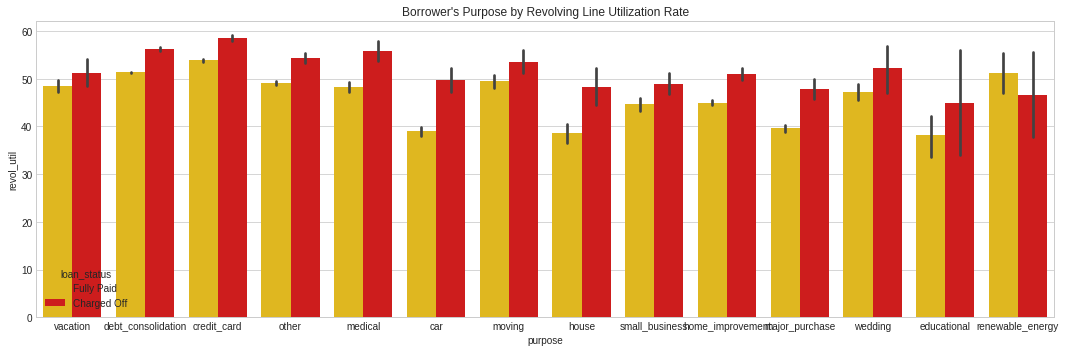

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Purpose by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['revol_util'],
             aggfunc = 'mean')             

purpose            car  credit_card  ...   vacation    wedding
loan_status                          ...                      
Charged Off  49.707255    58.462074  ...  51.232497  52.285246
Fully Paid   38.950900    53.860839  ...  48.432838  47.133173

[2 rows x 14 columns]

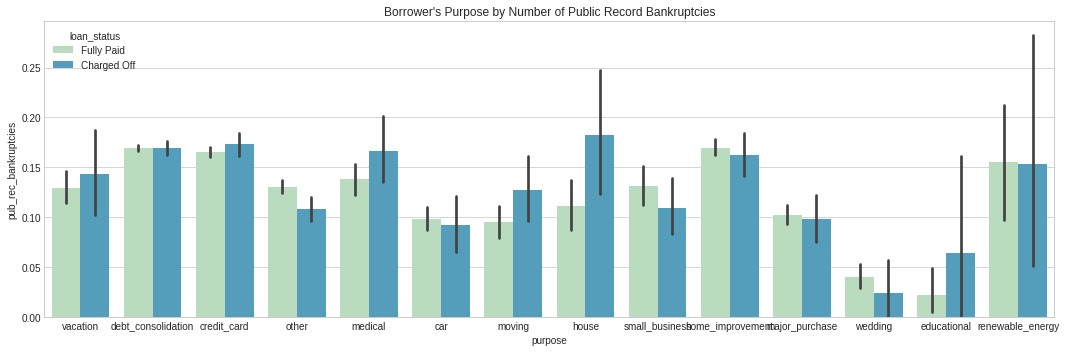

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Purpose by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['pub_rec_bankruptcies'],
             aggfunc = 'mean')             

purpose           car  credit_card  ...  vacation   wedding
loan_status                         ...                    
Charged Off  0.092010     0.173316  ...  0.143251  0.024590
Fully Paid   0.098609     0.165432  ...  0.129819  0.040501

[2 rows x 14 columns]

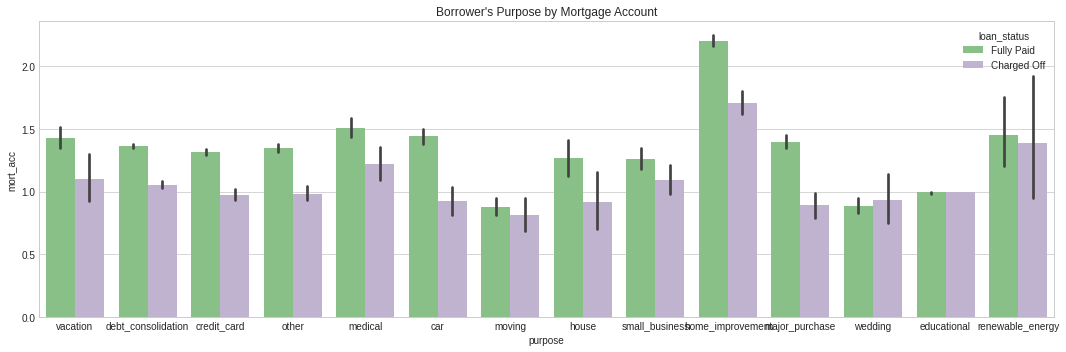

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['purpose'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Purpose by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['purpose'], 
             values = lendclub['mort_acc'],
             aggfunc = 'mean')             

purpose           car  credit_card  ...  vacation   wedding
loan_status                         ...                    
Charged Off  0.922518     0.974045  ...  1.099174  0.934426
Fully Paid   1.439633     1.315867  ...  1.429705  0.887175

[2 rows x 14 columns]

## Verification Status

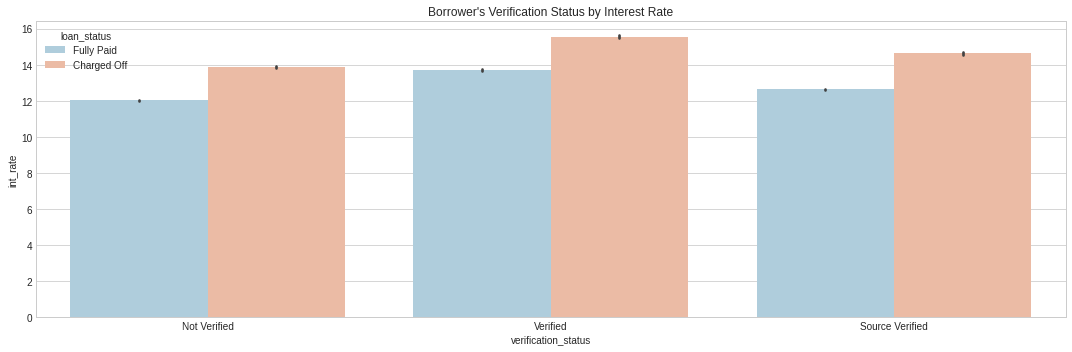

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Verification Status by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()



In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified   Verified
loan_status                                                  
Charged Off             13.887377        14.626024  15.539997
Fully Paid              12.018895        12.633099  13.717445

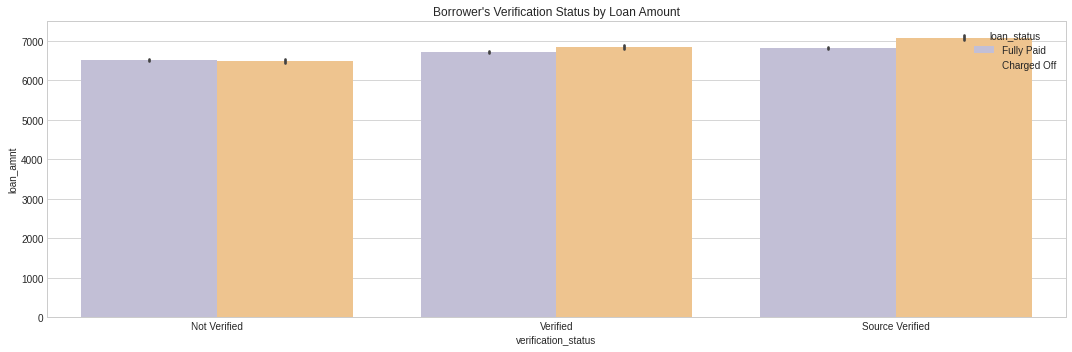

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Verification Status by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()


In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['loan_amnt'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified     Verified
loan_status                                                    
Charged Off           6490.222870      7085.323341  6853.282301
Fully Paid            6512.021387      6832.652045  6729.501640

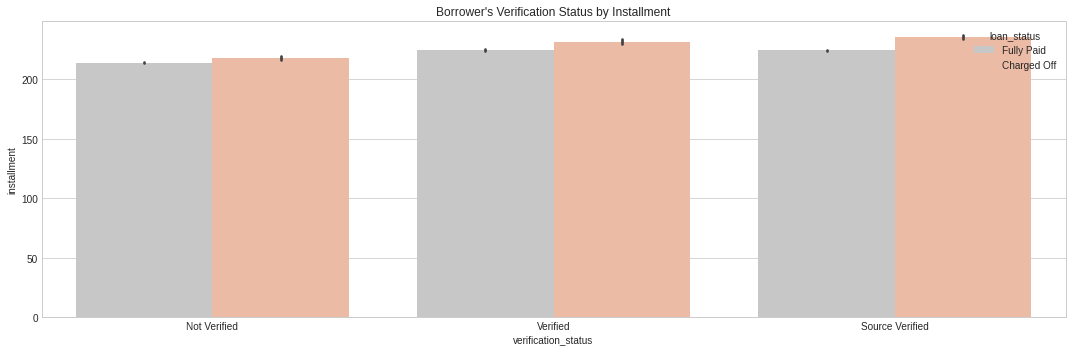

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Verification Status by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['installment'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified    Verified
loan_status                                                   
Charged Off            217.773861       235.058683  231.682707
Fully Paid             213.965990       224.178563  224.647520

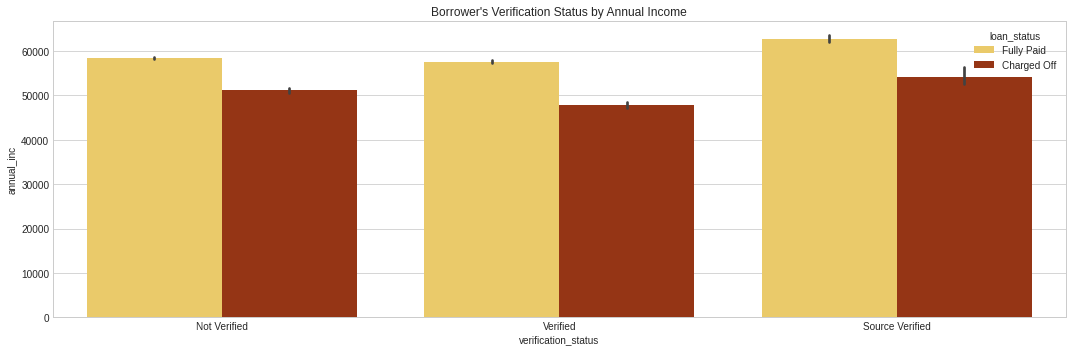

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Verification Status by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['annual_inc'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified      Verified
loan_status                                                     
Charged Off          51143.202183     54116.211192  47776.473483
Fully Paid           58434.054908     62650.088138  57647.819214

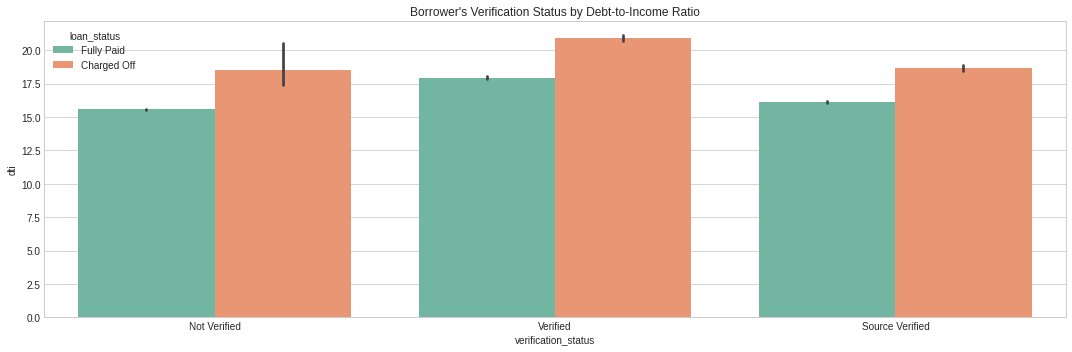

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Verification Status by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['dti'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified   Verified
loan_status                                                  
Charged Off             18.514845        18.660867  20.900397
Fully Paid              15.563058        16.130489  17.939367

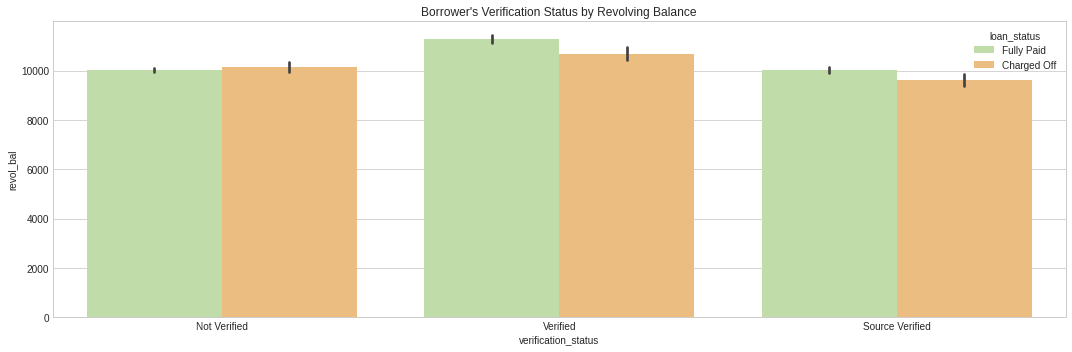

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Verification Status by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['revol_bal'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified      Verified
loan_status                                                     
Charged Off          10126.447915      9622.144044  10680.906982
Fully Paid           10011.914291     10019.128905  11266.933130

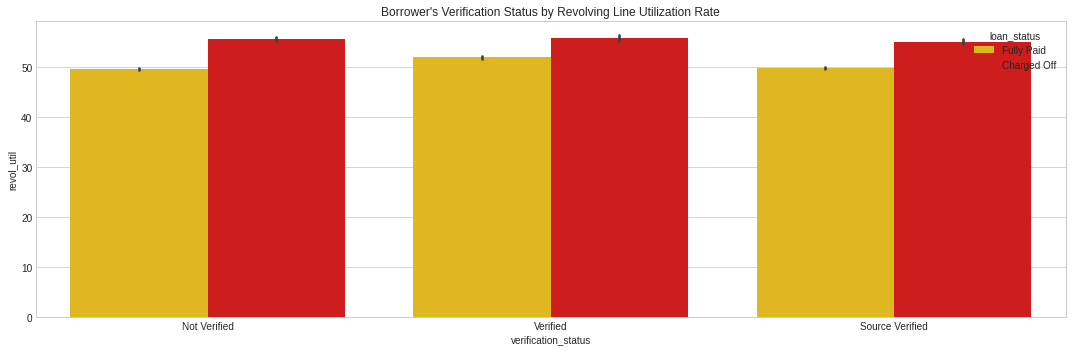

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Verification Status by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['revol_util'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified   Verified
loan_status                                                  
Charged Off             55.551491        55.041233  55.745675
Fully Paid              49.533493        49.809195  51.900469

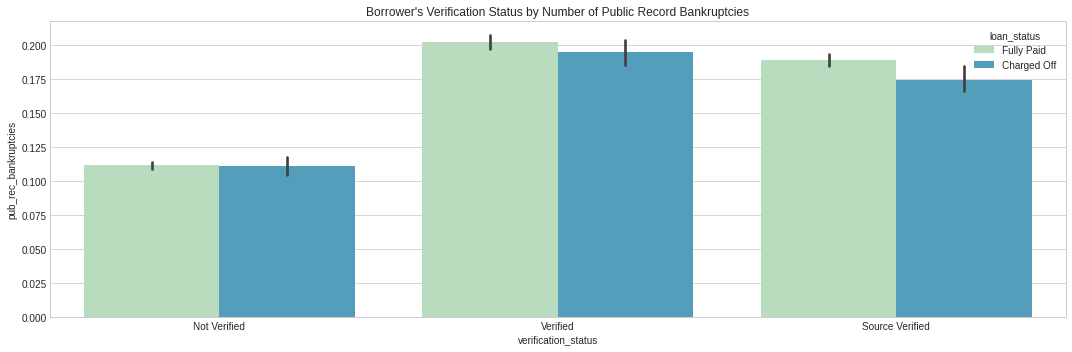

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Verification Status by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['pub_rec_bankruptcies'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off              0.111089         0.174582  0.194850
Fully Paid               0.111645         0.188827  0.202336

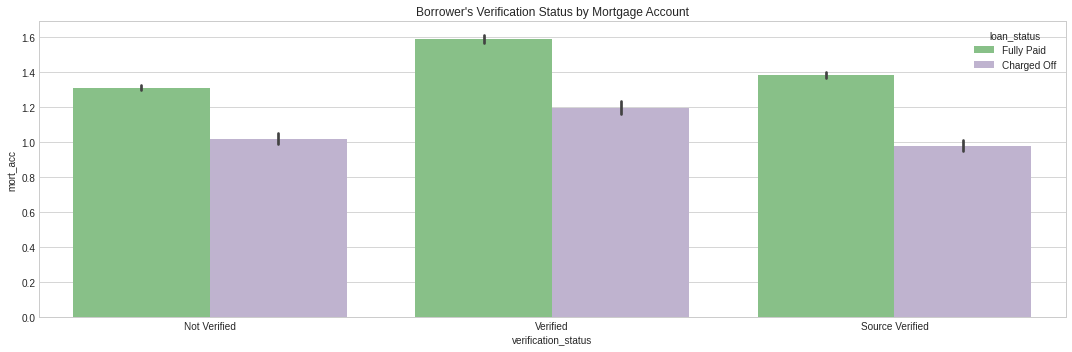

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['verification_status'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Verification Status by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['verification_status'], 
             values = lendclub['mort_acc'],
             aggfunc = 'mean')             

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off              1.020953         0.980802  1.195662
Fully Paid               1.312626         1.383579  1.590493

## Home Ownership

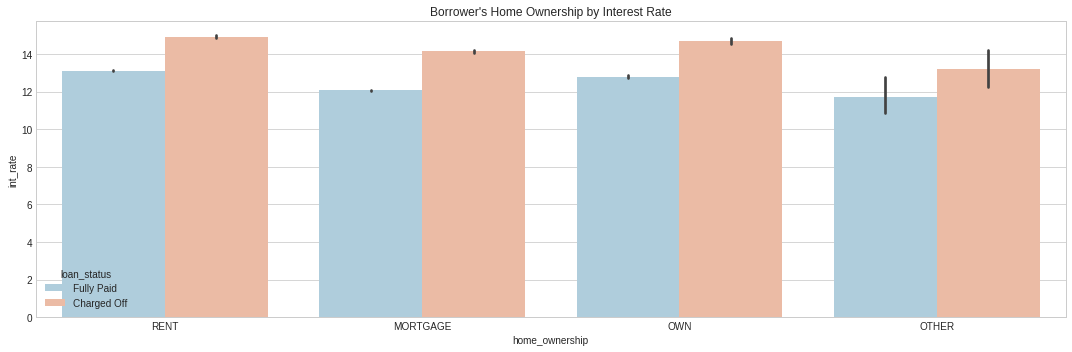

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r')
             
plt.title("Borrower's Home Ownership by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean')             

home_ownership   MORTGAGE      OTHER        OWN       RENT
loan_status                                               
Charged Off     14.148840  13.187000  14.689404  14.918960
Fully Paid      12.069791  11.711311  12.793741  13.111399

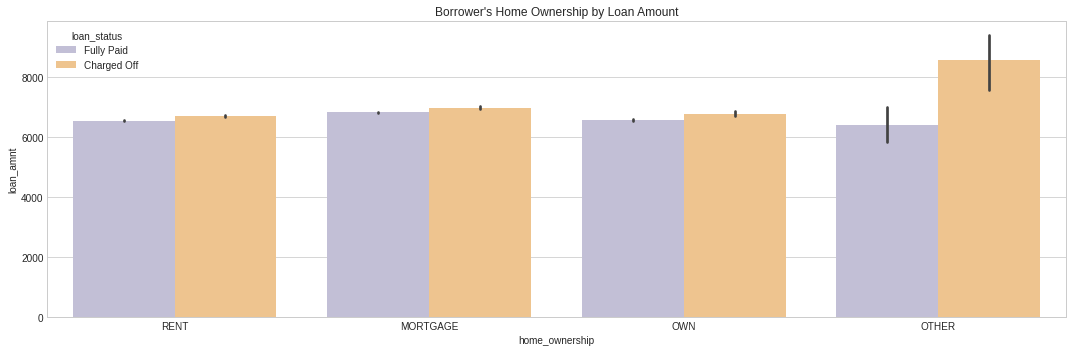

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r')
             
plt.title("Borrower's Home Ownership by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['loan_amnt'],
             aggfunc = 'mean')             

home_ownership     MORTGAGE        OTHER          OWN         RENT
loan_status                                                       
Charged Off     6976.379215  8552.500000  6767.756556  6693.773786
Fully Paid      6822.088607  6399.590164  6567.470359  6535.019036

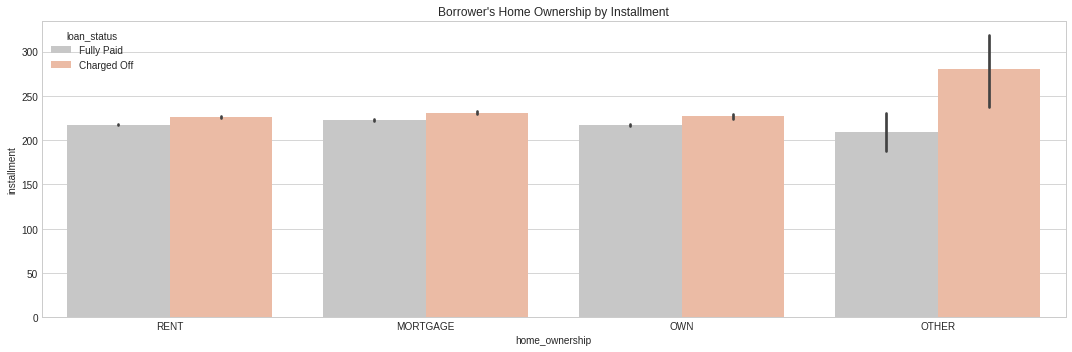

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r')
             
plt.title("Borrower's Home Ownership by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['installment'],
             aggfunc = 'mean')             

home_ownership    MORTGAGE       OTHER         OWN        RENT
loan_status                                                   
Charged Off     230.802771  279.924000  226.815840  225.996742
Fully Paid      222.765207  208.629836  217.177504  217.410712

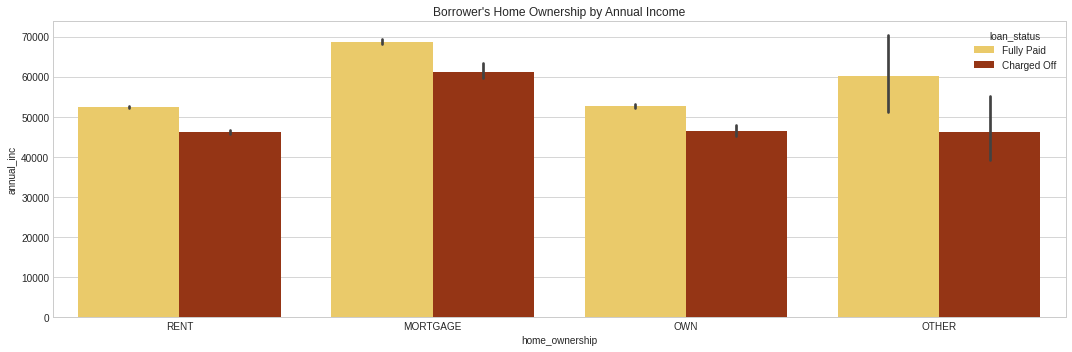

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r')
             
plt.title("Borrower's Home Ownership by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['annual_inc'],
             aggfunc = 'mean')             

home_ownership      MORTGAGE         OTHER           OWN          RENT
loan_status                                                           
Charged Off     61071.074878  46210.000000  46355.703700  46143.715807
Fully Paid      68754.467489  60198.491803  52707.354525  52430.309906

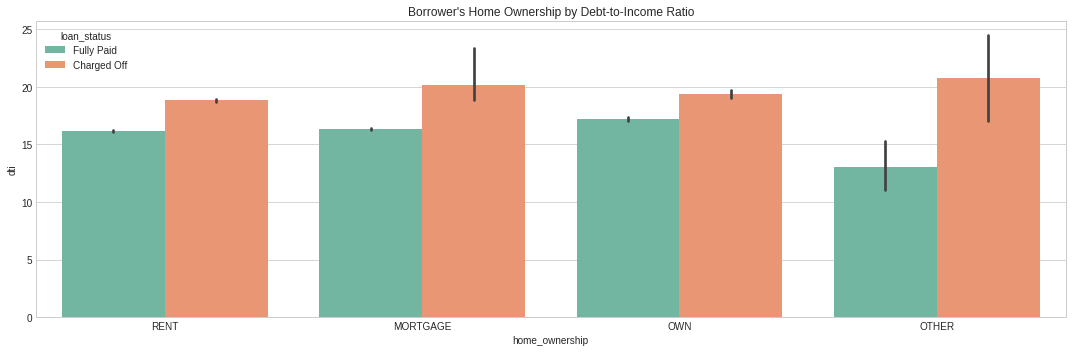

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2')
             
plt.title("Borrower's Home Ownership by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['dti'],
             aggfunc = 'mean')             

home_ownership   MORTGAGE      OTHER        OWN       RENT
loan_status                                               
Charged Off     20.129619  20.749000  19.334403  18.818609
Fully Paid      16.331001  13.043443  17.189603  16.155205

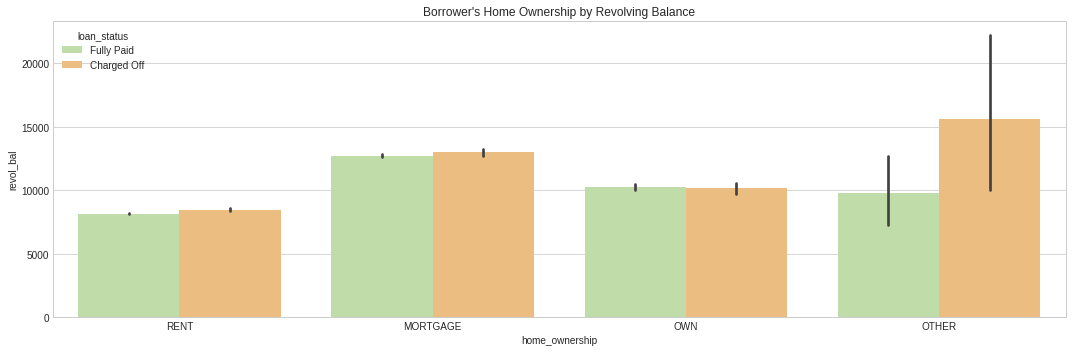

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r')
             
plt.title("Borrower's Home Ownership by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['revol_bal'],
             aggfunc = 'mean')             

home_ownership      MORTGAGE         OTHER           OWN         RENT
loan_status                                                          
Charged Off     12974.884356  15614.500000  10157.479443  8473.468941
Fully Paid      12716.206067   9769.836066  10249.178933  8168.720322

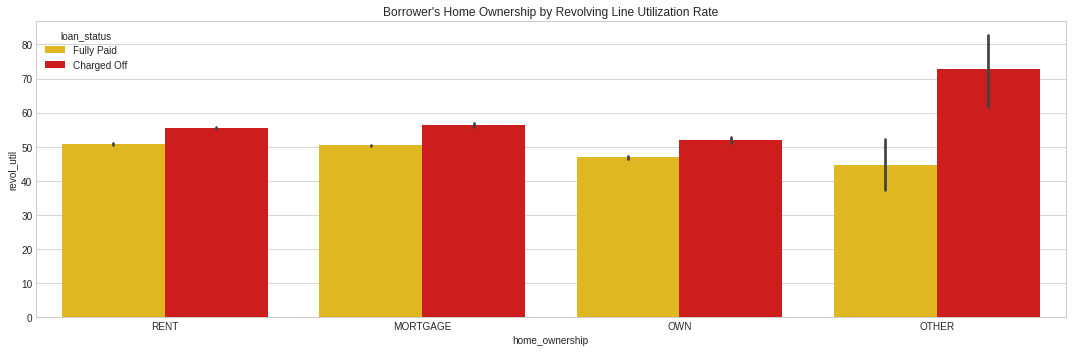

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r')
             
plt.title("Borrower's Home Ownership by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['revol_util'],
             aggfunc = 'mean')             

home_ownership   MORTGAGE      OTHER        OWN       RENT
loan_status                                               
Charged Off     56.420953  72.770000  52.093035  55.537048
Fully Paid      50.372230  44.545784  46.921153  50.790098

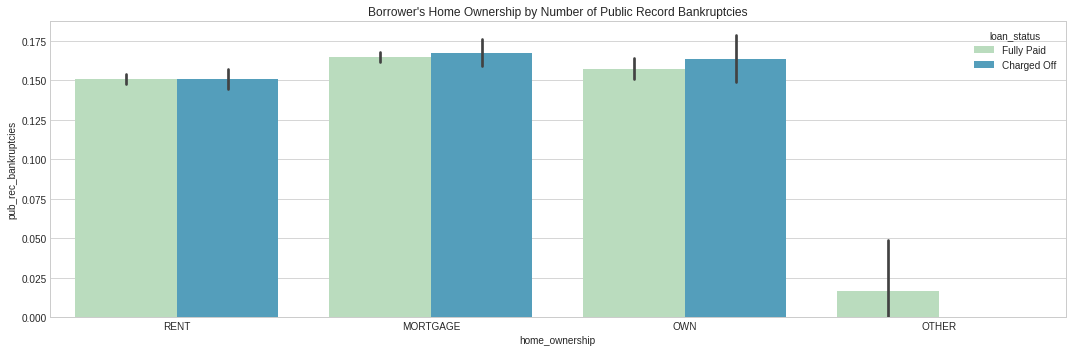

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu')
             
plt.title("Borrower's Home Ownership by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['pub_rec_bankruptcies'],
             aggfunc = 'mean')             

home_ownership  MORTGAGE     OTHER       OWN      RENT
loan_status                                           
Charged Off     0.167606  0.000000  0.163807  0.150745
Fully Paid      0.164677  0.016393  0.157172  0.150886

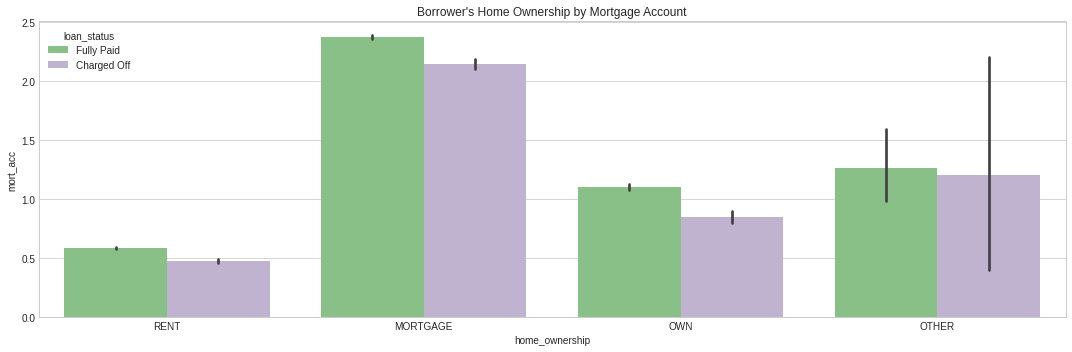

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['home_ownership'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'])
             
plt.title("Borrower's Home Ownership by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['home_ownership'], 
             values = lendclub['mort_acc'],
             aggfunc = 'mean')             

home_ownership  MORTGAGE     OTHER       OWN      RENT
loan_status                                           
Charged Off     2.141625  1.200000  0.848171  0.475521
Fully Paid      2.369466  1.262295  1.103383  0.584852

## Employment Length

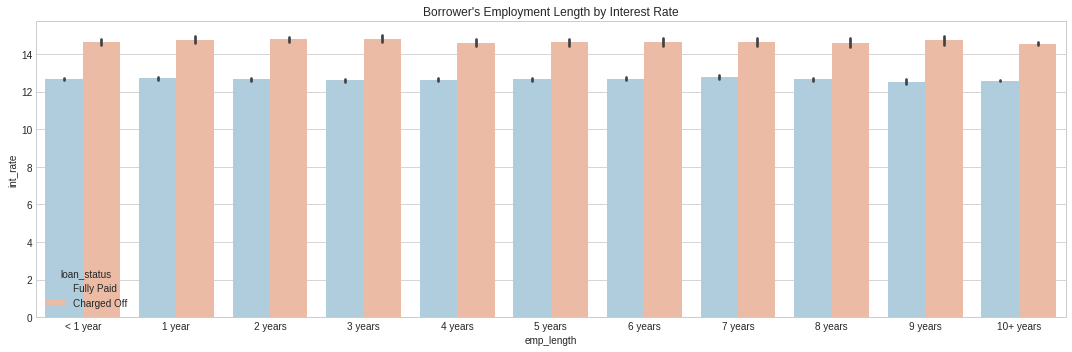

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# interest rate by borrowers' employment length show no difference
# the average of interest rate looks same around 12%.
# But when speaking of the highest interest rate is from borrower with 1 year experience: 13.05%

# Anyway, borrowers' employment length do not affect interest rate.

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

emp_length      1 year  10+ years    2 years  ...    8 years    9 years   < 1 year
loan_status                                   ...                                 
Charged Off  14.757523  14.537931  14.777870  ...  14.609015  14.736551  14.657719
Fully Paid   12.697807  12.584262  12.654098  ...  12.644272  12.533864  12.661974

[2 rows x 11 columns]

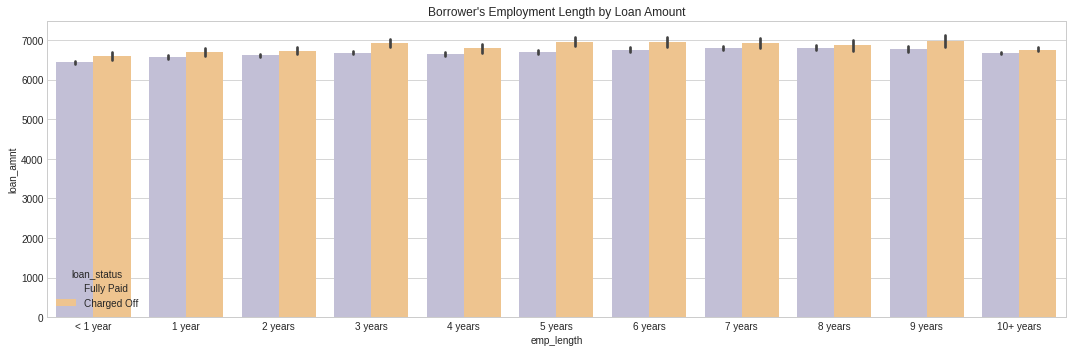

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

emp_length        1 year    10+ years  ...      9 years     < 1 year
loan_status                            ...                          
Charged Off  6697.022956  6760.532407  ...  6970.490585  6592.946768
Fully Paid   6561.168126  6682.607441  ...  6772.422680  6436.389597

[2 rows x 11 columns]

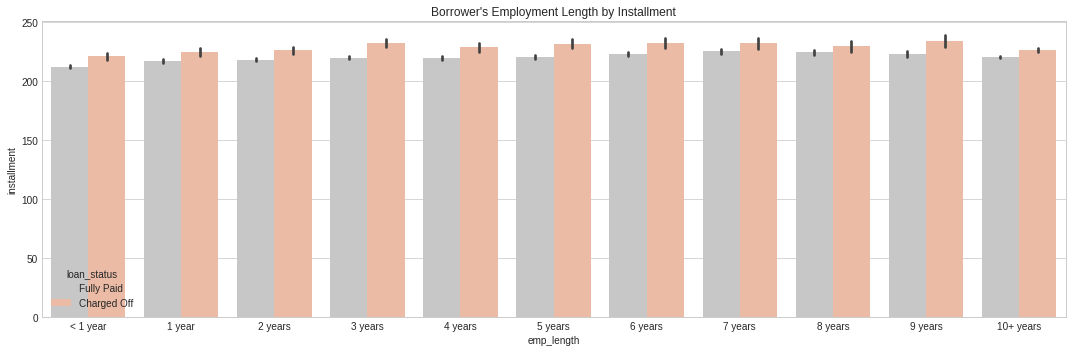

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

emp_length       1 year   10+ years  ...     9 years    < 1 year
loan_status                          ...                        
Charged Off  224.533984  226.554480  ...  233.652111  221.040023
Fully Paid   216.832485  220.322385  ...  222.919454  212.234154

[2 rows x 11 columns]

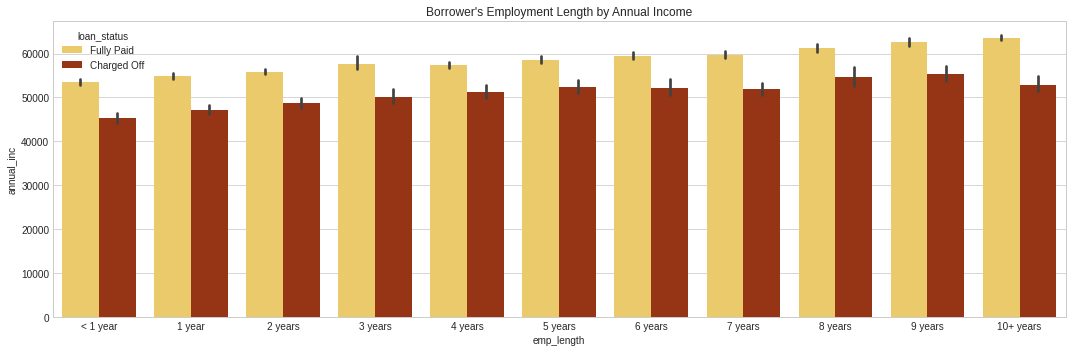

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

emp_length         1 year     10+ years  ...       9 years      < 1 year
loan_status                              ...                            
Charged Off  47232.822482  52828.331552  ...  55335.603092  45309.351540
Fully Paid   54859.845871  63528.780805  ...  62543.812194  53506.130048

[2 rows x 11 columns]

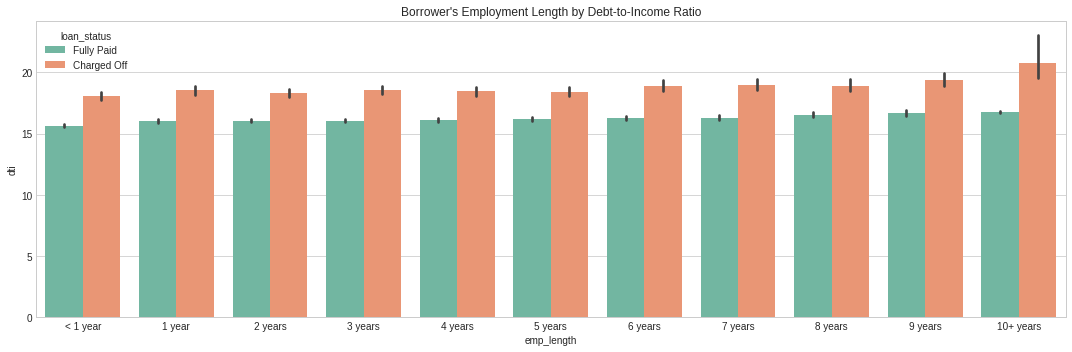

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

emp_length      1 year  10+ years    2 years  ...    8 years    9 years   < 1 year
loan_status                                   ...                                 
Charged Off  18.553027  20.760360  18.285371  ...  18.922397  19.400337  18.040209
Fully Paid   16.022890  16.770778  16.049084  ...  16.548644  16.640369  15.651854

[2 rows x 11 columns]

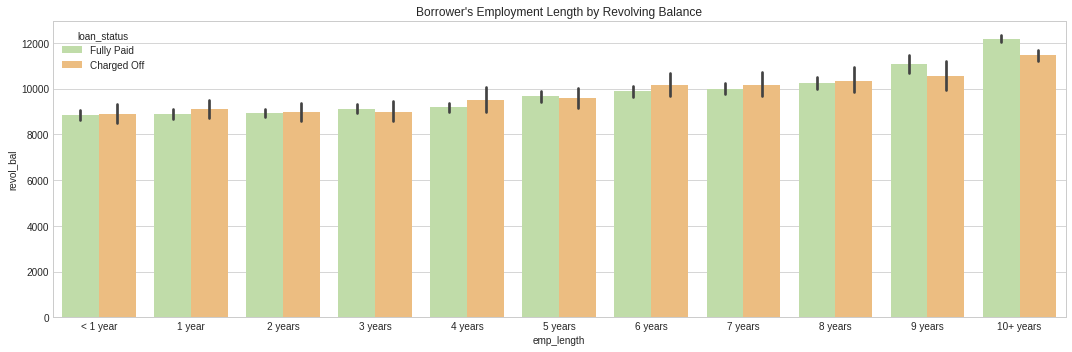

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

emp_length        1 year     10+ years  ...       9 years     < 1 year
loan_status                             ...                           
Charged Off  9125.934481  11452.666351  ...  10556.985134  8904.916350
Fully Paid   8891.719891  12172.645974  ...  11071.093402  8837.570302

[2 rows x 11 columns]

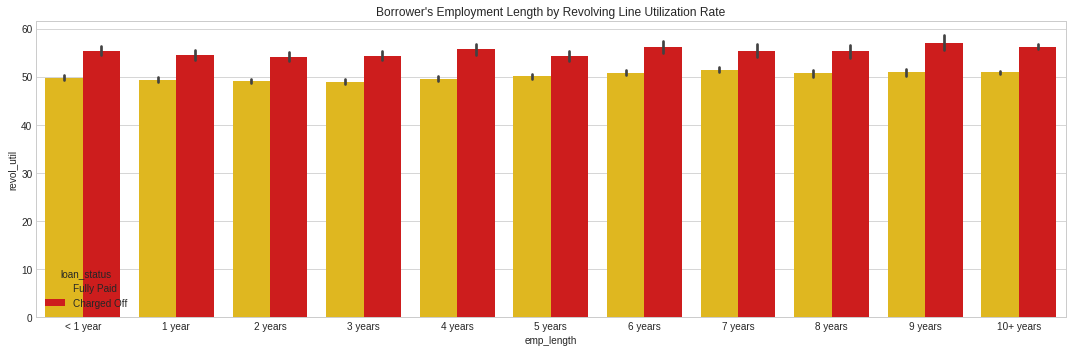

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

emp_length      1 year  10+ years    2 years  ...    8 years    9 years   < 1 year
loan_status                                   ...                                 
Charged Off  54.465558  56.258392  54.186343  ...  55.322487  56.992266  55.387256
Fully Paid   49.365728  50.881136  49.119762  ...  50.691396  50.904398  49.769905

[2 rows x 11 columns]

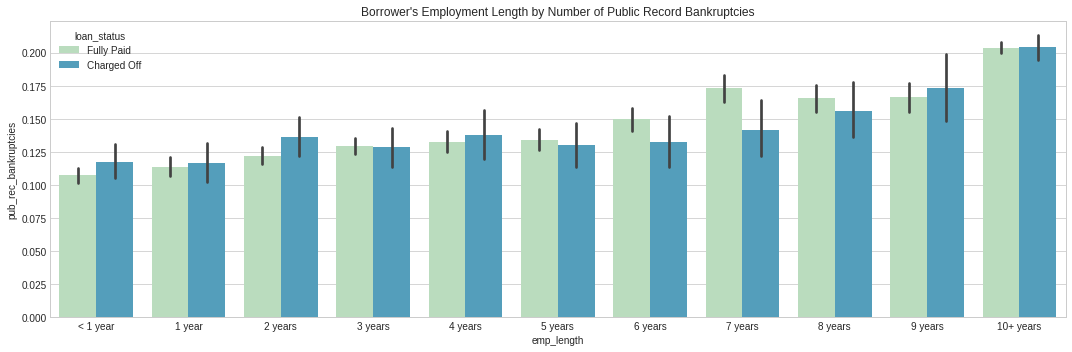

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu',
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

emp_length     1 year  10+ years   2 years  ...   8 years   9 years  < 1 year
loan_status                                 ...                              
Charged Off  0.116691   0.204019  0.136516  ...  0.155993  0.173439  0.117490
Fully Paid   0.113794   0.203794  0.122177  ...  0.165836  0.166392  0.107322

[2 rows x 11 columns]

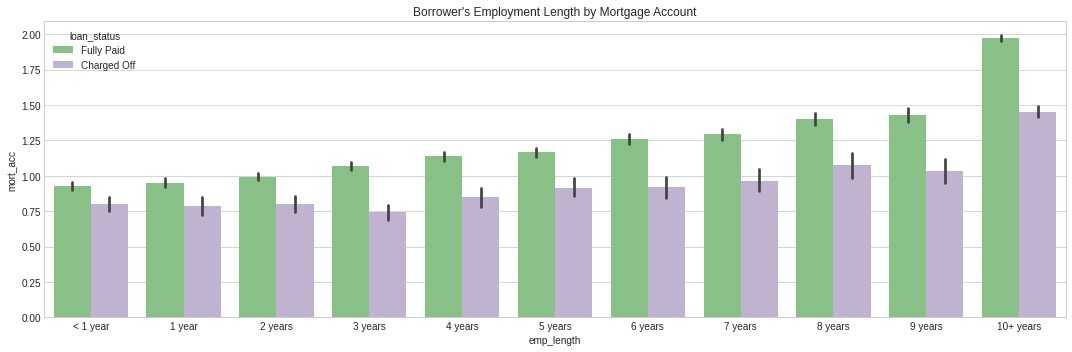

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['emp_length'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'],
            order = order_emplength)
             
plt.title("Borrower's Employment Length by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['emp_length'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

emp_length     1 year  10+ years   2 years  ...   8 years   9 years  < 1 year
loan_status                                 ...                              
Charged Off  0.783357   1.450968  0.801567  ...  1.073892  1.033697  0.798859
Fully Paid   0.950900   1.971444  0.994616  ...  1.400032  1.429278  0.924891

[2 rows x 11 columns]

## Grade

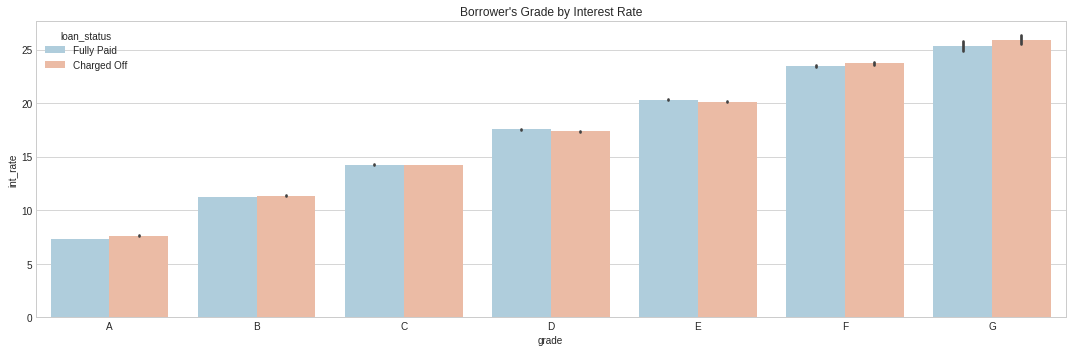

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Each grade almost has the same percentage loan status
    # A: 49.09% fully paid, 50.91% charged off
    # B: 49.70% fully paid, 50.30% charged off
    # C: 50.09% fully paid, 49.92% charged off
    # D: 50.27% fully paid, 49.73% charged off
    # E: 50.23% fully paid, 49.77% charged off
    # F: 40.75% fully paid, 50.25% charged off
    # G: 49.45% fully paid, 50.55% charged off
# Whatever the grade, the interest rate will has no significantly differences

In [ ]:
(pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['grade'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean',
             normalize = 'columns')*100).round(3)

grade             A       B       C       D       E       F      G
loan_status                                                       
Charged Off  50.911  50.304  49.915  49.734  49.769  50.254  50.55
Fully Paid   49.089  49.696  50.085  50.266  50.231  49.746  49.45

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

grade               A         B          C  ...          E          F          G
loan_status                                 ...                                 
Charged Off  7.617208  11.35070  14.211683  ...  20.126140  23.704580  25.890870
Fully Paid   7.344475  11.21354  14.260024  ...  20.313131  23.464858  25.327111

[2 rows x 7 columns]

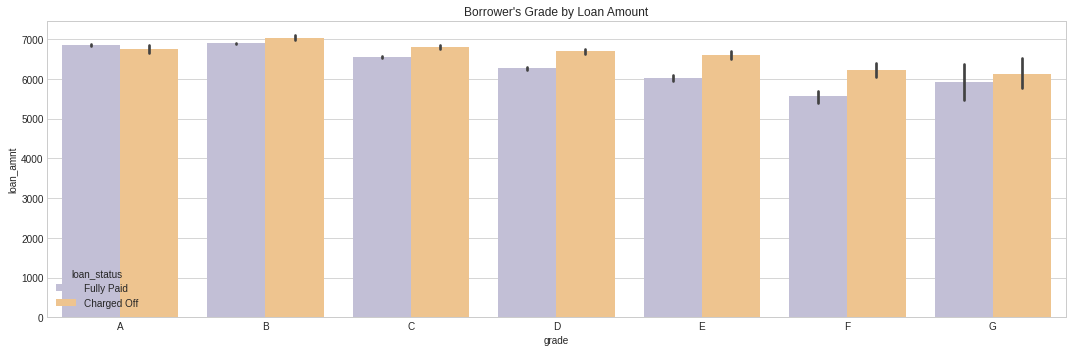

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

grade                  A            B  ...            F            G
loan_status                            ...                          
Charged Off  6753.203125  7032.987968  ...  6225.743855  6128.442029
Fully Paid   6849.336491  6894.599197  ...  5559.823484  5928.888889

[2 rows x 7 columns]

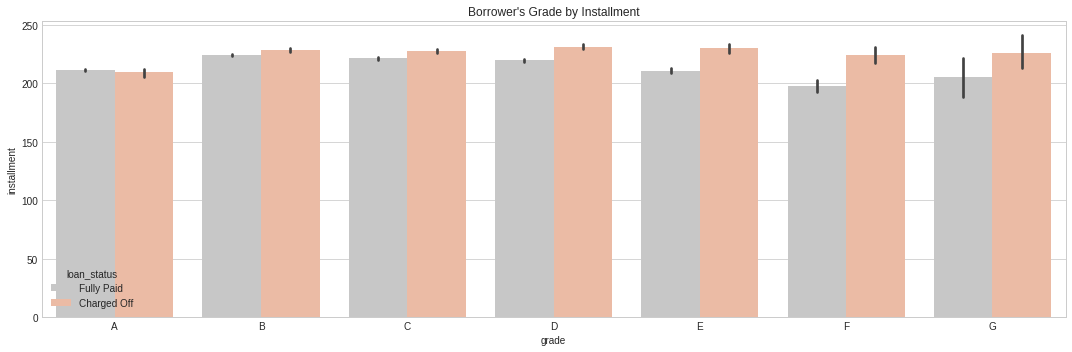

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

grade                 A           B  ...           F           G
loan_status                          ...                        
Charged Off  209.418630  228.406687  ...  224.221669  226.415725
Fully Paid   211.528929  224.535321  ...  197.954083  205.356370

[2 rows x 7 columns]

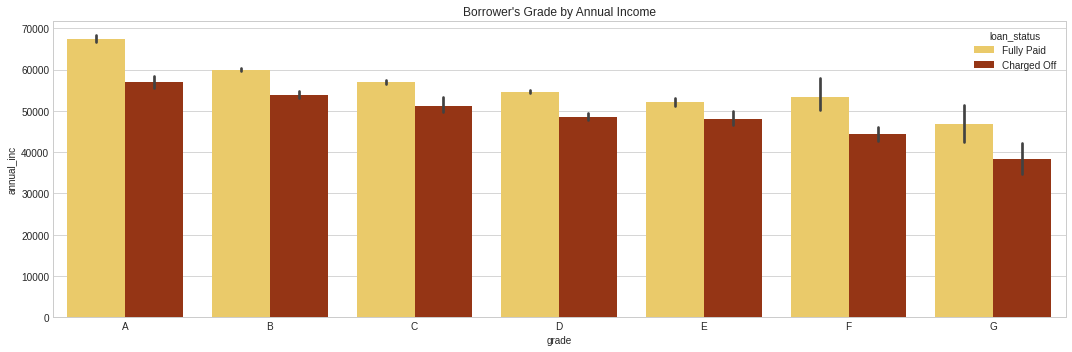

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

grade                   A             B  ...             F             G
loan_status                              ...                            
Charged Off  56938.232682  53874.294462  ...  44349.441669  38322.852174
Fully Paid   67383.087384  59940.164132  ...  53359.735349  46778.681185

[2 rows x 7 columns]

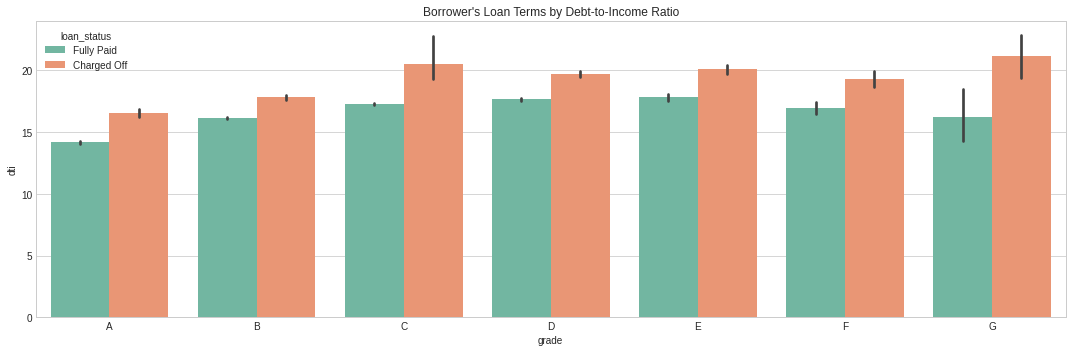

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2',
            order = order_grade)
             
plt.title("Borrower's Loan Terms by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

grade                A          B          C  ...          E          F          G
loan_status                                   ...                                 
Charged Off  16.526094  17.796907  20.496276  ...  20.059530  19.325343  21.107536
Fully Paid   14.148748  16.133829  17.265923  ...  17.818459  16.950407  16.212889

[2 rows x 7 columns]

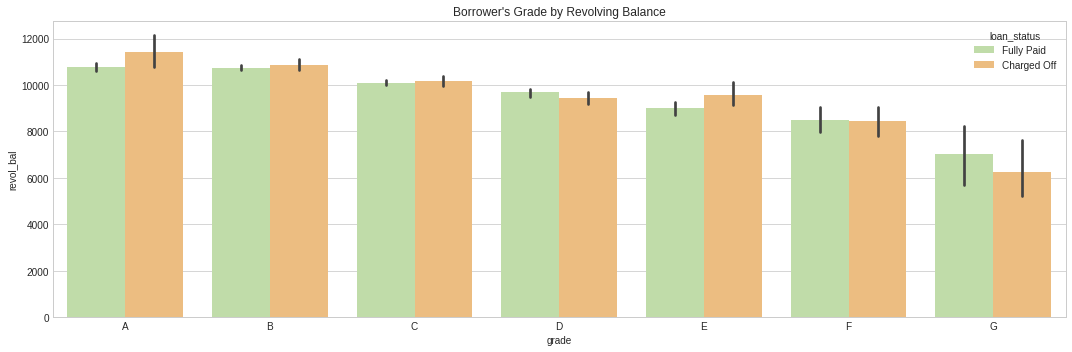

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

grade                   A             B  ...            F            G
loan_status                              ...                          
Charged Off  11439.242188  10881.946821  ...  8455.632600  6270.500000
Fully Paid   10755.067591  10739.881977  ...  8506.075979  7012.540741

[2 rows x 7 columns]

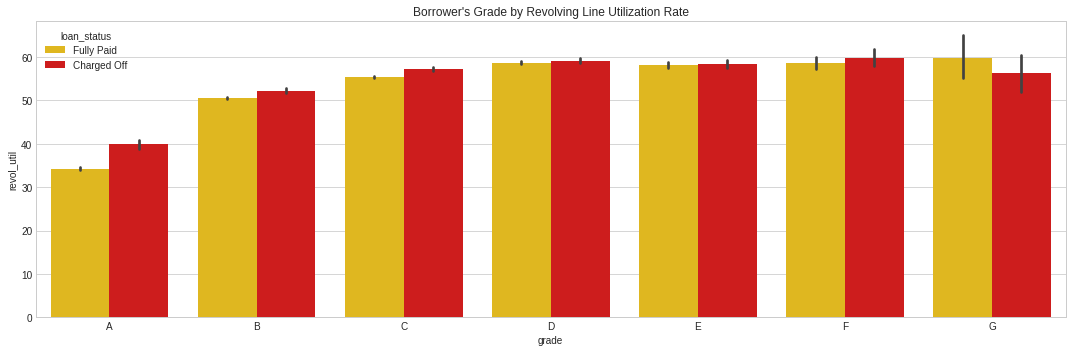

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r',
            order = order_grade)
             
plt.title("Borrower's Grade by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

grade                A          B          C  ...          E          F          G
loan_status                                   ...                                 
Charged Off  39.881740  52.224255  57.293772  ...  58.405440  59.850956  56.426087
Fully Paid   34.289571  50.535686  55.483597  ...  58.218389  58.620782  59.845926

[2 rows x 7 columns]

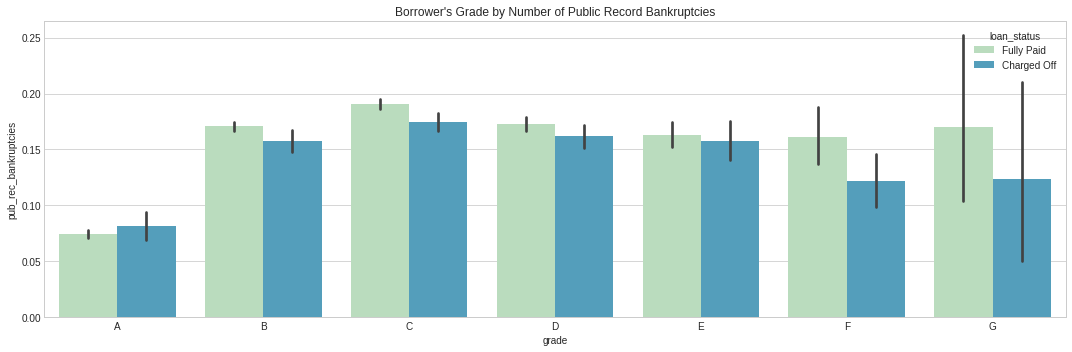

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu',
            order = order_grade)
             
plt.title("Borrower's Grade by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

grade               A         B         C  ...         E         F         G
loan_status                                ...                              
Charged Off  0.081771  0.157457  0.174455  ...  0.157645  0.121604  0.123188
Fully Paid   0.074659  0.170538  0.190989  ...  0.163207  0.161167  0.170370

[2 rows x 7 columns]

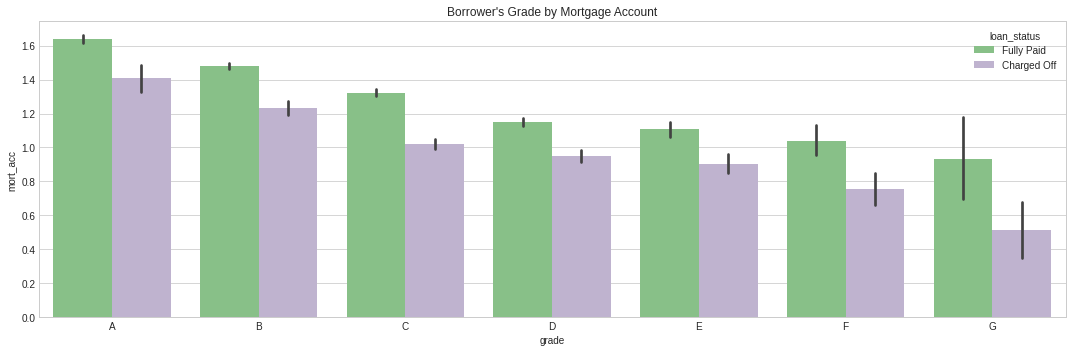

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['grade'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'],
            order = order_grade)
             
plt.title("Borrower's Grade by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['grade'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

grade               A         B         C  ...         E         F         G
loan_status                                ...                              
Charged Off  1.407292  1.233660  1.019950  ...  0.903595  0.752911  0.514493
Fully Paid   1.637570  1.480543  1.323626  ...  1.106456  1.036071  0.933333

[2 rows x 7 columns]

## Sub Grade

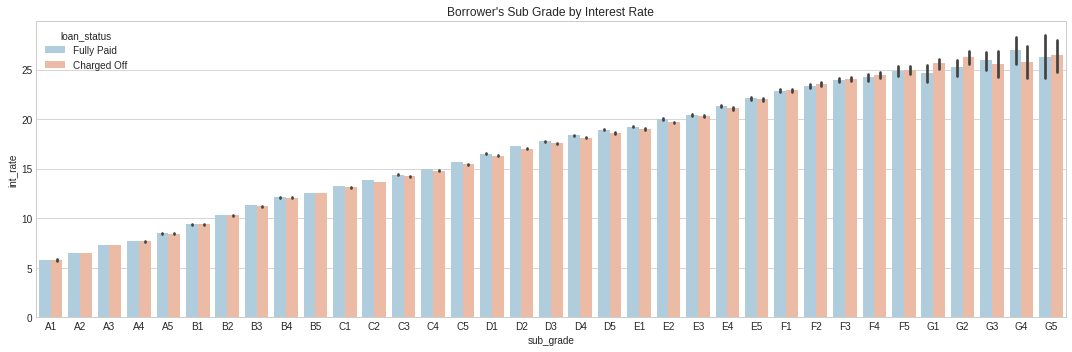

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['int_rate'],
            hue = lendclub['loan_status'],
            palette = 'RdBu_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Interest Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()



In [ ]:
(pd.crosstab(index = lendclub['loan_status'], 
             columns = lendclub['sub_grade'], 
             values = lendclub['int_rate'],
             aggfunc = 'mean',
             normalize = 'columns')*100).round(3)

sub_grade        A1     A2      A3     A4  ...      G2      G3      G4      G5
loan_status                                ...                                
Charged Off  49.897  49.92  50.038  49.89  ...  51.031  49.619  48.839  50.143
Fully Paid   50.103  50.08  49.962  50.11  ...  48.969  50.381  51.161  49.857

[2 rows x 35 columns]

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['int_rate'],
            aggfunc = 'mean')

sub_grade          A1        A2        A3  ...         G3         G4         G5
loan_status                                ...                                 
Charged Off  5.795798  6.488093  7.295926  ...  25.541111  25.752143  26.431818
Fully Paid   5.819759  6.508798  7.284935  ...  25.933500  26.976154  26.281111

[2 rows x 35 columns]

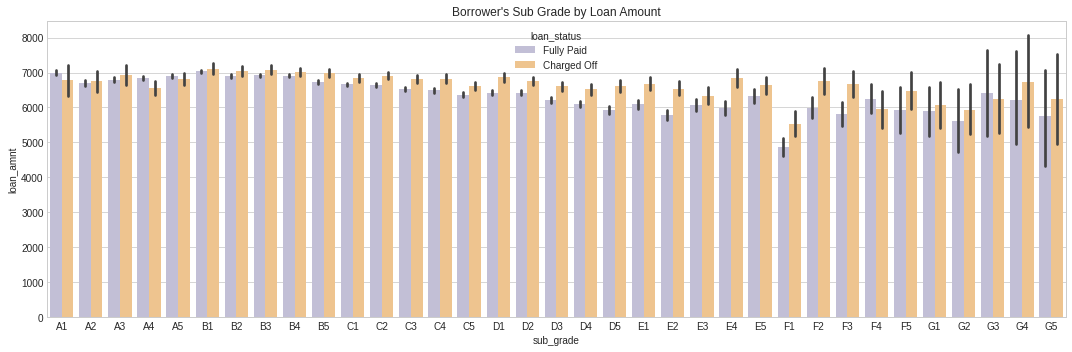

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['loan_amnt'],
            hue = lendclub['loan_status'],
            palette = 'PuOr_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Loan Amount")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['loan_amnt'],
            aggfunc = 'mean')

sub_grade             A1           A2  ...           G4           G5
loan_status                            ...                          
Charged Off  6775.840336  6748.093220  ...  6735.714286  6254.545455
Fully Paid   7000.529865  6696.708372  ...  6226.923077  5744.444444

[2 rows x 35 columns]

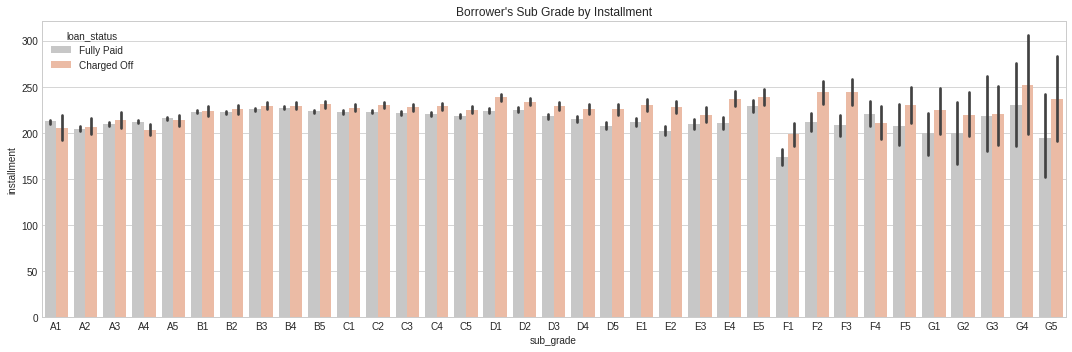

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['installment'],
            hue = lendclub['loan_status'],
            palette = 'RdGy_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Installment")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['installment'],
            aggfunc = 'mean')

sub_grade            A1          A2  ...          G4          G5
loan_status                          ...                        
Charged Off  205.519328  206.780466  ...  252.177857  236.939091
Fully Paid   212.328678  204.717563  ...  230.264615  194.798889

[2 rows x 35 columns]

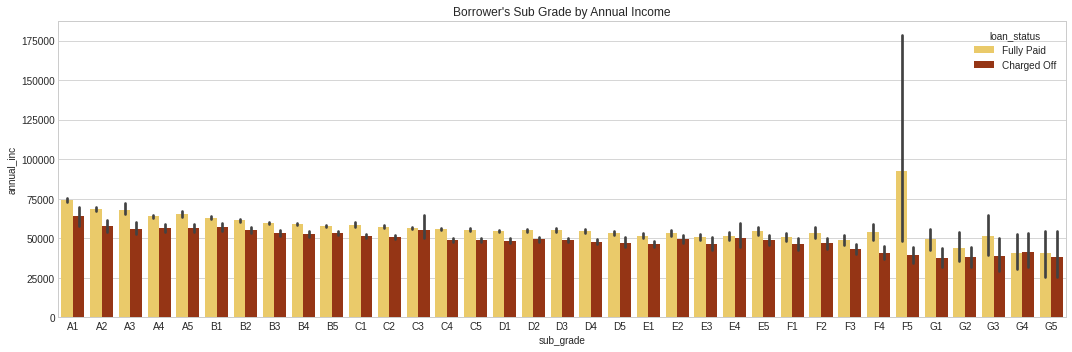

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['annual_inc'],
            hue = lendclub['loan_status'],
            palette = 'afmhot_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Annual Income")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['annual_inc'],
            aggfunc = 'mean')

sub_grade              A1            A2  ...            G4            G5
loan_status                              ...                            
Charged Off  63805.495798  57710.672542  ...  41015.928571  38254.545455
Fully Paid   74150.987632  68703.779729  ...  40457.843077  40606.666667

[2 rows x 35 columns]

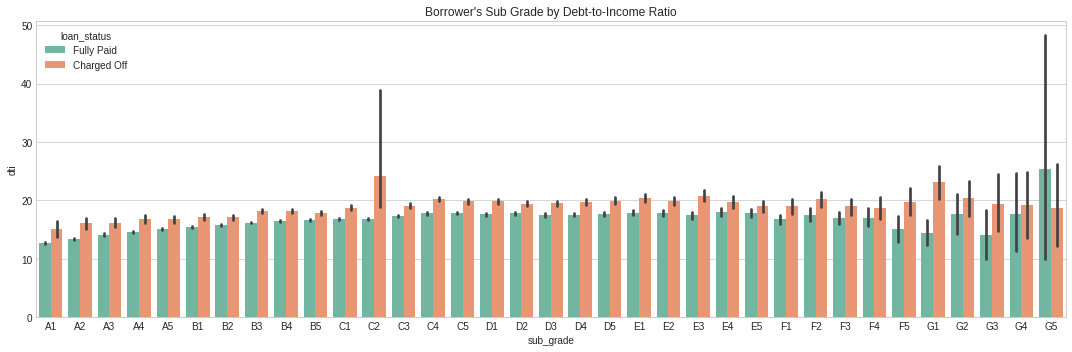

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['dti'],
            hue = lendclub['loan_status'],
            palette = 'Set2',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Debt-to-Income Ratio")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['dti'],
            aggfunc = 'mean')

sub_grade           A1         A2         A3  ...         G3         G4         G5
loan_status                                   ...                                 
Charged Off  15.154286  16.089110  16.216698  ...  19.351111  19.173571  18.733636
Fully Paid   12.687481  13.453241  14.163678  ...  14.091000  17.745385  25.426667

[2 rows x 35 columns]

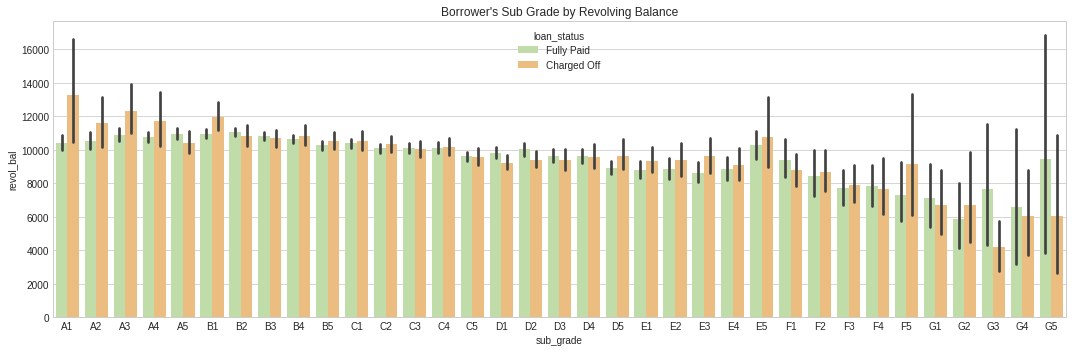

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['revol_bal'],
            hue = lendclub['loan_status'],
            palette = 'Spectral_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Revolving Balance")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['revol_bal'],
            aggfunc = 'mean')

sub_grade              A1            A2  ...           G4           G5
loan_status                              ...                          
Charged Off  13259.361345  11614.508475  ...  6068.142857  6077.454545
Fully Paid   10415.899085  10556.393124  ...  6602.230769  9445.666667

[2 rows x 35 columns]

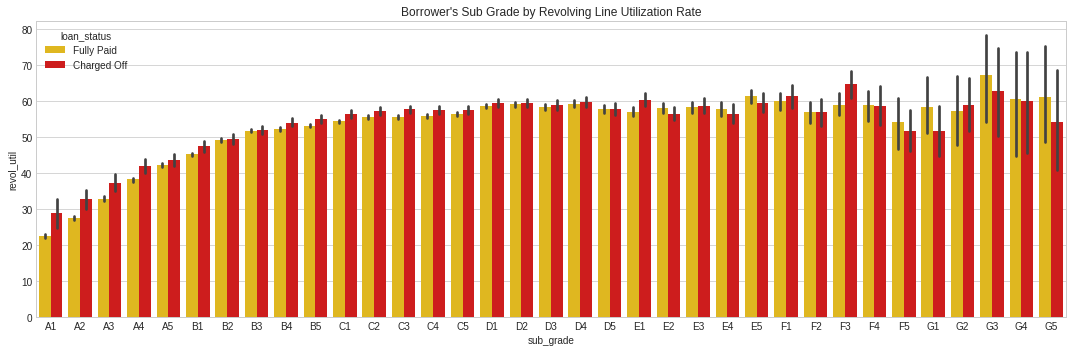

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['revol_util'],
            hue = lendclub['loan_status'],
            palette = 'hot_r',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Revolving Line Utilization Rate")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['revol_util'],
            aggfunc = 'mean')

sub_grade           A1         A2         A3  ...         G3         G4         G5
loan_status                                   ...                                 
Charged Off  28.878151  32.727119  37.301543  ...  62.844444  59.942857  54.318182
Fully Paid   22.671171  27.549531  32.897249  ...  67.140000  60.630769  61.211111

[2 rows x 35 columns]

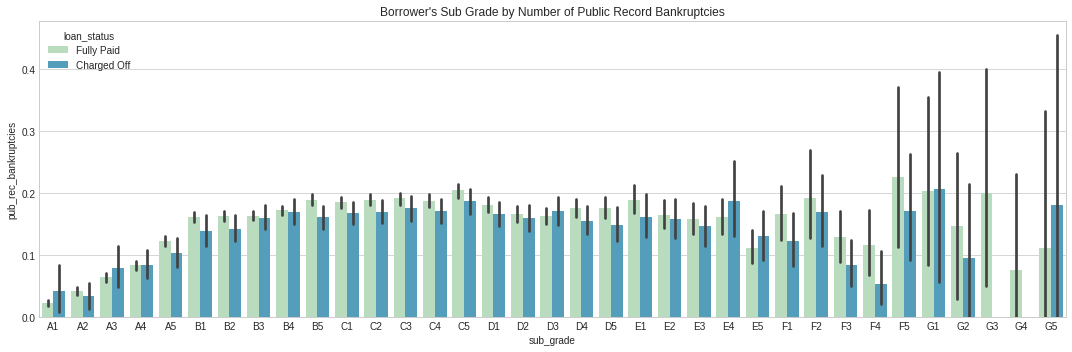

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['pub_rec_bankruptcies'],
            hue = lendclub['loan_status'],
            palette = 'GnBu',
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Number of Public Record Bankruptcies")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['pub_rec_bankruptcies'],
            aggfunc = 'mean')

sub_grade          A1        A2        A3  ...   G3        G4        G5
loan_status                                ...                         
Charged Off  0.042017  0.033898  0.080247  ...  0.0  0.000000  0.181818
Fully Paid   0.022399  0.042797  0.064523  ...  0.2  0.076923  0.111111

[2 rows x 35 columns]

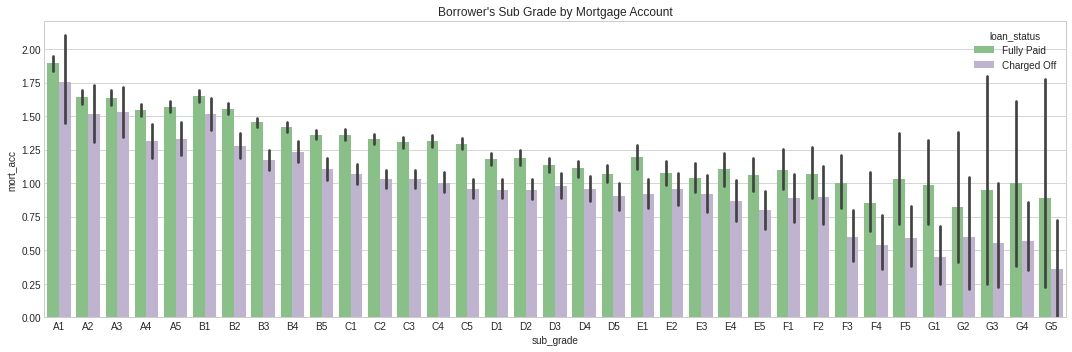

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = lendclub['sub_grade'], 
            y = lendclub['mort_acc'],
            palette = 'Accent',
            hue = lendclub['loan_status'],
            order = order_subgrade)
             
plt.title("Borrower's Sub Grade by Mortgage Account")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(index = lendclub['loan_status'], 
            columns = lendclub['sub_grade'], 
            values = lendclub['mort_acc'],
            aggfunc = 'mean')

sub_grade          A1        A2        A3  ...        G3        G4        G5
loan_status                                ...                              
Charged Off  1.756303  1.516949  1.527778  ...  0.555556  0.571429  0.363636
Fully Paid   1.894268  1.643826  1.637525  ...  0.950000  1.000000  0.888889

[2 rows x 35 columns]

# 7) Feature Engineering

In [ ]:
lendclub.head(2)

loan_amnt       term  ...  EarliestCrLine_month  EarliestCrLine_year
0    10000.0  36 months  ...                     6                 1990
1     8000.0  36 months  ...                     7                 2004

[2 rows x 29 columns]

## term

In [ ]:
lendclub['term'].value_counts()

36 months    157195
60 months      7142
Name: term, dtype: int64

In [ ]:
lendclub['term'] = lendclub['term'].map({
    '36 months' : 36,
    '60 months' : 60
})

In [ ]:
lendclub.head()

loan_amnt  term  ...  EarliestCrLine_month  EarliestCrLine_year
0     10000.0    36  ...                     6                 1990
1      8000.0    36  ...                     7                 2004
3      7200.0    36  ...                     9                 2006
10    10000.0    36  ...                    12                 1990
12     7500.0    36  ...                     4                 1995

[5 rows x 29 columns]

## grade

In [ ]:
grade_encode = {}
v = 1

for n in sorted(lendclub['grade'].unique()):
  grade_encode[n] = v
  v += 1

grade_encode

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [ ]:
lendclub['grade'] = lendclub['grade'].map(grade_encode)

In [ ]:
lendclub.head()

loan_amnt  term  ...  EarliestCrLine_month  EarliestCrLine_year
0     10000.0    36  ...                     6                 1990
1      8000.0    36  ...                     7                 2004
3      7200.0    36  ...                     9                 2006
10    10000.0    36  ...                    12                 1990
12     7500.0    36  ...                     4                 1995

[5 rows x 29 columns]

## sub_grade

In [ ]:
sub_grade_encode = {}
v = 1

for n in sorted(lendclub['sub_grade'].unique()):
  sub_grade_encode[n] = v
  v += 1

sub_grade_encode

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35}

In [ ]:
lendclub['sub_grade'] = lendclub['sub_grade'].map(sub_grade_encode)

In [ ]:
lendclub.head()

loan_amnt  term  ...  EarliestCrLine_month  EarliestCrLine_year
0     10000.0    36  ...                     6                 1990
1      8000.0    36  ...                     7                 2004
3      7200.0    36  ...                     9                 2006
10    10000.0    36  ...                    12                 1990
12     7500.0    36  ...                     4                 1995

[5 rows x 29 columns]

## emp_length

In [ ]:
sorted(lendclub['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
lendclub['emp_length'] = lendclub['emp_length'].map({
    '< 1 year' : 0,
    '1 year'  : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
})

In [ ]:
lendclub.head()

loan_amnt  term  ...  EarliestCrLine_month  EarliestCrLine_year
0     10000.0    36  ...                     6                 1990
1      8000.0    36  ...                     7                 2004
3      7200.0    36  ...                     9                 2006
10    10000.0    36  ...                    12                 1990
12     7500.0    36  ...                     4                 1995

[5 rows x 29 columns]

## initial_list_status

In [ ]:
lendclub['initial_list_status'].value_counts()

f    105855
w     58482
Name: initial_list_status, dtype: int64

In [ ]:
lendclub['initial_list_status'] = lendclub['initial_list_status'].map({
    'w' : 1,
    'f' : 0
})

In [ ]:
lendclub.head()

loan_amnt  term  ...  EarliestCrLine_month  EarliestCrLine_year
0     10000.0    36  ...                     6                 1990
1      8000.0    36  ...                     7                 2004
3      7200.0    36  ...                     9                 2006
10    10000.0    36  ...                    12                 1990
12     7500.0    36  ...                     4                 1995

[5 rows x 29 columns]

## home_ownership
Replacing NONE, ANY, with OTHER so that we end up with just 4 categories: MORTGAGE, RENT, OWN, OTHER.

In [ ]:
lendclub['home_ownership'].value_counts()

RENT        79591
MORTGAGE    67754
OWN         16921
OTHER          58
NONE           11
ANY             2
Name: home_ownership, dtype: int64

In [ ]:
lendclub['home_ownership'] = lendclub['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [ ]:
lendclub['home_ownership'].value_counts()

RENT        79591
MORTGAGE    67754
OWN         16921
OTHER          71
Name: home_ownership, dtype: int64

## home_ownership, verification_status, purpose, initial_list_status, application_type

In [ ]:
lendclub = pd.get_dummies(lendclub, columns = ['home_ownership', 
                                               'verification_status', 
                                               'purpose'],
                           drop_first = True)

In [ ]:
lendclub.head()

loan_amnt  term  ...  purpose_vacation  purpose_wedding
0     10000.0    36  ...                 1                0
1      8000.0    36  ...                 0                0
3      7200.0    36  ...                 0                0
10    10000.0    36  ...                 0                0
12     7500.0    36  ...                 0                0

[5 rows x 44 columns]

## loan_status

In [ ]:
lendclub['loan_status'].value_counts()

Fully Paid     136690
Charged Off     27647
Name: loan_status, dtype: int64

In [ ]:
lendclub['loan_status'] = lendclub['loan_status'].map({
    'Fully Paid' : 1,
    'Charged Off' : 0
})

In [ ]:
lendclub.head()

loan_amnt  term  ...  purpose_vacation  purpose_wedding
0     10000.0    36  ...                 1                0
1      8000.0    36  ...                 0                0
3      7200.0    36  ...                 0                0
10    10000.0    36  ...                 0                0
12     7500.0    36  ...                 0                0

[5 rows x 44 columns]

## Drop: address, issue_d, earliest_cr_line, application_type

In [ ]:
lendclub.drop(['address', 'issue_d', 'earliest_cr_line','application_type'], axis = 1, inplace = True)

In [ ]:
lendclub.head()

loan_amnt  term  ...  purpose_vacation  purpose_wedding
0     10000.0    36  ...                 1                0
1      8000.0    36  ...                 0                0
3      7200.0    36  ...                 0                0
10    10000.0    36  ...                 0                0
12     7500.0    36  ...                 0                0

[5 rows x 40 columns]

In [ ]:
lendclub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164337 entries, 0 to 396029
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            164337 non-null  float64
 1   term                                 164337 non-null  int64  
 2   int_rate                             164337 non-null  float64
 3   installment                          164337 non-null  float64
 4   grade                                164337 non-null  int64  
 5   sub_grade                            164337 non-null  int64  
 6   emp_length                           164337 non-null  int64  
 7   annual_inc                           164337 non-null  float64
 8   loan_status                          164337 non-null  int64  
 9   dti                                  164337 non-null  float64
 10  open_acc                             164337 non-null  float64
 11  pub_rec      

# 8) Base Model for Initial Evaluation
Why? We would like to see if the target (loan_status) whether balance or imbalance. If balance, we could try to see the evaluation matrix whether have a good score or not. If imbalance, we could try to balancing the target first then do the preprocessing again.

But first, let's split into train and test dataset.

## Before Balancing The Target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_init = lendclub.drop('loan_status', axis = 1)
y_init = lendclub['loan_status']

X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_init, y_init, test_size = 0.2, random_state = 88, stratify = y_init)

In [ ]:
initial = LogisticRegression()
initial.fit(X_train_init, y_train_init)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_init = initial.predict(X_test_init)

In [ ]:
# TRAINING
initial.score(X_train_init, y_train_init)

0.8319984178779788

In [ ]:
# TESTING
initial.score(X_test_init, y_test_init)

0.832116344164537

In [ ]:
lendclub.stb.freq(['loan_status'], cum_cols = False)

loan_status   count    percent
0            1  136690  83.176643
1            0   27647  16.823357

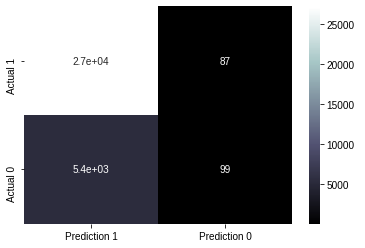

In [ ]:
init_cm = confusion_matrix(y_test_init, pred_init, labels = [1,0])
init_cm_df = pd.DataFrame(data = init_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(init_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test_init, pred_init))

              precision    recall  f1-score   support

           0       0.53      0.02      0.03      5530
           1       0.83      1.00      0.91     27338

    accuracy                           0.83     32868
   macro avg       0.68      0.51      0.47     32868
weighted avg       0.78      0.83      0.76     32868



In [ ]:
init_cm_df

Prediction 1  Prediction 0
Actual 1         27251            87
Actual 0          5431            99

In [ ]:
init_coef = dict(zip(X_init.columns, abs(initial.coef_[0])))
pd.DataFrame.from_dict(data = init_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

Coef
sub_grade                            0.047485
dti                                  0.031828
int_rate                             0.027552
term                                 0.023727
grade                                0.009383
open_acc                             0.009265
total_acc                            0.005133
mort_acc                             0.004443
revol_util                           0.003460
issued_month                         0.003411
EarliestCrLine_month                 0.001809
emp_length                           0.001719
EarliestCrLine_year                  0.001524
home_ownership_RENT                  0.001434
installment                          0.001325
verification_status_Verified         0.000859
verification_status_Source Verified  0.000817
purpose_credit_card                  0.000806
issued_year                          0.000509
pub_rec                              0.000449
initial_list_status                  0.000392
purpose_other                        0.000338
purpose_small_business               0.000216
purpose_debt_consolidation           0.000211
purpose_medical                      0.000145
purpose_moving                       0.000131
home_ownership_OWN                   0.000105
purpose_major_purchase               0.000089
purpose_wedding                      0.000063
purpose_home_improvement             0.000061
purpose_house                        0.000039
purpose_vacation                     0.000033
loan_amnt                            0.000008
annual_inc                           0.000005
purpose_educational                  0.000003
purpose_renewable_energy             0.000003
revol_bal                            0.000003
pub_rec_bankruptcies                 0.000001
home_ownership_OTHER                 0.000001

## Balancing the Imbalance Target

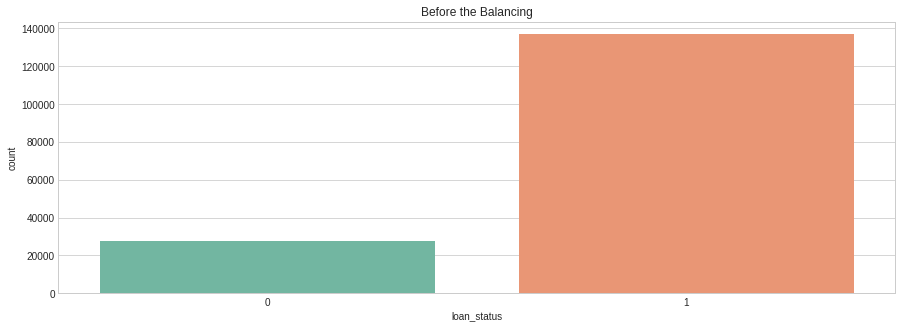

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(lendclub['loan_status'], palette = 'Set2')
plt.title("Before the Balancing")
plt.show()

In [ ]:
lendclub.stb.freq(['loan_status'], cum_cols = False)

loan_status   count    percent
0            1  136690  83.176643
1            0   27647  16.823357

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
X_train_init_smote, y_train_init_smote = sm.fit_sample(X_train_init, y_train_init)

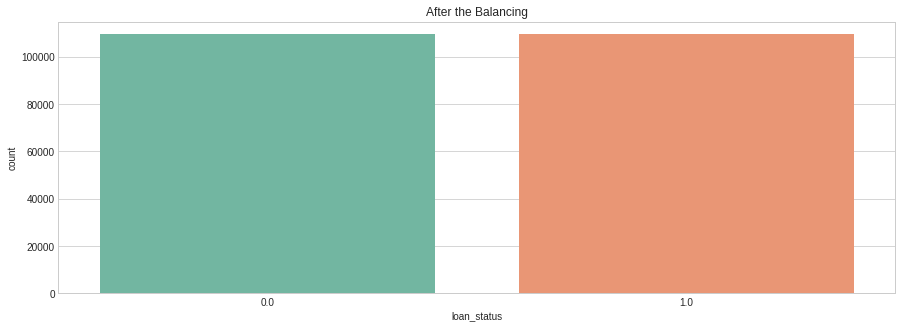

In [ ]:
# For visualization purposes

xsmote_init = pd.DataFrame(data = X_train_init_smote, columns = X_init.columns)
ysmote_init = pd.DataFrame(data = y_train_init_smote, columns = ['loan_status'])
train_init_smote = pd.concat([xsmote_init, ysmote_init])

plt.figure(figsize = (15,5))
sns.countplot(train_init_smote['loan_status'], palette = 'Set2')
plt.title("After the Balancing")
plt.show()

In [ ]:
train_init_smote.stb.freq(['loan_status'], cum_cols = False)

loan_status   count  percent
0          1.0  109352     50.0
1          0.0  109352     50.0

## After Balancing The Target (using scaler)

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [ ]:
scaler = RobustScaler()

X_train_init_sc_smote = scaler.fit_transform(X_train_init_smote)
X_test_init_sc = scaler.transform(X_test_init)

In [ ]:
init_smote = LogisticRegression()
init_smote.fit(X_train_init_sc_smote, y_train_init_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_init_smote = init_smote.predict(X_test_init_sc)

In [ ]:
# TRAINING
init_smote.score(X_train_init_sc_smote, y_train_init_smote)

0.6490644889896847

In [ ]:
# TESTING
init_smote.score(X_test_init_sc, y_test_init)

0.6498722161372764

In [ ]:
train_init_smote.stb.freq(['loan_status'], cum_cols = False)

loan_status   count  percent
0          1.0  109352     50.0
1          0.0  109352     50.0

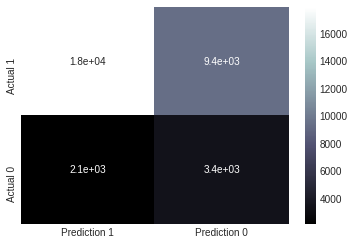

In [ ]:
init_cm_smote = confusion_matrix(y_test_init, pred_init_smote, labels = [1,0])
init_cm_df_smote = pd.DataFrame(data = init_cm_smote,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(init_cm_df_smote, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
print(classification_report(y_test_init, pred_init_smote))

# Precision > Recall (minimize FP)

# Precision increased from 0.87 to 0.88
# Recall decreased from 0.72 to 0.67 (that's normal because the tradeoff between Precision and Recall)
# Macro Average of Precision and Recall increased from 0.60 to 0.59

              precision    recall  f1-score   support

           0       0.27      0.62      0.37      5530
           1       0.89      0.66      0.76     27338

    accuracy                           0.65     32868
   macro avg       0.58      0.64      0.56     32868
weighted avg       0.79      0.65      0.69     32868



In [ ]:
init_cm_df_smote

# jumlah FP lebih kecil dari 7132 ke 5756
# jumlah FN lebih besar dari 17608 ke 20552

Prediction 1  Prediction 0
Actual 1         17942          9396
Actual 0          2112          3418

# 9) Data Preprocessing

## Feature Selection

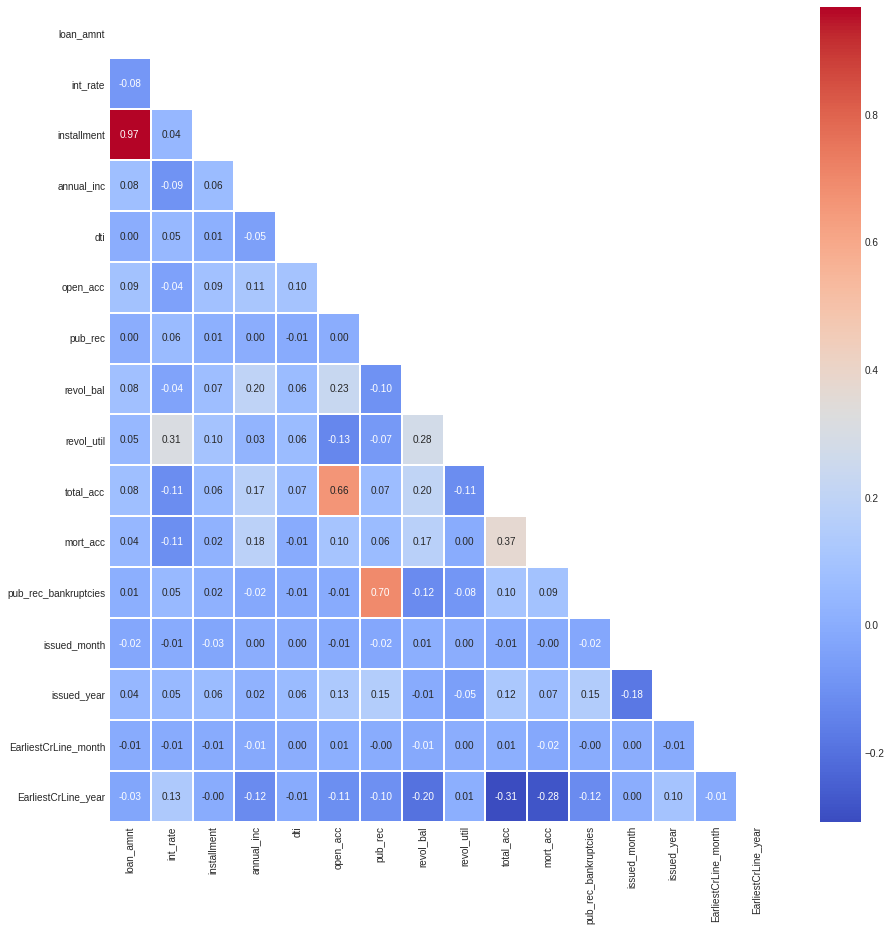

In [ ]:
corr = lendclub.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (15,15))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, linewidths = 1, fmt = '.2f')
plt.show()

In [ ]:
init_coef_smote = dict(zip(X_init.columns, abs(init_smote.coef_[0])))
pd.DataFrame.from_dict(data = init_coef_smote, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)



Coef
sub_grade                            1.357581
purpose_small_business               0.737335
installment                          0.734980
int_rate                             0.675369
loan_amnt                            0.586573
purpose_wedding                      0.327793
purpose_medical                      0.325483
home_ownership_RENT                  0.317785
purpose_educational                  0.315852
purpose_moving                       0.304678
purpose_house                        0.288456
dti                                  0.279400
home_ownership_OTHER                 0.255440
purpose_home_improvement             0.232675
home_ownership_OWN                   0.202340
total_acc                            0.194204
open_acc                             0.174758
revol_util                           0.169060
purpose_other                        0.162268
purpose_debt_consolidation           0.150426
annual_inc                           0.131194
purpose_vacation                     0.121957
verification_status_Source Verified  0.109421
pub_rec_bankruptcies                 0.107441
issued_year                          0.084179
verification_status_Verified         0.082767
purpose_credit_card                  0.075761
mort_acc                             0.075498
EarliestCrLine_year                  0.072007
purpose_renewable_energy             0.071415
emp_length                           0.068587
pub_rec                              0.059054
purpose_major_purchase               0.049569
grade                                0.046521
issued_month                         0.042477
EarliestCrLine_month                 0.040991
term                                 0.037063
initial_list_status                  0.028911
revol_bal                            0.008060

In [ ]:
## ALL FEATURES
# ['sub_grade', 'purpose_small_business', 'installment', 'int_rate',
#        'loan_amnt', 'purpose_wedding', 'purpose_house', 'purpose_medical',
#        'purpose_moving', 'home_ownership_OTHER', 'home_ownership_RENT', 'dti',
#        'purpose_home_improvement', 'purpose_educational', 'total_acc',
#        'home_ownership_OWN', 'purpose_other', 'open_acc',
#        'purpose_debt_consolidation', 'revol_util', 'purpose_renewable_energy',
#        'annual_inc', 'pub_rec_bankruptcies',
#        'verification_status_Source Verified', 'purpose_vacation',
#        'purpose_major_purchase', 'purpose_credit_card',
#        'verification_status_Verified', 'issued_year', 'mort_acc', 'pub_rec',
#        'EarliestCrLine_year', 'emp_length', 'issued_month',
#        'EarliestCrLine_month', 'term', 'initial_list_status', 'revol_bal',
#        'grade']

# TO DROP BELOW 0.116
# lendclub.drop([
#        'verification_status_Source Verified', 'purpose_vacation',
#        'purpose_major_purchase', 'purpose_credit_card',
#        'verification_status_Verified', 'issued_year', 'mort_acc', 'pub_rec',
#        'EarliestCrLine_year', 'emp_length', 'issued_month',
#        'EarliestCrLine_month', 'term', 'initial_list_status', 'revol_bal',
#        'grade'],
#               axis = 1, inplace = True)

feat_coef = lendclub[['sub_grade', 'purpose_small_business', 'installment', 'int_rate',
                      'loan_amnt', 'purpose_wedding', 'purpose_house', 'purpose_medical',
                      'purpose_moving', 'home_ownership_OTHER', 'home_ownership_RENT', 'dti',
                      'purpose_home_improvement', 'purpose_educational', 'total_acc',
                      'home_ownership_OWN', 'purpose_other', 'open_acc',
                      'purpose_debt_consolidation', 'revol_util', 'purpose_renewable_energy',
                      'annual_inc', 'pub_rec_bankruptcies', 'loan_status']]

# feat_coef = lendclub[['sub_grade', 'purpose_small_business', 'installment', 'int_rate',
#                       'loan_amnt', 'purpose_wedding', 'purpose_house', 'purpose_medical',
#                       'purpose_moving', 'home_ownership_RENT', 'dti',
#                       'purpose_home_improvement', 'purpose_educational','purpose_other',
#                       'home_ownership_OWN','home_ownership_OTHER',
#                       'purpose_debt_consolidation', 'revol_util',
#                       'annual_inc', 'pub_rec_bankruptcies', 'loan_status']]

In [ ]:
feat_coef.head()

sub_grade  purpose_small_business  ...  pub_rec_bankruptcies  loan_status
0           9                       0  ...                   0.0            1
1          10                       0  ...                   0.0            1
3           2                       0  ...                   0.0            1
10          9                       0  ...                   1.0            1
12          7                       0  ...                   0.0            1

[5 rows x 24 columns]

In [ ]:
print(f"Total Features: {lendclub.shape[1]} columns.")
print(f"Selected Features: {feat_coef.shape[1]-1} columns.")

Total Features: 40 columns.
Selected Features: 23 columns.


## Splitting Data into Features and Target

In [ ]:
# Splitting
X = feat_coef.drop('loan_status', axis = 1)
y = feat_coef['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88, stratify = y)

## Handling Imbalance Target

In [ ]:
# Handling Imbalance
# DATASET FOR TREE BASED ALGORITHM

X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

## Feature Scaling

In [ ]:
# Feature Scaling
# DATASET FOR DISTANCE BASED ALGORITHM

scaler_robust = RobustScaler()

X_train_sc_smote = scaler_robust.fit_transform(X_train_smote)
X_test_sc = scaler_robust.transform(X_test)

In [ ]:
# print(f"X_train: {}.")
# print(f"y_train: {}.")

# print(f"X_train_smote: {}.")
# print(f"y_train_smote: {}.")
# print(f"X_train_sc_smote: {}.")

# print(f"X_test: {}.")
# print(f"y_test: {}.")
# print(f"X_test_sc: {}.")

# 10) Machine Learning Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

## Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_sc_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr = lr.predict(X_test_sc)

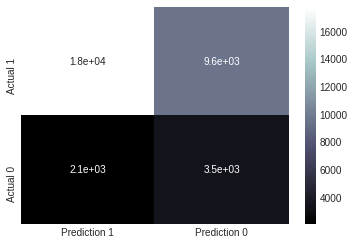

In [ ]:
lr_cm = confusion_matrix(y_test, pred_lr, labels = [1,0])
lr_cm_df = pd.DataFrame(data = lr_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lr_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_lr = pd.DataFrame(data = {
#     "Training" : lr.score(X_train_sc_smote, y_train_smote),
#     "Testing"  : lr.score(X_test_sc, y_test)
# }, index = ['Logistic Regression'])

# fit_lr

In [ ]:
print(classification_report(y_test, pred_lr))

# precision 0.90

              precision    recall  f1-score   support

           0       0.27      0.63      0.37      5530
           1       0.90      0.65      0.75     27338

    accuracy                           0.65     32868
   macro avg       0.58      0.64      0.56     32868
weighted avg       0.79      0.65      0.69     32868



In [ ]:
lr_cm_df

# FP = 2072
# FN = 9537

Prediction 1  Prediction 0
Actual 1         17763          9575
Actual 0          2067          3463

In [ ]:
prec_lr = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_lr)}, 
                       index = ['Logistic Regression'])

tp_lr = lr_cm_df['Prediction 1'][0]
fp_lr = lr_cm_df['Prediction 1'][1]
fn_lr = lr_cm_df['Prediction 0'][0]
tn_lr = lr_cm_df['Prediction 0'][1]

## Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = rf.predict(X_test)

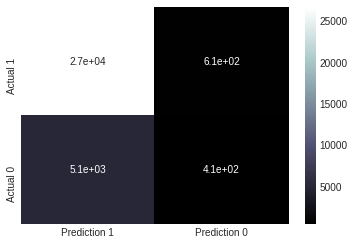

In [ ]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [1,0])
rf_cm_df = pd.DataFrame(data = rf_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# fit_rf = pd.DataFrame(data = {
#     "Training" : rf.score(X_train_smote, y_train_smote),
#     "Testing"  : rf.score(X_test, y_test)
# }, index = ['Random Forest Classifier'])

# fit_rf

In [ ]:
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.40      0.07      0.12      5530
           1       0.84      0.98      0.90     27338

    accuracy                           0.83     32868
   macro avg       0.62      0.53      0.51     32868
weighted avg       0.77      0.83      0.77     32868



In [ ]:
rf_cm_df


Prediction 1  Prediction 0
Actual 1         26729           609
Actual 0          5123           407

In [ ]:
prec_rf = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_rf)}, 
                       index = ['Random Forest'])


tp_rf = rf_cm_df['Prediction 1'][0]
fp_rf = rf_cm_df['Prediction 1'][1]
fn_rf = rf_cm_df['Prediction 0'][0]
tn_rf = rf_cm_df['Prediction 0'][1]

## Xtreme Gradient Boosting

In [ ]:
xg = GradientBoostingClassifier()

In [ ]:
xg.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred_xg = xg.predict(X_test)

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_xg = pd.DataFrame(data = {
#     "Training" : xg.score(X_train_smote, y_train_smote),
#     "Testing"  : xg.score(X_test, y_test)
# }, index = ['Xtreme Gradient Boosting'])

# fit_xg

In [ ]:
print(classification_report(y_test, pred_xg))


              precision    recall  f1-score   support

           0       0.39      0.07      0.12      5530
           1       0.84      0.98      0.90     27338

    accuracy                           0.82     32868
   macro avg       0.61      0.52      0.51     32868
weighted avg       0.76      0.82      0.77     32868



In [ ]:
xg_cm = confusion_matrix(y_test, pred_xg, labels = [1,0])
xg_cm_df = pd.DataFrame(data = xg_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

xg_cm_df


Prediction 1  Prediction 0
Actual 1         26714           624
Actual 0          5131           399

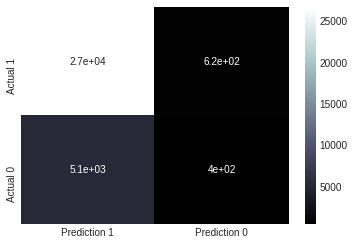

In [ ]:
sns.heatmap(xg_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
prec_xg = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_xg)}, 
                       index = ['XGBoost'])


tp_xg = xg_cm_df['Prediction 1'][0]
fp_xg = xg_cm_df['Prediction 1'][1]
fn_xg = xg_cm_df['Prediction 0'][0]
tn_xg = xg_cm_df['Prediction 0'][1]

## Support Vector Machine

In [ ]:
sv = SVC(max_iter = 2000)

In [ ]:
sv.fit(X_train_sc_smote, y_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=2000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_sv = sv.predict(X_test_sc)

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_sv = pd.DataFrame(data = {
#     "Training" : kn.score(X_train_sc_smote, y_train_smote),
#     "Testing"  : kn.score(X_test_sc, y_test)
# }, index = ['K-Nearest Neighbors'])

# fit_sv

In [ ]:
print(classification_report(y_test, pred_sv))


              precision    recall  f1-score   support

           0       0.17      0.38      0.24      5530
           1       0.83      0.63      0.72     27338

    accuracy                           0.59     32868
   macro avg       0.50      0.51      0.48     32868
weighted avg       0.72      0.59      0.64     32868



In [ ]:
sv_cm = confusion_matrix(y_test, pred_sv, labels = [1,0])
sv_cm_df = pd.DataFrame(data = sv_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sv_cm_df


Prediction 1  Prediction 0
Actual 1         17197         10141
Actual 0          3414          2116

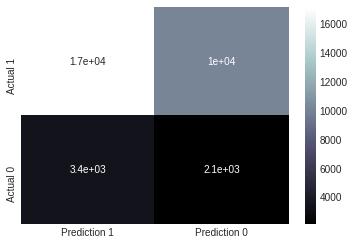

In [ ]:
sns.heatmap(sv_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
prec_sv = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_sv)}, 
                       index = ['SVC'])


tp_sv = sv_cm_df['Prediction 1'][0]
fp_sv = sv_cm_df['Prediction 1'][1]
fn_sv = sv_cm_df['Prediction 0'][0]
tn_sv = sv_cm_df['Prediction 0'][1]

# 11) Optimization

## Logistic Regression

In [ ]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'], 
    "C"      : np.logspace(-5,5,20),
    "max_iter" : [100, 500, 1000]
    # "solver" : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_lr.fit(X_train_sc_smote, y_train_smote)


Fitting 4 folds for each of 240 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 3.359...
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
      

In [ ]:
grid_lr.best_params_

# {'C': 0.004832930238571752, 'penalty': 'l2', 'solver': 'newton-cg'}
# Prec 0.90 | FP 2063

# {'C': 0.004281332398719391, 'penalty': 'l2', 'solver': 'newton-cg'}
# Prec 0.90 | FP 2062

# {'C': 1e-08, 'penalty': 'l2', 'solver': 'saga'}
# Prec 0.8 | FP 2692

# {'C': 0.004281332398719391, 'max_iter': 100, 'penalty': 'l2'}
# Prec 0.90 | FP 2062

{'C': 0.004281332398719391, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
# lrt = Logistic Regression tuned

pred_lrt = grid_lr.predict(X_test_sc)

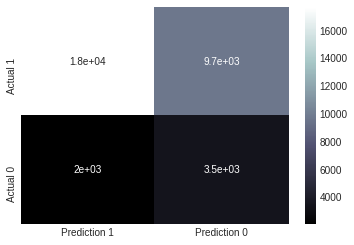

In [ ]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [1,0])
lrt_cm_df = pd.DataFrame(data = lrt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_lrt = pd.DataFrame(data = {
#     "Training" : grid_lr.best_score_,
#     "Testing"  : precision_score(y_test, pred_lrt)
# }, index = ['Logistic Regression'])

# fit_lrt

In [ ]:
print(classification_report(y_test, pred_lrt))


              precision    recall  f1-score   support

           0       0.27      0.63      0.37      5530
           1       0.90      0.65      0.75     27338

    accuracy                           0.64     32868
   macro avg       0.58      0.64      0.56     32868
weighted avg       0.79      0.64      0.69     32868



In [ ]:
lrt_cm_df


Prediction 1  Prediction 0
Actual 1         17679          9659
Actual 0          2046          3484

In [ ]:
prec_lrt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_lrt)}, 
                       index = ['Tuned Logistic Regression'])


tp_lrt = lrt_cm_df['Prediction 1'][0]
fp_lrt = lrt_cm_df['Prediction 1'][1]
fn_lrt = lrt_cm_df['Prediction 0'][0]
tn_lrt = lrt_cm_df['Prediction 0'][1]

In [ ]:
tuned_lr = grid_lr.best_estimator_

## Random Forest

In [ ]:
rf_t = RandomForestClassifier()
param_rf = {
    "n_estimators" : [10,25,30,50],
    "max_depth" : [1,2,4,5,6],
    "min_samples_leaf" : np.linspace(0.07, 0.2, 30),
    # "min_samples_split" : [2,3,20]
}

grid_rf = GridSearchCV(
    estimator = rf_t,
    param_grid = param_rf,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_rf.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 600 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1968 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  5.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
       0.09241379, 0.09689655, 0.10137931, 0.10586207, 0.11034483,
       0.11482759, 0.11931034, 0.1237931 , 0

In [ ]:
grid_rf.best_params_

      # {'max_depth': 8, 'min_samples_leaf': 0.1, 'n_estimators': 25}
      # prec 0.88 | FP 2635

      # {'max_depth': 4, 'min_samples_leaf': 0.1, 'n_estimators': 25}
      # prec 0.88 | FP 2459

          # {'max_depth': 12, 'min_samples_leaf': 0.1, 'n_estimators': 25}
          # Prec 0.87 | FP 3108

              # {'max_depth': 10, 'min_samples_leaf': 0.01, 'n_estimators': 50}
              # Prec 0.86 | FP 3904

                  # {'min_samples_leaf': 0.01, 'min_samples_split': 0.02, 'n_estimators': 100}
                  # Prec 0.85 | FP 4129

                  # {'min_samples_leaf': 0.01, 'min_samples_split': 0.02, 'n_estimators': 1000}
                  # Prec 0.85 | FP 4072

              # {'max_depth': 8, 'min_samples_leaf': 0.01, 'n_estimators': 50}
              # Prec 0.86 | Fp 3647

      # {'max_depth': 2, 'min_samples_leaf': 0.09, 'n_estimators': 25}
      # Prec 0.88 | FP 2362

    # {'max_depth': 2, 'min_samples_leaf': 0.1, 'n_estimators': 25}
    # Prec 0.89 | 2083

      # {'max_depth': 2, 'min_samples_leaf': 0.1, 'n_estimators': 25}
      # Prec 0.88 | FP 2607

    # {'max_depth': 2, 'min_samples_leaf': 0.09, 'n_estimators': 50}
    # Prec 0.89 | FP 2212

    # {'max_depth': 2, 'min_samples_leaf': 0.085, 'n_estimators': 10}
    # Prec 0.89 | FP 2044

# {'max_depth': 2, 'min_samples_leaf': 0.07896551724137932, 'n_estimators': 25}
# Prec 0.90 | FP 1581

{'max_depth': 2, 'min_samples_leaf': 0.07, 'n_estimators': 10}

In [ ]:
pred_rft = grid_rf.predict(X_test)

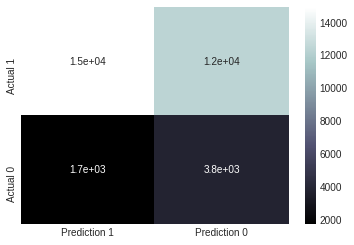

In [ ]:
rft_cm = confusion_matrix(y_test, pred_rft, labels = [1,0])
rft_cm_df = pd.DataFrame(data = rft_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(rft_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_xgt = pd.DataFrame(data = {
#     "Training" : grid_xg.best_score_,
#     "Testing"  : precision_score(y_test, pred_xgt)
# }, index = ['XGB'])

# fit_xgt

In [ ]:
print(classification_report(y_test, pred_rft))



              precision    recall  f1-score   support

           0       0.24      0.69      0.35      5530
           1       0.90      0.55      0.68     27338

    accuracy                           0.57     32868
   macro avg       0.57      0.62      0.52     32868
weighted avg       0.79      0.57      0.62     32868



In [ ]:
rft_cm_df


Prediction 1  Prediction 0
Actual 1         14937         12401
Actual 0          1713          3817

In [ ]:
prec_rft = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_rft)}, 
                       index = ['Tuned Random Forest'])


tp_rft = rft_cm_df['Prediction 1'][0]
fp_rft = rft_cm_df['Prediction 1'][1]
fn_rft = rft_cm_df['Prediction 0'][0]
tn_rft = rft_cm_df['Prediction 0'][1]

In [ ]:
tuned_rf = grid_rf.best_estimator_

## Xtreme Gradient Boosting

In [ ]:
np.linspace(0.08, 4, 20)

array([0.08      , 0.28631579, 0.49263158, 0.69894737, 0.90526316,
       1.11157895, 1.31789474, 1.52421053, 1.73052632, 1.93684211,
       2.14315789, 2.34947368, 2.55578947, 2.76210526, 2.96842105,
       3.17473684, 3.38105263, 3.58736842, 3.79368421, 4.        ])

In [ ]:
xg_t = GradientBoostingClassifier()

param_xg = {
    # "n_estimators" : [50, 100, 500, 1000],
    "n_estimators" : [10, 20, 25, 30, 50, 100],
    "learning_rate" : np.linspace(0.08, 4, 20),
    # "learning_rate" : np.linspace(0.1, 10, 20),
    # "subsample" : [1,3,5,7,9,11]
    "subsample" : [0.1, 0.5, 1, 4, 7]
}

grid_xg = RandomizedSearchCV(
    estimator = xg_t,
    param_distributions = param_xg,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 100
)

In [ ]:
grid_xg.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 321 out of 400 | elapsed:  2.5min remaining:   37.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.5min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
grid_xg.best_params_

# {'learning_rate': 0.5, 'n_estimators': 500, 'subsample': 0.8}
# Prec 0.84 | FP 5192

# {'learning_rate': 0.9500000000000001,
#  'n_estimators': 100,
#  'subsample': 0.9500000000000001}
# Prec 0.84 | FP 5234

# {'learning_rate': 0.9500000000000003, 'n_estimators': 100, 'subsample': 1}
# Prec 0.84 | FP 5230

# {'learning_rate': 1.6631578947368424, 'n_estimators': 25, 'subsample': 1}
# Prec 0.84 | FP 5044

# {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 1}
# Prec 0.84 | FP 5121

{'learning_rate': 0.9052631578947368, 'n_estimators': 50, 'subsample': 1}

In [ ]:
pred_xgt = grid_xg.predict(X_test)

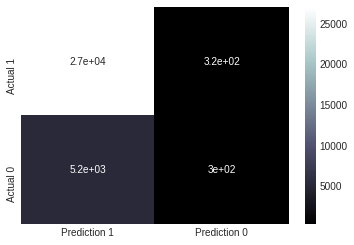

In [ ]:
xgt_cm = confusion_matrix(y_test, pred_xgt, labels = [1,0])
xgt_cm_df = pd.DataFrame(data = xgt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(xgt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_xgt = pd.DataFrame(data = {
#     "Training" : grid_xg.best_score_,
#     "Testing"  : precision_score(y_test, pred_xgt)
# }, index = ['XGB'])

# fit_xgt

In [ ]:
print(classification_report(y_test, pred_xgt))



              precision    recall  f1-score   support

           0       0.49      0.05      0.10      5530
           1       0.84      0.99      0.91     27338

    accuracy                           0.83     32868
   macro avg       0.66      0.52      0.50     32868
weighted avg       0.78      0.83      0.77     32868



In [ ]:
xgt_cm_df


Prediction 1  Prediction 0
Actual 1         27023           315
Actual 0          5230           300

In [ ]:
prec_xgt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_xgt)}, 
                       index = ['Tuned XGBoost'])


tp_xgt = xgt_cm_df['Prediction 1'][0]
fp_xgt = xgt_cm_df['Prediction 1'][1]
fn_xgt = xgt_cm_df['Prediction 0'][0]
tn_xgt = xgt_cm_df['Prediction 0'][1]

In [ ]:
tuned_xg = grid_xg.best_estimator_

## Support Vector Machine

In [ ]:
sv_t = SVC()

param_sv = {
    "C" : np.logspace(-4,4,15),
    "gamma" : ['scale', 'auto'],
    "max_iter" : np.arange(1000,5001, 500),
}

grid_sv = RandomizedSearchCV(
    estimator = sv_t,
    param_distributions = param_sv,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_sv.fit(X_train_sc_smote, y_train_smote)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  40 | elapsed:   55.8s remaining: 11.5min
[Parallel(n_jobs=-1)]: Done  17 out of  40 | elapsed:  1.6min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:  2.4min remaining:   41.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': array([1.00000...
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                                        'gamma': ['scale', 'auto'],
                                        'max_iter': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])},
                   p

In [ ]:
grid_sv.best_params_

# {'C': 0.0003727593720314938, 'gamma': 'scale', 'max_iter': 1000}
# Prec  0.82 | FP 3564

# {'C': 2682.695795279722, 'gamma': 'auto', 'max_iter': 5000}
# Prec 0.77 | FP 3396

# {'C': 51.79474679231202, 'gamma': 'auto', 'max_iter': 3500}
# Prec  0.85 | 3478

{'C': 0.0013894954943731374, 'gamma': 'scale', 'max_iter': 2500}

In [ ]:
pred_svt = grid_sv.predict(X_test_sc)

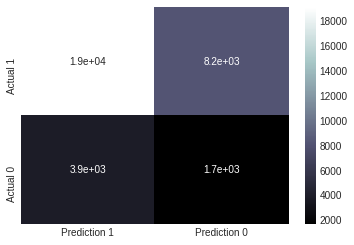

In [ ]:
svt_cm = confusion_matrix(y_test, pred_svt, labels = [1,0])
svt_cm_df = pd.DataFrame(data = svt_cm,  columns = ['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

sns.heatmap(svt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
# # OVERFIT/UNDERFIT CHECK

# fit_xgt = pd.DataFrame(data = {
#     "Training" : grid_xg.best_score_,
#     "Testing"  : precision_score(y_test, pred_xgt)
# }, index = ['XGB'])

# fit_xgt

In [ ]:
print(classification_report(y_test, pred_svt))



              precision    recall  f1-score   support

           0       0.17      0.30      0.22      5530
           1       0.83      0.70      0.76     27338

    accuracy                           0.63     32868
   macro avg       0.50      0.50      0.49     32868
weighted avg       0.72      0.63      0.67     32868



In [ ]:
svt_cm_df


Prediction 1  Prediction 0
Actual 1         19134          8204
Actual 0          3875          1655

In [ ]:
prec_svt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_svt)}, 
                       index = ['Tuned SVC'])


tp_svt = svt_cm_df['Prediction 1'][0]
fp_svt = svt_cm_df['Prediction 1'][1]
fn_svt = svt_cm_df['Prediction 0'][0]
tn_svt = svt_cm_df['Prediction 0'][1]

In [ ]:
tuned_sv = grid_sv.best_estimator_

# 12) The Best Model

## Model Summary

In [ ]:
model_summary = pd.concat([prec_lr, prec_lrt, prec_sv, prec_svt, 
                           prec_rf, prec_rft, prec_xg, prec_xgt])
model_summary

Precision Score
Logistic Regression               0.895764
Tuned Logistic Regression         0.896274
SVC                               0.834360
Tuned SVC                         0.831588
Random Forest                     0.839162
Tuned Random Forest               0.897117
XGBoost                           0.838876
Tuned XGBoost                     0.837845

In [ ]:
summary_cm = pd.DataFrame({
    "TruePositive" : [tp_lr, tp_lrt, tp_sv, tp_svt, tp_rf, tp_rft, tp_xg, tp_xgt],
    "TrueNegative" : [tn_lr, tn_lrt, tn_sv, tn_svt, tn_rf, tn_rft, tn_xg, tn_xgt],
    "FalsePositive": [fp_lr, fp_lrt, fp_sv, fp_svt, fp_rf, fp_rft, fp_xg, fp_xgt],
    "FalseNegative": [fn_lr, fn_lrt, fn_sv, fn_svt, fn_rf, fn_rft, fn_xg, fn_xgt]
}, 
index = model_summary.index)

summary_cm

TruePositive  ...  FalseNegative
Logistic Regression               17763  ...           9575
Tuned Logistic Regression         17679  ...           9659
SVC                               17197  ...          10141
Tuned SVC                         19134  ...           8204
Random Forest                     26729  ...            609
Tuned Random Forest               14937  ...          12401
XGBoost                           26714  ...            624
Tuned XGBoost                     27023  ...            315

[8 rows x 4 columns]

## Export Model

In [ ]:
import joblib

In [ ]:
joblib.dump(tuned_rf, 'TunedRF_Prec')

['TunedRF_Prec']

# 13) Conclusion
1. **83.18 % borrowers are likely to complete their loan amount** rather than 16.82 % borrowers who has been valued as charged-off.
2. Notice that **borrowers who loan 60 months has higher interest rate** (15.7%) rather than 36 months (12.8%)
3. 33.04% borrowers are grade 'B', and 28.3% borrowers are grade 'C'. Both grade 'B' and 'C' combined into 61.34% alone. The least percentage of borrowers is grade 'G'. **This tells us that LendingClub is the healthy platform for investors**.
4. **High risk high return**. Basically, if investors want to get high return, just put it their money in to the lowest grade with 25.6% interest rate but in here, we know is too risky.
5. Don't get amazed too quick, by the number of borrowers, 'B3' is the highest borrowers who complete their loan with 10,941 borrowers, but **when it comes to proportion, the highest percentage of borrowers who complete their loan is 'A1'** with 97.21%, meanwhile the 'B3' has 87.93% only.
7. Borrowers who have average **revolving balance about $11,106 tend to be charged off borrowers in 60 months of loan term**.
8. **Individual applications are tend to have high charged-off rate** compare to joint application type (or with two co-borrowers).
9. **Educational purpose borrowers** who have 11.43 debt-to-income ratio (which is the lowest ratio) **are the only one purpose which fully paid their loan**, compare to other purposes.
6. Generally speaking, **the main factors of borrower stop repay their loans** are: high interest rate, high loan amount, high installment, high debt-to-income ratio, and high revolving utilization rate.
10. **Machine learning model which built with Random Forest algorithm has Precision score 0.90 of 1.0.** Using Precision from classification report because we only focus to minimize False Positive which the actual is charged-off but the model predicts fully paid rather than the actual is fully paid but the model predicts charged-off. This is nightmare for lenders/ investors because the worst scenario is all lenders' money would be gone in no time.

# 14) Recommendations
1. LendingClub could offer subscription services to lenders that will help them to choose borrowers wisely. Let's say educating them with the facts like "High risk isn't always high return, but high understanding leands to high return". Except if the lenders put their money into A grade borrowers, they don't need many informations.
2. Machine Learning model can be included in the subscription services which can help lenders easily to pick borrowers. Lenders only need to put the information of borrowers and then one 'click' away, they get the result of borrowers' repayment capability.